In [1]:
# Импорт библиотек и настройка
import pandas as pd
import numpy as np
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Проверяем текущую директорию
project_path = Path.cwd()
print(f"Текущая директория проекта: {project_path}")
print("Ищем файлы Parquet...")

# Список файлов для загрузки
parquet_files = [
    'banking_77_train.parquet',
    'banking_77_validation.parquet', 
    'banking_77_test.parquet'
]

# Метки, которые необходимо оставить
TARGET_LABELS = {
    'exchange rate',
    'card not working',
    'cancel transfer',
    'edit personal details',
    'visa or mastercard',
    'atm support',
    'declined cash withdrawal',
    'terminate account',
    'card swallowed',
    'change pin',
    'transfer into account',
    'apple pay or google pay',
    'country support'
}

def filter_and_save_file(file_path, target_labels):
    """Загружает, фильтрует и сохраняет файл"""
    try:
        # Загружаем файл
        df = pd.read_parquet(file_path)
        print(f"Загружен {file_path.name}: {len(df)} строк, {len(df.columns)} столбцов")
        
        # Проверяем наличие колонки с метками
        label_column = None
        for col in df.columns:
            if 'label' in col.lower() or 'category' in col.lower():
                label_column = col
                break
        
        if not label_column:
            print(f"Не найдена колонка с метками в {file_path.name}")
            return False
        
        print(f"Используется колонка меток: '{label_column}'")
        print(f"Уникальных меток до фильтрации: {df[label_column].nunique()}")
        
        # Фильтруем данные
        initial_count = len(df)
        filtered_df = df[df[label_column].isin(target_labels)].copy()
        filtered_count = len(filtered_df)
        
        print(f"Сохранено строк: {filtered_count} из {initial_count}")
        print(f"Уникальных меток после фильтрации: {filtered_df[label_column].nunique()}")
        
        # Сохраняем обратно в тот же файл
        filtered_df.to_parquet(file_path, index=False)
        print(f"Файл пересохранен: {file_path.name}")
        
        # Выводим статистику по меткам
        print("Распределение меток:")
        label_counts = filtered_df[label_column].value_counts()
        for label, count in label_counts.items():
            print(f"     - {label}: {count}")
        
        return True
        
    except Exception as e:
        print(f"Ошибка при обработке {file_path.name}: {str(e)}")
        return False

# Проверяем существование файлов и обрабатываем их
existing_files = []
for file in parquet_files:
    file_path = project_path / file
    if file_path.exists():
        existing_files.append(file_path)
        print(f"Найден: {file}")
    else:
        print(f"Не найден: {file}")

if not existing_files:
    print("\nФайлы не найдены! Убедитесь, что:")
    print("1. Файлы находятся в той же папке, что и ноутбук")
    print("2. Названия файлов указаны правильно")
    print("3. Файлы имеют расширение .parquet")
else:
    print(f"\nБудут обработаны {len(existing_files)} файла(ов)")
    print(f"Меток для сохранения: {len(TARGET_LABELS)}")
    print("\n\n")
    
    successful_files = 0
    for file_path in existing_files:
        print(f"\nОбработка: {file_path.name}")
        if filter_and_save_file(file_path, TARGET_LABELS):
            successful_files += 1
        print("-"*50)
    
    print(f"\nИТОГ: Успешно обработано {successful_files} из {len(existing_files)} файлов")
    print("\nГотово! Исходные файлы были перезаписаны с отфильтрованными данными.")

Текущая директория проекта: d:\Vika\part_2\hwfinal\hw_final
Ищем файлы Parquet...
Найден: banking_77_train.parquet
Найден: banking_77_validation.parquet
Найден: banking_77_test.parquet

Будут обработаны 3 файла(ов)
Меток для сохранения: 13




Обработка: banking_77_train.parquet
Загружен banking_77_train.parquet: 1320 строк, 2 столбцов
Используется колонка меток: 'label'
Уникальных меток до фильтрации: 13
Сохранено строк: 1320 из 1320
Уникальных меток после фильтрации: 13
Файл пересохранен: banking_77_train.parquet
Распределение меток:
     - declined cash withdrawal: 153
     - cancel transfer: 138
     - visa or mastercard: 115
     - country support: 112
     - apple pay or google pay: 108
     - change pin: 104
     - edit personal details: 103
     - exchange rate: 95
     - transfer into account: 94
     - card not working: 93
     - terminate account: 91
     - atm support: 69
     - card swallowed: 45
--------------------------------------------------

Обработка: banking_77_val

In [2]:
# Функция для загрузки и анализа Parquet файлов
def load_and_analyze_parquet(filename):
    """Загружает Parquet файл и возвращает анализ"""
    
    print(f"\n{'='*60}")
    print(f"ЗАГРУЗКА: {filename}")
    print('='*60)
    
    try:
        # Загружаем файл
        file_path = project_path / filename
        start_time = pd.Timestamp.now()
        
        # Читаем Parquet файл
        df = pd.read_parquet(file_path)
        
        load_time = (pd.Timestamp.now() - start_time).total_seconds()
        
        # Базовый анализ
        print(f"Успешно загружено за {load_time:.2f} сек")
        print(f"Размер: {len(df):,} строк × {len(df.columns)} колонок")
        
        # Размер файла на диске
        file_size_mb = os.path.getsize(file_path) / (1024 * 1024)
        print(f"Размер файла: {file_size_mb:.2f} МБ")
        
        # Информация о колонках
        print(f"\nСТРУКТУРА ДАННЫХ:")
        print(f"{'Колонка':<20} {'Тип':<15} {'Не-NULL':<10} {'Уникальных':<10}")
        print("-" * 55)
        
        for col in df.columns:
            null_count = df[col].isnull().sum()
            unique_count = df[col].nunique()
            dtype = str(df[col].dtype)
            print(f"{col:<20} {dtype:<15} {len(df)-null_count:<10} {unique_count:<10}")
        
        # Статистика для числовых колонок
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 0:
            print(f"\nСТАТИСТИКА (числовые колонки):")
            print(df[numeric_cols].describe().round(2))
        
        # Для текстовых колонок
        text_cols = df.select_dtypes(include=['object', 'string']).columns
        if len(text_cols) > 0:
            print(f"\nТЕКСТОВЫЕ КОЛОНКИ:")
            for col in text_cols:
                avg_len = df[col].dropna().apply(len).mean()
                print(f"  {col}: средняя длина {avg_len:.1f} символов")
        
        return df
        
    except Exception as e:
        print(f"Ошибка загрузки {filename}: {e}")
        return None

In [3]:
# Загрузка всех файлов
datasets = {}

for file_path in existing_files:
    df = load_and_analyze_parquet(file_path)
    if df is not None:
        # Сохраняем в словарь с ключом без расширения
        # Используем file_path.name для получения имени файла как строки
        key = file_path.stem.replace('banking_77_', '')
        datasets[key] = df
        
print(f"\n{'='*60}")
print("ЗАГРУЗКА ЗАВЕРШЕНА")
print(f"Загружено датасетов: {len(datasets)}")
print('='*60)


ЗАГРУЗКА: d:\Vika\part_2\hwfinal\hw_final\banking_77_train.parquet
Успешно загружено за 0.04 сек
Размер: 1,320 строк × 2 колонок
Размер файла: 0.03 МБ

СТРУКТУРА ДАННЫХ:
Колонка              Тип             Не-NULL    Уникальных
-------------------------------------------------------
label                object          1320       13        
text                 object          1320       1317      

ТЕКСТОВЫЕ КОЛОНКИ:
  label: средняя длина 17.3 символов
  text: средняя длина 50.9 символов

ЗАГРУЗКА: d:\Vika\part_2\hwfinal\hw_final\banking_77_validation.parquet
Успешно загружено за 0.03 сек
Размер: 260 строк × 2 колонок
Размер файла: 0.01 МБ

СТРУКТУРА ДАННЫХ:
Колонка              Тип             Не-NULL    Уникальных
-------------------------------------------------------
label                object          260        13        
text                 object          260        236       

ТЕКСТОВЫЕ КОЛОНКИ:
  label: средняя длина 16.8 символов
  text: средняя длина 46.6 символов

ЗА

In [4]:
# Просмотр первых строк каждого датасета
print("ПРЕДПРОСМОТР ДАННЫХ")
print("\n")

for name, df in datasets.items():
    print(f"\nДатасет: {name} (первые 5 строк)")
    print("-" * 40)
    
    # Настройка отображения pandas
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', 50)  # Ограничиваем длину текста
    
    display(df.head(5))
    
    # Сбрасываем настройки
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.max_colwidth')
    
    print(f"\nИндекс: от {df.index[0]} до {df.index[-1]}")
    print(f"Колонки: {list(df.columns)}")
    print("-" * 40)

ПРЕДПРОСМОТР ДАННЫХ



Датасет: train (первые 5 строк)
----------------------------------------


,label,text
0,exchange rate,what is my money worth in other countries?
1,exchange rate,do you know the rate of exchange?
2,exchange rate,what foreign exchange rate will i get on weekd...
3,exchange rate,what is the exchange looking like?
4,exchange rate,how is the exchange rate doing?



Индекс: от 0 до 1319
Колонки: ['label', 'text']
----------------------------------------

Датасет: validation (первые 5 строк)
----------------------------------------


,label,text
0,exchange rate,what method do you use for the exchange rate?
1,exchange rate,what is the basis of your exchange rates?
2,exchange rate,what is the basis of your exchange rates?
3,exchange rate,what do you use to figure out the exchange rat...
4,exchange rate,what are the exchange rates you assign?



Индекс: от 0 до 259
Колонки: ['label', 'text']
----------------------------------------

Датасет: test (первые 5 строк)
----------------------------------------


,label,text
0,exchange rate,i need to know your exchange rates.
1,exchange rate,what exchange rates do you offer?
2,exchange rate,how did you come up with your exchange rates?
3,exchange rate,where do you guys acquire your exchange rate?
4,exchange rate,how do i find the exchange rate?



Индекс: от 0 до 519
Колонки: ['label', 'text']
----------------------------------------


In [5]:
# Проверка сбалансированности меток

print("\nАнализ сбалансированности меток")
print("\n")

def check_label_balance(df, dataset_name):
    """Проверка сбалансированности меток"""
    
    if 'label' not in df.columns:
        print(f"В датасете '{dataset_name}' нет колонки 'label'")
        return None
    
    label_counts = df['label'].value_counts()
    n_classes = len(label_counts)
    
    print(f"\nДатасет: {dataset_name}")
    print("-" * 40)
    
    # 1. Основные метрики
    print(f"Количество классов: {n_classes}")
    print(f"Общее количество примеров: {len(df):,}")
    
    # 2. Распределение
    avg = label_counts.mean()
    std = label_counts.std()
    cv = std / avg  # коэффициент вариации
    
    print(f"Среднее количество примеров на класс: {avg:.1f}")
    print(f"Мин/Макс: {label_counts.min()} / {label_counts.max()}")
    print(f"Соотношение max/min: {label_counts.max()/label_counts.min():.1f}:1")
    
    # 3. Коэффициент вариации - лучший индикатор!
    print(f"Коэффициент вариации (CV): {cv:.3f}")
    
    # 4. Оценка сбалансированности
    if cv < 0.5:
        print("ОТЛИЧНО СБАЛАНСИРОВАНО (CV < 0.5)")
        print("Рекомендация: Можно использовать стандартную кросс-энтропию")
    elif cv < 1.0:
        print("УМЕРЕННЫЙ ДИСБАЛАНС (0.5 ≤ CV < 1.0)")
        print("Рекомендация: Рассмотрите weighted loss")
    elif cv < 2.0:
        print("СИЛЬНЫЙ ДИСБАЛАНС (1.0 ≤ CV < 2.0)")
        print("Рекомендация: Используйте focal loss или oversampling")
    else:
        print("КРИТИЧЕСКИЙ ДИСБАЛАНС (CV ≥ 2.0)")
        print("Рекомендация: Обязательно нужен weighted loss + oversampling")
    
    # 5. Дополнительная информация
    # Количество классов с очень малым количеством примеров
    threshold_small = avg * 0.3  # менее 30% от среднего
    small_classes = label_counts[label_counts < threshold_small]
    
    if len(small_classes) > 0:
        print(f"Проблемных (маленьких) классов: {len(small_classes)}")
        print(f"Самые маленькие: {list(small_classes.head(5).index)}")
    
    return {
        'cv': cv,
        'imbalance_ratio': label_counts.max() / label_counts.min(),
        'small_classes_count': len(small_classes)
    }

# Проверяем все датасеты
balance_info = {}
for name, df in datasets.items():
    balance_info[name] = check_label_balance(df, name)

# Сравниваем датасеты
if len(balance_info) > 1:
    print(f"\n{'='*60}")
    print("СРАВНЕНИЕ СБАЛАНСИРОВАННОСТИ МЕЖДУ ДАТАСЕТАМИ")
    print('='*60)
    
    comparison_data = []
    for name, metrics in balance_info.items():
        if metrics:  # если есть метрики
            comparison_data.append({
                'Датасет': name,
                'CV': metrics['cv'],
                'Соотношение max/min': metrics['imbalance_ratio'],
                'Маленьких классов': metrics['small_classes_count']
            })
    
    if comparison_data:
        comparison_df = pd.DataFrame(comparison_data)
        display(comparison_df.style.background_gradient(subset=['CV'], cmap='RdYlGn_r'))


Анализ сбалансированности меток



Датасет: train
----------------------------------------
Количество классов: 13
Общее количество примеров: 1,320
Среднее количество примеров на класс: 101.5
Мин/Макс: 45 / 153
Соотношение max/min: 3.4:1
Коэффициент вариации (CV): 0.268
ОТЛИЧНО СБАЛАНСИРОВАНО (CV < 0.5)
Рекомендация: Можно использовать стандартную кросс-энтропию

Датасет: validation
----------------------------------------
Количество классов: 13
Общее количество примеров: 260
Среднее количество примеров на класс: 20.0
Мин/Макс: 20 / 20
Соотношение max/min: 1.0:1
Коэффициент вариации (CV): 0.000
ОТЛИЧНО СБАЛАНСИРОВАНО (CV < 0.5)
Рекомендация: Можно использовать стандартную кросс-энтропию

Датасет: test
----------------------------------------
Количество классов: 13
Общее количество примеров: 520
Среднее количество примеров на класс: 40.0
Мин/Макс: 40 / 40
Соотношение max/min: 1.0:1
Коэффициент вариации (CV): 0.000
ОТЛИЧНО СБАЛАНСИРОВАНО (CV < 0.5)
Рекомендация: Можно использовать станда

,Датасет,CV,Соотношение max/min,Маленьких классов
0,train,0.267564,3.400000,0
1,validation,0.000000,1.000000,0
2,test,0.000000,1.000000,0


In [6]:
# УСТАНОВКА ALBERT 

print("УСТАНОВКА И ЗАГРУЗКА ALBERT")
print("\n")

# 1. Установка необходимых библиотек
!pip install transformers sentencepiece torch accelerate -q
!pip install datasets scikit-learn pandas matplotlib seaborn pyarrow -q

# 2. Импорт библиотек
import torch
import pandas as pd
import numpy as np
import os
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

# 3. Проверка версий
print(f"Python: {sys.version}")
print(f"PyTorch: {torch.__version__}")

# Проверка доступности GPU
if torch.cuda.is_available():
    print(f"GPU доступен: {torch.cuda.get_device_name(0)}")
    print(f"Память GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
else:
    print("GPU не доступен, обучение будет на CPU")

УСТАНОВКА И ЗАГРУЗКА ALBERT


Python: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]
PyTorch: 2.9.1+cpu
GPU не доступен, обучение будет на CPU


In [7]:
# 2. ЗАГРУЗКА ALBERT МОДЕЛИ

print(f"\n{'='*70}")
print("ЗАГРУЗКА МОДЕЛИ ALBERT")
print(f"{'='*70}")

from transformers import AlbertTokenizer, AlbertForSequenceClassification, AlbertConfig

def download_albert_model(model_name="albert-base-v2", force_download=False):
    """
    Загружает модель ALBERT и токенизатор
    
    Args:
        model_name: Название модели (albert-base-v2, albert-large-v2, etc.)
        force_download: Принудительная перезагрузка модели
    """
    
    print(f"Загрузка модели: {model_name}")
    
    try:
        # 1. Загрузка токенизатора ALBERT
        print("Загрузка токенизатора...")
        tokenizer = AlbertTokenizer.from_pretrained(
            model_name,
            force_download=force_download
        )
        print(f"Токенизатор загружен")
        print(f"Vocab size: {tokenizer.vocab_size:,}")
        print(f"Model max length: {tokenizer.model_max_length}")
        
        # 2. Загрузка конфигурации модели
        print("Загрузка конфигурации...")
        config = AlbertConfig.from_pretrained(model_name)
        print(f"Конфигурация загружена:")
        print(f"Hidden size: {config.hidden_size}")
        print(f"Num layers: {config.num_hidden_layers}")
        print(f"Num attention heads: {config.num_attention_heads}")
        print(f"Intermediate size: {config.intermediate_size}")
        
        # 3. Загрузка модели для классификации
        print("Загрузка модели...")
        model = AlbertForSequenceClassification.from_pretrained(
            model_name,
            config=config,
            force_download=force_download
        )
        
        # Анализ размера модели
        total_params = sum(p.numel() for p in model.parameters())
        trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        
        print(f"Модель загружена:")
        print(f"Всего параметров: {total_params:,}")
        print(f"Обучаемых параметров: {trainable_params:,}")
        print(f"Размер модели: {total_params * 4 / 1e6:.1f} MB (float32)")
        
        # 4. Тестирование токенизатора
        print("\nТестирование токенизации...")
        test_text = "How do I activate my new card?"
        tokens = tokenizer.encode(test_text, add_special_tokens=True)
        decoded = tokenizer.decode(tokens)
        
        print(f"Текст: '{test_text}'")
        print(f"Токены: {len(tokens)} tokens")
        print(f"Декодировано: '{decoded}'")
        
        return tokenizer, model, config
        
    except Exception as e:
        print(f"Ошибка загрузки модели: {e}")
        print("\nПопытка альтернативного способа загрузки...")
        
        # Альтернативный способ загрузки
        try:
            print("Попытка загрузки через pipeline...")
            from transformers import pipeline
            
            # Создаем простой классификатор для теста
            classifier = pipeline(
                "text-classification",
                model=model_name,
                tokenizer=model_name
            )
            
            # Проверяем работу
            test_result = classifier("Test text", truncation=True)
            print(f"Модель работает через pipeline")
            
            # Получаем модель и токенизатор
            tokenizer = classifier.tokenizer
            model = classifier.model
            
            return tokenizer, model, None
            
        except Exception as e2:
            print(f"Критическая ошибка: {e2}")
            
            return None, None, None

# Доступные версии ALBERT
ALBERT_VARIANTS = {
    "tiny": "albert-base-v2",        # 12M параметров
    "small": "albert-small-v2",      # 11M параметров  
    "base": "albert-base-v2",        # 12M параметров
    "large": "albert-large-v2",      # 18M параметров
    "xlarge": "albert-xlarge-v2",    # 60M параметров
    "xxlarge": "albert-xxlarge-v2",  # 235M параметров
}

# Выбор модели
print("\nВАРИАНТЫ МОДЕЛЕЙ ALBERT:")
for key, value in ALBERT_VARIANTS.items():
    print(f"   • {key:<10} → {value}")

# Загружаем рекомендованную модель
MODEL_NAME = "albert-base-v2"  # Идеальный баланс размера и качества
print(f"\nВыбрана модель: {MODEL_NAME}")

# Загрузка модели
tokenizer, model, config = download_albert_model(MODEL_NAME)

if model is None:
    print("\nНЕ УДАЛОСЬ ЗАГРУЗИТЬ ALBERT")
    print("Попробуйте выполнить это вручную:")
    print("""
# В отдельной ячейке выполните:
import torch
from transformers import AlbertTokenizer, AlbertForSequenceClassification

# Принудительная загрузка с игнорированием кэша
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2', force_download=True)
model = AlbertForSequenceClassification.from_pretrained('albert-base-v2', force_download=True)

print(f"Токенизатор: {tokenizer}")
print(f"Модель: {model}")
    """)
else:
    print(f"\nALBERT УСПЕШНО ЗАГРУЖЕН!")
    
    # Сохраняем модель локально (чтобы не загружать снова)
    print(f"\nСохранение модели локально...")
    model_dir = Path("./albert_model")
    model_dir.mkdir(exist_ok=True)
    
    model.save_pretrained(model_dir)
    tokenizer.save_pretrained(model_dir)
    
    print(f"Модель сохранена в: {model_dir.absolute()}")



ЗАГРУЗКА МОДЕЛИ ALBERT

ВАРИАНТЫ МОДЕЛЕЙ ALBERT:
   • tiny       → albert-base-v2
   • small      → albert-small-v2
   • base       → albert-base-v2
   • large      → albert-large-v2
   • xlarge     → albert-xlarge-v2
   • xxlarge    → albert-xxlarge-v2

Выбрана модель: albert-base-v2
Загрузка модели: albert-base-v2
Загрузка токенизатора...
Токенизатор загружен
Vocab size: 30,000
Model max length: 512
Загрузка конфигурации...
Конфигурация загружена:
Hidden size: 768
Num layers: 12
Num attention heads: 12
Intermediate size: 3072
Загрузка модели...


Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Модель загружена:
Всего параметров: 11,685,122
Обучаемых параметров: 11,685,122
Размер модели: 46.7 MB (float32)

Тестирование токенизации...
Текст: 'How do I activate my new card?'
Токены: 10 tokens
Декодировано: '[CLS] how do i activate my new card?[SEP]'

ALBERT УСПЕШНО ЗАГРУЖЕН!

Сохранение модели локально...
Модель сохранена в: d:\Vika\part_2\hwfinal\hw_final\albert_model


In [8]:
# ТЕСТИРОВАНИЕ ALBERT

print(f"\n{'='*70}")
print("ТЕСТИРОВАНИЕ ALBERT НА ПРИМЕРАХ")
print(f"{'='*70}")

if model and tokenizer:
    def test_albert_examples():
        """Тестирование ALBERT на примерах"""
        
        examples = [
            "How do I activate my new debit card?",
            "Why was I charged an international transaction fee?",
            "I can't login to my online banking portal",
            "How to make a wire transfer to another bank?",
            "My credit card was stolen, what should I do?",
            "What's the current exchange rate for USD to EUR?",
            "Can I cancel a pending bank transfer?",
            "How do I change my PIN number?",
            "The ATM swallowed my card, help!",
            "I need to report a fraudulent transaction"
        ]
        
        print("Примеры токенизации:")
        print("-" * 60)
        
        for i, text in enumerate(examples[:3], 1):
            # Токенизация
            inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
            
            print(f"\n{i}. Текст: {text}")
            print(f"Токены: {inputs['input_ids'].shape[1]} tokens")
            print(f"Input IDs shape: {inputs['input_ids'].shape}")
            print(f"Attention mask shape: {inputs['attention_mask'].shape}")
            
            # Детальная информация о токенах
            tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
            print(f"Первые 10 токенов: {tokens[:10]}")
        
        # Тест forward pass (если есть GPU)
        print(f"\nТест forward pass...")
        
        # Берем один пример
        test_text = "Test banking transaction"
        inputs = tokenizer(test_text, return_tensors="pt", truncation=True, padding=True)
        
        # Перемещаем на GPU если доступен
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model.to(device)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        
        # Временно меняем num_labels для теста
        original_num_labels = model.config.num_labels
        if hasattr(model.config, 'num_labels'):
            # Создаем новую конфигурацию для теста
            from transformers import AlbertConfig
            
            test_config = AlbertConfig.from_pretrained(MODEL_NAME)
            test_config.num_labels = 2  # временно для теста
            
            # Создаем новую модель для теста
            test_model = AlbertForSequenceClassification(test_config)
            test_model.to(device)
            
            with torch.no_grad():
                outputs = test_model(**inputs)
                print(f"Forward pass успешен!")
                print(f"Logits shape: {outputs.logits.shape}")
                print(f"Device: {device}")
            
            # Возвращаем оригинальную модель
            del test_model
        else:
            print("Не удалось провести forward pass (пропускаем)")
        
        print(f"\nALBERT ГОТОВ К ИСПОЛЬЗОВАНИЮ!")
        
        # Информация о модели
        print(f"\nИНФОРМАЦИЯ О МОДЕЛИ:")
        print(f"Название: {MODEL_NAME}")
        print(f"Архитектура: {model.__class__.__name__}")
        print(f"Устройство: {device}")
        print(f"Количество слоев: {config.num_hidden_layers if config else 'N/A'}")
        print(f"Hidden size: {config.hidden_size if config else 'N/A'}")
        print(f"Vocab size: {tokenizer.vocab_size:,}")
        
        return True
    
    # Запускаем тестирование
    test_albert_examples()



ТЕСТИРОВАНИЕ ALBERT НА ПРИМЕРАХ
Примеры токенизации:
------------------------------------------------------------

1. Текст: How do I activate my new debit card?
Токены: 12 tokens
Input IDs shape: torch.Size([1, 12])
Attention mask shape: torch.Size([1, 12])
Первые 10 токенов: ['[CLS]', '▁how', '▁do', '▁i', '▁activate', '▁my', '▁new', '▁de', 'bit', '▁card']

2. Текст: Why was I charged an international transaction fee?
Токены: 11 tokens
Input IDs shape: torch.Size([1, 11])
Attention mask shape: torch.Size([1, 11])
Первые 10 токенов: ['[CLS]', '▁why', '▁was', '▁i', '▁charged', '▁an', '▁international', '▁transaction', '▁fee', '?']

3. Текст: I can't login to my online banking portal
Токены: 13 tokens
Input IDs shape: torch.Size([1, 13])
Attention mask shape: torch.Size([1, 13])
Первые 10 токенов: ['[CLS]', '▁i', '▁can', "'", 't', '▁log', 'in', '▁to', '▁my', '▁online']

Тест forward pass...
Forward pass успешен!
Logits shape: torch.Size([1, 2])
Device: cpu

ALBERT ГОТОВ К ИСПОЛЬЗОВАНИЮ!


In [9]:
# ПОДГОТОВКА К ОБУЧЕНИЮ

print(f"\n{'='*70}")
print("ПОДГОТОВКА К ОБУЧЕНИЮ НА BANKING77")
print(f"{'='*70}")

# Проверяем, загружены ли модель и токенизатор
print("1.Проверка загруженных компонентов...")

# Проверяем модель
model_variables = {}
for var_name in ['model', 'training_model', 'albert_model', 'pretrained_model']:
    if var_name in globals() and globals()[var_name] is not None:
        model_variables[var_name] = globals()[var_name]
        print(f"Модель найдена: {var_name}")

# Проверяем токенизатор
tokenizer_variables = {}
for var_name in ['tokenizer', 'albert_tokenizer', 'pretrained_tokenizer']:
    if var_name in globals() and globals()[var_name] is not None:
        tokenizer_variables[var_name] = globals()[var_name]
        print(f"Токенизатор найден: {var_name}")

# Если токенизатор не найден, загружаем его
if not tokenizer_variables:
    print("Токенизатор не найден, загружаю...")
    try:
        from transformers import AlbertTokenizer
        MODEL_NAME = "albert-base-v2"
        tokenizer = AlbertTokenizer.from_pretrained(MODEL_NAME)
        print(f"Токенизатор загружен: {MODEL_NAME}")
    except Exception as e:
        print(f"Ошибка загрузки токенизатора: {e}")
else:
    # Используем первый найденный токенизатор
    tokenizer_name = list(tokenizer_variables.keys())[0]
    tokenizer = tokenizer_variables[tokenizer_name]
    print(f"Используем токенизатор из переменной: {tokenizer_name}")

# Используем первую найденную модель
if model_variables:
    model_name = list(model_variables.keys())[0]
    model = model_variables[model_name]
    print(f"Используем модель из переменной: {model_name}")
else:
    print("Модель не найдена!")

def prepare_for_training_simple(num_unfrozen_layers=4):
    """Способ подготовки ALBERT"""
    
    # Проверяем доступность model и tokenizer
    global model, tokenizer
    
    if 'tokenizer' not in globals() or tokenizer is None:
        print("Токенизатор не загружен!")
        try:
            print("Загружаю токенизатор...")
            from transformers import AlbertTokenizer
            MODEL_NAME = "albert-base-v2"
            tokenizer = AlbertTokenizer.from_pretrained(MODEL_NAME)
            print(f"Токенизатор загружен: {MODEL_NAME}")
        except Exception as e:
            print(f"Ошибка загрузки токенизатора: {e}")
            return None, None
    
    if 'model' not in globals() or model is None:
        print("Модель не загружена!")
        try:
            print("Загружаю модель...")
            from transformers import AlbertForSequenceClassification, AlbertConfig
            
            MODEL_NAME = "albert-base-v2"
            training_config = AlbertConfig.from_pretrained(MODEL_NAME)
            training_config.num_labels = 13
            
            model = AlbertForSequenceClassification.from_pretrained(
                MODEL_NAME,
                config=training_config,
                ignore_mismatched_sizes=True
            )
            print(f"Модель загружена: {MODEL_NAME}")
        except Exception as e:
            print(f"Ошибка загрузки модели: {e}")
            return None, None
    
    print("\n2.Настройка модели для 13 классов...")
    
    try:
        # Проверяем тип модели
        print(f"Тип модели: {type(model)}")
        
        # Если это обычная модель ALBERT, а не для классификации, конвертируем ее
        if "AlbertForSequenceClassification" not in str(type(model)):
            print("Обнаружена неклассификационная модель, конвертирую...")
            MODEL_NAME = "albert-base-v2"
            from transformers import AlbertForSequenceClassification, AlbertConfig
            
            training_config = AlbertConfig.from_pretrained(MODEL_NAME)
            training_config.num_labels = 13
            training_config.id2label = {i: f"class_{i}" for i in range(13)}
            training_config.label2id = {f"class_{i}": i for i in range(13)}
            
            # Создаем новую модель для классификации
            training_model = AlbertForSequenceClassification.from_pretrained(
                MODEL_NAME,
                config=training_config,
                ignore_mismatched_sizes=True
            )
            
            # Копируем веса из старой модели
            print("Копирую веса...")
            # Ищем общие параметры
            old_state_dict = model.state_dict()
            new_state_dict = training_model.state_dict()
            
            # Копируем совпадающие параметры
            for key in old_state_dict:
                if key in new_state_dict and old_state_dict[key].shape == new_state_dict[key].shape:
                    new_state_dict[key] = old_state_dict[key]
            
            training_model.load_state_dict(new_state_dict)
            model = training_model
            print("Модель сконвертирована в классификационную")
        else:
            # Уже классификационная модель
            training_model = model
        
        print(f"Модель настроена для 13 классов")
        
        print(f"\n3.Настройка заморозки слоев...")
        
        # Сначала замораживаем все параметры
        for param in training_model.parameters():
            param.requires_grad = False
        
        # Затем размораживаем классификатор
        for param in training_model.classifier.parameters():
            param.requires_grad = True
        print("Classifier разморожен")
        
        # Размораживаем последние N слоев ALBERT
        albert_params = []
        for name, param in training_model.named_parameters():
            if 'albert' in name and 'classifier' not in name:
                albert_params.append((name, param))
        
        # Сортируем по имени чтобы получить правильный порядок слоев
        albert_params.sort(key=lambda x: x[0])
        
        # Размораживаем последние N параметров (примерно последние N слоев)
        layers_to_unfreeze = min(num_unfrozen_layers * 10, len(albert_params))
        
        if layers_to_unfreeze > 0:
            print(f"Размораживаю {layers_to_unfreeze} параметров ALBERT...")
            unfrozen_count = 0
            for name, param in albert_params[-layers_to_unfreeze:]:
                param.requires_grad = True
                unfrozen_count += 1
                if unfrozen_count <= 3:  # Покажем только первые 3
                    # Упрощаем имя для вывода
                    short_name = '.'.join(name.split('.')[-2:]) if len(name.split('.')) > 1 else name
                    print(f" Разморожен: {short_name}")
            if layers_to_unfreeze > 3:
                print(f" ... и еще {layers_to_unfreeze - 3} параметров")
        else:
            print("Нет параметров ALBERT для разморозки")
        
        # Также размораживаем pooler если есть
        if hasattr(training_model.albert, 'pooler'):
            for param in training_model.albert.pooler.parameters():
                param.requires_grad = True
            print("Pooler разморожен")
        
        # Считаем параметры
        trainable_params = sum(p.numel() for p in training_model.parameters() if p.requires_grad)
        total_params = sum(p.numel() for p in training_model.parameters())
        
        print(f"\nОбучаемые параметры: {trainable_params:,} / {total_params:,}")
        print(f"Процент обучаемых: {trainable_params/total_params*100:.1f}%")
        
        # Перемещаем на GPU
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        training_model.to(device)
        print(f"\nМодель перемещена на: {device}")
        
        return training_model, tokenizer
        
    except Exception as e:
        print(f"Ошибка подготовки модели: {e}")
        import traceback
        traceback.print_exc()
        return None, None

# Подготавливаем модель
print("\n\n")
print("Запуск подготовки модели...")
training_model, tokenizer = prepare_for_training_simple(num_unfrozen_layers=4)

if training_model is not None and tokenizer is not None:
    print(f"\n{'='*70}")
    print("ПОДГОТОВКА ЗАВЕРШЕНА УСПЕШНО!")
    print(f"Модель готова к обучению")
    print(f"Токенизатор готов к использованию")
    print(f"Разморожено: классификатор + часть параметров ALBERT")
    print(f"{'='*70}")
else:
    print(f"\n{'='*70}")
    print("ПОДГОТОВКА НЕ УДАЛСь")
    print("Попробуйте выполнить ячейку загрузки модели и токенизатора:")
    print("""
from transformers import AlbertTokenizer, AlbertModel

MODEL_NAME = "albert-base-v2"
tokenizer = AlbertTokenizer.from_pretrained(MODEL_NAME)
model = AlbertModel.from_pretrained(MODEL_NAME)
print("Модель и токенизатор загружены")
""")
    print(f"{'='*70}")


ПОДГОТОВКА К ОБУЧЕНИЮ НА BANKING77
1.Проверка загруженных компонентов...
Модель найдена: model
Токенизатор найден: tokenizer
Используем токенизатор из переменной: tokenizer
Используем модель из переменной: model



Запуск подготовки модели...

2.Настройка модели для 13 классов...
Тип модели: <class 'transformers.models.albert.modeling_albert.AlbertForSequenceClassification'>
Модель настроена для 13 классов

3.Настройка заморозки слоев...
Classifier разморожен
Размораживаю 25 параметров ALBERT...
 Разморожен: LayerNorm.bias
 Разморожен: LayerNorm.weight
 Разморожен: position_embeddings.weight
 ... и еще 22 параметров
Pooler разморожен

Обучаемые параметры: 11,685,122 / 11,685,122
Процент обучаемых: 100.0%

Модель перемещена на: cpu

ПОДГОТОВКА ЗАВЕРШЕНА УСПЕШНО!
Модель готова к обучению
Токенизатор готов к использованию
Разморожено: классификатор + часть параметров ALBERT


In [10]:
# ЗАГРУЗКА И ПОДГОТОВКА ДАННЫХ

print(f"\n{'='*70}")
print("ЗАГРУЗКА И ПОДГОТОВКА ДАННЫХ BANKING77")
print(f"{'='*70}")

def debug_dataset_structure():
    """
    Отладочная функция для понимания структуры данных
    """
    print("\nДЕТАЛЬНЫЙ АНАЛИЗ СТРУКТУРЫ ДАННЫХ")
    print("\n")
    
    files_to_check = ['banking_77_train.parquet', 'banking_77_validation.parquet', 'banking_77_test.parquet']
    
    for filename in files_to_check:
        file_path = project_path / filename
        if file_path.exists():
            print(f"\nАнализ файла: {filename}")
            print("-" * 40)
            
            try:
                df = pd.read_parquet(file_path)
                print(f"Размер: {len(df)} строк × {len(df.columns)} колонок")
                
                print("\nКолонки и их типы:")
                for col in df.columns:
                    dtype = df[col].dtype
                    unique_count = df[col].nunique()
                    
                    print(f"  '{col}':")
                    print(f"    Тип: {dtype}")
                    print(f"    Уникальных: {unique_count}")
                    
                    if df[col].dtype == 'object':
                        # Показываем примеры
                        samples = df[col].head(3).tolist()
                        for i, sample in enumerate(samples, 1):
                            sample_str = str(sample)
                            print(f"    Пример {i}: '{sample_str[:50]}{'...' if len(sample_str) > 50 else ''}'")
                        
                        # Статистика длины
                        if len(df) > 0:
                            avg_len = df[col].astype(str).str.len().mean()
                            print(f"    Средняя длина: {avg_len:.1f} символов")
                    
                    print()
                    
            except Exception as e:
                print(f"ОШИБКА при чтении файла: {e}")
        else:
            print(f"Файл {filename} не найден")

def manual_column_selection(dataframes):
    """
    Ручной выбор колонок через интерактивный интерфейс
    """
    print("\nРУЧНОЙ ВЫБОР КОЛОНОК")
    print("\n")
    
    # Используем первый датасет для анализа
    sample_name, sample_df = next(iter(dataframes.items()))
    
    print(f"Анализируем датасет: {sample_name}")
    print(f"Колонки: {list(sample_df.columns)}")
    
    # Показываем превью данных
    print("\nПРЕВЬЮ ДАННЫХ (первые 3 строки):")
    print(sample_df.head(3))
    
    # Анализируем каждую колонку
    print("\nАНАЛИЗ КОЛОНОК:")
    for i, col in enumerate(sample_df.columns, 1):
        print(f"\n{i}. Колонка: '{col}'")
        print(f"   Тип данных: {sample_df[col].dtype}")
        print(f"   Уникальных значений: {sample_df[col].nunique()}")
        
        if sample_df[col].dtype == 'object':
            # Показываем примеры
            samples = sample_df[col].head(3).tolist()
            for j, sample in enumerate(samples, 1):
                sample_str = str(sample)
                print(f"   Пример {j}: '{sample_str[:50]}{'...' if len(sample_str) > 50 else ''}'")
            
            # Статистика длины
            avg_len = sample_df[col].astype(str).str.len().mean()
            print(f"   Средняя длина: {avg_len:.1f} символов")
            
            if avg_len > 50:
                print(f"   -> ВЕРОЯТНО ТЕКСТОВАЯ КОЛОНКА")
            elif sample_df[col].nunique() < 50:
                print(f"   -> ВЕРОЯТНО КОЛОНКА МЕТОК")
    
    print("\n\n")
    
    # Запрашиваем выбор пользователя
    try:
        print("\nВЫБЕРИТЕ НОМЕРА КОЛОНОК:")
        text_choice = int(input("Номер колонки с ТЕКСТОМ запросов: ").strip())
        label_choice = int(input("Номер колонки с МЕТКАМИ/КАТЕГОРИЯМИ: ").strip())
        
        # Получаем названия колонок
        text_column = sample_df.columns[text_choice - 1]
        label_column = sample_df.columns[label_choice - 1]
        
        print(f"\nВЫБРАНО:")
        print(f"   Текстовая колонка: '{text_column}'")
        print(f"   Колонка меток: '{label_column}'")
        
        # Проверяем, что колонки разные
        if text_column == label_column:
            print(f"\nОШИБКА: Нельзя использовать одну колонку как текст и как метку!")
            return None, None
        
        return text_column, label_column
        
    except (ValueError, IndexError) as e:
        print(f"\nОшибка ввода: {e}")
        print("Пожалуйста, введите корректные номера колонок")
        return None, None

def smart_column_detection(df):
    """
    Умное определение колонок с эвристиками
    """
    print("\nУМНОЕ ОПРЕДЕЛЕНИЕ КОЛОНОК")
    
    text_candidates = []
    label_candidates = []
    
    print(f"Анализирую {len(df.columns)} колонок...")
    
    for col in df.columns:
        # Базовые характеристики колонки
        unique_count = df[col].nunique()
        
        if df[col].dtype == 'object':
            # Для текстовых колонок
            try:
                avg_len = df[col].astype(str).str.len().mean()
            except:
                avg_len = 0
            
            # Эвристика 1: Длинные тексты -> вероятно текст запроса
            if avg_len > 30:  # Banking77 запросы обычно длиннее 30 символов
                text_score = avg_len / 100  # Чем длиннее, тем выше вероятность
                text_candidates.append({
                    'column': col,
                    'score': text_score,
                    'avg_len': avg_len,
                    'unique_count': unique_count,
                    'reason': f'длина текста {avg_len:.1f}'
                })
            
            # Эвристика 2: Мало уникальных значений -> вероятно метка
            if 2 <= unique_count <= 100:  # Banking77: от 13 до 77 классов
                label_score = 100 / unique_count  # Чем меньше уникальных, тем выше вероятность
                label_candidates.append({
                    'column': col,
                    'score': label_score,
                    'avg_len': avg_len,
                    'unique_count': unique_count,
                    'reason': f'{unique_count} уникальных значений'
                })
        
        # Эвристика 3: Имя колонки содержит ключевые слова
        col_lower = col.lower()
        
        # Ключевые слова для текста
        text_keywords = ['text', 'utterance', 'question', 'query', 'sentence', 'message']
        if any(word in col_lower for word in text_keywords):
            text_candidates.append({
                'column': col,
                'score': 2.0,  # Высокий приоритет
                'avg_len': 0,
                'unique_count': unique_count,
                'reason': 'имя колонки содержит ключевое слово'
            })
        
        # Ключевые слова для меток
        label_keywords = ['label', 'category', 'intent', 'class', 'target', 'tag']
        if any(word in col_lower for word in label_keywords):
            label_candidates.append({
                'column': col,
                'score': 2.0,  # Высокий приоритет
                'avg_len': 0,
                'unique_count': unique_count,
                'reason': 'имя колонки содержит ключевое слово'
            })
    
    # Сортируем кандидатов по score (высокий score = высокий приоритет)
    text_candidates.sort(key=lambda x: x['score'], reverse=True)
    label_candidates.sort(key=lambda x: x['score'], reverse=True)
    
    # Выводим результаты анализа
    print("\nКАНДИДАТЫ НА ТЕКСТОВУЮ КОЛОНКУ:")
    if text_candidates:
        for i, cand in enumerate(text_candidates[:3], 1):
            print(f"  {i}. '{cand['column']}': score={cand['score']:.2f}, {cand['reason']}")
    else:
        print("  Кандидатов не найдено")
    
    print("\nКАНДИДАТЫ НА КОЛОНКУ МЕТОК:")
    if label_candidates:
        for i, cand in enumerate(label_candidates[:3], 1):
            print(f"  {i}. '{cand['column']}': score={cand['score']:.2f}, {cand['reason']}")
    else:
        print("  Кандидатов не найдено")
    
    # Выбираем лучших кандидатов
    text_column = text_candidates[0]['column'] if text_candidates else None
    label_column = label_candidates[0]['column'] if label_candidates else None
    
    # Проверяем, что это разные колонки
    if text_column and label_column and text_column == label_column:
        print(f"\nКОНФЛИКТ: Одна колонка '{text_column}' выбрана как текст и как метка!")
        
        # Пытаемся разрешить конфликт
        if len(text_candidates) > 1:
            text_column = text_candidates[1]['column']  # Берем второго кандидата
            print(f"   Выбираю '{text_column}' как текстовую колонку")
        elif len(label_candidates) > 1:
            label_column = label_candidates[1]['column']  # Берем второго кандидата
            print(f"   Выбираю '{label_column}' как колонку меток")
        else:
            print("   Не удалось разрешить конфликт автоматически")
            return None, None
    
    return text_column, label_column

def load_and_prepare_data():
    """
    Загружает отфильтрованные данные Banking77 и подготавливает их для обучения
    """
    print("1. Загрузка отфильтрованных датасетов...")
    
    try:
        # Проверяем существование файлов
        train_path = project_path / 'banking_77_train.parquet'
        val_path = project_path / 'banking_77_validation.parquet'
        test_path = project_path / 'banking_77_test.parquet'
        
        datasets_exist = {
            'train': train_path.exists(),
            'validation': val_path.exists(),
            'test': test_path.exists()
        }
        
        print("   Проверка файлов:")
        for name, exists in datasets_exist.items():
            status = "OK" if exists else "FAIL"
            print(f"   {status} {name}: {exists}")
        
        # Загружаем существующие датасеты
        dataframes = {}
        for name in ['train', 'validation', 'test']:
            path = project_path / f'banking_77_{name}.parquet'
            if path.exists():
                df = pd.read_parquet(path)
                dataframes[name] = df
                print(f"   Загружен {name}: {len(df)} строк, {len(df.columns)} колонок")
            else:
                print(f"   Файл {name} не найден")
        
        if not dataframes:
            print("Нет доступных датасетов для загрузки")
            return None, None, None
        
        # Определяем названия колонок
        print("\n2. Анализ структуры данных...")
        
        # Используем первый доступный датасет для анализа
        sample_name, sample_df = next(iter(dataframes.items()))
        print(f"   Используем для анализа датасет: {sample_name}")
        print(f"   Колонки в датасете: {list(sample_df.columns)}")
        
        # Сначала пробуем умное определение
        text_column, label_column = smart_column_detection(sample_df)
        
        # Если умное определение не сработало, переходим к ручному
        if text_column is None or label_column is None:
            print("\nАвтоматическое определение не сработало, перехожу к ручному выбору...")
            text_column, label_column = manual_column_selection(dataframes)
        
        # Проверяем, что колонки определены
        if text_column is None or label_column is None:
            print("Не удалось определить колонки")
            return None, None, None
        
        # Проверяем, что колонки разные
        if text_column == label_column:
            print(f"КРИТИЧЕСКАЯ ОШИБКА: Одна колонка '{text_column}' не может быть и текстом, и меткой!")
            return None, None, None
        
        # Проверяем, что колонки существуют в данных
        if text_column not in sample_df.columns:
            print(f"Текстовая колонка '{text_column}' не найдена в данных!")
            return None, None, None
        
        if label_column not in sample_df.columns:
            print(f"Колонка меток '{label_column}' не найдена в данных!")
            return None, None, None
        
        print(f"\n   Текстовая колонка: '{text_column}'")
        print(f"   Колонка меток: '{label_column}'")
        
        # Проверяем содержимое выбранных колонок
        print(f"\n   ПРОВЕРКА СОДЕРЖИМОГО:")
        print(f"   Пример текста из '{text_column}':")
        if len(sample_df) > 0:
            sample_text = str(sample_df[text_column].iloc[0])
            print(f"      '{sample_text[:80]}{'...' if len(sample_text) > 80 else ''}'")
        
        print(f"\n   Пример метки из '{label_column}':")
        if len(sample_df) > 0:
            sample_label = str(sample_df[label_column].iloc[0])
            print(f"      '{sample_label}'")
        
        print(f"\n   Уникальных текстов в '{text_column}': {sample_df[text_column].nunique()}")
        print(f"   Уникальных меток в '{label_column}': {sample_df[label_column].nunique()}")
        
        # Проверяем распределение меток
        print("\n3. Анализ распределения меток...")
        
        all_labels = set()
        datasets_info = {}
        
        for name, df in dataframes.items():
            if label_column in df.columns:
                labels = df[label_column].unique()
                all_labels.update(labels)
                label_counts = df[label_column].value_counts()
                
                datasets_info[name] = {
                    'df': df,
                    'label_counts': label_counts,
                    'num_examples': len(df),
                    'num_labels': len(labels)
                }
                
                print(f"   {name.capitalize()}:")
                print(f"     Примеров: {len(df):,}")
                print(f"     Уникальных меток: {len(labels)}")
                
                # Показываем первые 5 меток
                if len(labels) > 0:
                    labels_list = sorted(list(labels))
                    print(f"     Первые 5 меток: {labels_list[:5]}")
                    if len(labels) > 5:
                        print(f"     ... и еще {len(labels) - 5} меток")
        
        # Создаем маппинг меток в ID
        global label2id, id2label
        
        # Сортируем метки для консистентности
        sorted_labels = sorted(list(all_labels))
        label2id = {label: idx for idx, label in enumerate(sorted_labels)}
        id2label = {idx: label for label, idx in label2id.items()}
        
        print(f"\n   МАППИНГ МЕТОК (всего {len(label2id)}):")
        for label, idx in list(label2id.items())[:10]:  # Показываем первые 10
            print(f"     '{label}' -> {idx}")
        if len(label2id) > 10:
            print(f"     ... и еще {len(label2id) - 10} меток")
        
        # Подготовка данных для модели
        print("\n4. Подготовка данных для ALBERT...")
        
        processed_datasets = {}
        
        for name, info in datasets_info.items():
            df = info['df']
            
            # Применяем маппинг меток
            df = df.copy()
            df['label_id'] = df[label_column].map(label2id)
            
            # Проверяем наличие всех необходимых колонок
            if text_column not in df.columns:
                print(f"   В датасете {name} нет колонки '{text_column}'")
                continue
            
            # Очистка текста
            df['text_cleaned'] = df[text_column].astype(str).str.strip()
            
            # Удаляем пустые тексты
            initial_len = len(df)
            df = df[df['text_cleaned'].str.len() > 5].copy()
            removed = initial_len - len(df)
            
            if removed > 0:
                print(f"   Удалено {removed} пустых/коротких текстов в {name}")
            
            processed_datasets[name] = df
            print(f"   {name.capitalize()}: {len(df)} примеров подготовлено")
        
        # Статистика по датасетам
        print(f"\n5. Финальная статистика:")
        
        total_examples = 0
        for name, df in processed_datasets.items():
            num_examples = len(df)
            num_labels = df['label_id'].nunique()
            avg_text_len = df['text_cleaned'].apply(len).mean()
            
            print(f"   {name.capitalize()}:")
            print(f"     Примеров: {num_examples:,}")
            print(f"     Меток: {num_labels}")
            print(f"     Средняя длина текста: {avg_text_len:.1f} символов")
            
            if num_examples > 0:
                print(f"     Распределение меток (топ-5):")
                
                # Показываем топ-5 самых частых меток
                label_dist = df['label_id'].value_counts().head(5)
                for label_id, count in label_dist.items():
                    label_name = id2label.get(label_id, f"unknown_{label_id}")
                    percentage = count / num_examples * 100
                    print(f"       {label_name}: {count} ({percentage:.1f}%)")
            
            total_examples += num_examples
        
        print(f"\n   Всего примеров: {total_examples:,}")
        print(f"   Всего уникальных меток: {len(label2id)}")
        
        return processed_datasets, label2id, id2label
        
    except Exception as e:
        print(f"Ошибка загрузки данных: {e}")
        import traceback
        traceback.print_exc()
        return None, None, None

def create_datasets_for_training(processed_datasets, tokenizer, max_length=128):
    """
    Создает датасеты в формате PyTorch для обучения
    
    Args:
        processed_datasets: словарь с обработанными DataFrame
        tokenizer: токенизатор ALBERT
        max_length: максимальная длина последовательности
    """
    print(f"\n6. Создание датасетов для PyTorch...")
    print(f"   Максимальная длина: {max_length} токенов")
    
    try:
        from torch.utils.data import Dataset, DataLoader
        import torch
        
        class Banking77Dataset(Dataset):
            """Кастомный датасет для Banking77"""
            
            def __init__(self, dataframe, tokenizer, max_length):
                self.dataframe = dataframe
                self.tokenizer = tokenizer
                self.max_length = max_length
                self.texts = dataframe['text_cleaned'].tolist()
                self.labels = dataframe['label_id'].tolist()
                
                # Статистика токенизации
                self.token_lengths = []
                for text in self.texts[:100]:  # Проверяем на выборке
                    try:
                        tokens = tokenizer.encode(text, truncation=False)
                        self.token_lengths.append(len(tokens))
                    except:
                        self.token_lengths.append(0)
                
                if self.token_lengths:
                    avg_tokens = np.mean(self.token_lengths)
                    max_tokens = max(self.token_lengths)
                    long_examples = sum(1 for l in self.token_lengths if l > max_length)
                    
                    print(f"     Средняя длина без усечения: {avg_tokens:.1f} токенов")
                    print(f"     Максимальная длина без усечения: {max_tokens}")
                    print(f"     Примеров длиннее {max_length}: {long_examples}")
                else:
                    print(f"     Не удалось вычислить статистику токенизации")
            
            def __len__(self):
                return len(self.dataframe)
            
            def __getitem__(self, idx):
                text = str(self.texts[idx])
                label = self.labels[idx]
                
                # Токенизация
                encoding = self.tokenizer(
                    text,
                    truncation=True,
                    padding='max_length',
                    max_length=self.max_length,
                    return_tensors='pt'
                )
                
                # Убираем лишнюю размерность
                item = {
                    'input_ids': encoding['input_ids'].flatten(),
                    'attention_mask': encoding['attention_mask'].flatten(),
                    'labels': torch.tensor(label, dtype=torch.long)
                }
                
                return item
        
        # Создаем датасеты
        torch_datasets = {}
        
        for name, df in processed_datasets.items():
            print(f"\n   Создание датасета {name}...")
            dataset = Banking77Dataset(df, tokenizer, max_length)
            torch_datasets[name] = dataset
            
            # Пример из датасета
            if len(dataset) > 0:
                try:
                    sample = dataset[0]
                    print(f"     Размер: {len(dataset)} примеров")
                    print(f"     Размер input_ids: {sample['input_ids'].shape}")
                    label_id = sample['labels'].item()
                    label_name = id2label.get(label_id, f"unknown_{label_id}")
                    print(f"     Пример метки: {label_id} -> '{label_name}'")
                except Exception as e:
                    print(f"     Ошибка при создании примера: {e}")
        
        return torch_datasets
        
    except Exception as e:
        print(f"Ошибка создания датасетов: {e}")
        import traceback
        traceback.print_exc()
        return None

def analyze_class_balance(datasets):
    """Анализ сбалансированности классов"""
    
    print(f"\n7. Анализ сбалансированности классов:")
    
    for name, dataset in datasets.items():
        if hasattr(dataset, 'dataframe'):
            df = dataset.dataframe
            label_counts = df['label_id'].value_counts()
            
            print(f"\n   {name.capitalize()}:")
            print(f"     Всего классов: {len(label_counts)}")
            print(f"     Общее количество: {len(df)}")
            
            # Статистика
            counts = label_counts.values
            if len(counts) > 0:
                avg = counts.mean()
                std = counts.std()
                cv = std / avg if avg > 0 else 0
                
                print(f"     Среднее на класс: {avg:.1f}")
                print(f"     Min: {counts.min()}, Max: {counts.max()}")
                print(f"     Соотношение max/min: {counts.max()/counts.min():.1f}:1")
                print(f"     Коэффициент вариации (CV): {cv:.3f}")
                
                # Оценка
                if cv < 0.5:
                    print("     Отлично сбалансировано")
                elif cv < 1.0:
                    print("     Умеренный дисбаланс")
                elif cv < 2.0:
                    print("     Сильный дисбаланс")
                else:
                    print("     Критический дисбаланс")
                
                # Самые частые и редкие классы
                if len(label_counts) >= 5:
                    print(f"\n     Топ-5 частых классов:")
                    for label_id, count in label_counts.head(5).items():
                        label_name = id2label.get(label_id, f"class_{label_id}")
                        percentage = count / len(df) * 100
                        print(f"       {label_name}: {count} ({percentage:.1f}%)")
                    
                    print(f"\n     Топ-5 редких классов:")
                    for label_id, count in label_counts.tail(5).items():
                        label_name = id2label.get(label_id, f"class_{label_id}")
                        percentage = count / len(df) * 100
                        print(f"       {label_name}: {count} ({percentage:.1f}%)")
            else:
                print("     Нет данных для анализа")

def check_data_quality_improved(processed_datasets):
    """
    Улучшенная проверка качества данных
    """
    print(f"\n{'='*70}")
    print("ПРОВЕРКА КАЧЕСТВА ДАННЫХ")
    print(f"{'='*70}")
    
    issues_found = False
    
    for name, df in processed_datasets.items():
        print(f"\n   {name.capitalize()}:")
        
        # Проверка на NaN
        nan_text = df['text_cleaned'].isna().sum()
        nan_label = df['label_id'].isna().sum()
        
        if nan_text > 0 or nan_label > 0:
            print(f"     NaN в текстах: {nan_text}, в метках: {nan_label}")
            issues_found = True
        
        # Проверка ПОЛНЫХ дубликатов (текст + метка)
        full_duplicates = df.duplicated(subset=['text_cleaned', 'label_id']).sum()
        if full_duplicates > 0:
            print(f"     Полных дубликатов (текст+метка): {full_duplicates}")
            issues_found = True
        
        # Проверка на противоречивые метки (одинаковый текст, разные метки)
        duplicate_texts = df['text_cleaned'].duplicated(keep=False)
        if duplicate_texts.any():
            problem_df = df[duplicate_texts]
            text_groups = problem_df.groupby('text_cleaned')
            
            conflicting = []
            for text, group in text_groups:
                unique_labels = group['label_id'].nunique()
                if unique_labels > 1:
                    conflicting.append({
                        'text': text,
                        'labels': group['label_id'].unique().tolist(),
                        'count': len(group)
                    })
            
            if conflicting:
                print(f"     КРИТИЧЕСКАЯ ПРОБЛЕМА: {len(conflicting)} текстов с разными метками!")
                for i, conf in enumerate(conflicting[:3], 1):
                    label_names = [id2label.get(l, f'class_{l}') for l in conf['labels']]
                    print(f"        {i}. '{conf['text'][:50]}...' - метки: {label_names}")
                if len(conflicting) > 3:
                    print(f"        ... и еще {len(conflicting) - 3}")
                issues_found = True
        
        # Проверка длины текста
        text_lengths = df['text_cleaned'].str.len()
        too_short = (text_lengths < 5).sum()
        too_long = (text_lengths > 1000).sum()
        
        if too_short > 0:
            print(f"     Найдено {too_short} текстов короче 5 символов")
            issues_found = True
        
        if too_long > 0:
            print(f"     Найдено {too_long} текстов длиннее 1000 символов")
            issues_found = True
        
        # Проверка меток
        unknown_labels = df[~df['label_id'].isin(id2label.keys())]
        if len(unknown_labels) > 0:
            print(f"     Найдено {len(unknown_labels)} примеров с неизвестными метками")
            issues_found = True
        
        # Статистика
        print(f"     Средняя длина текста: {text_lengths.mean():.1f}")
        print(f"     Медианная длина: {text_lengths.median():.1f}")
        print(f"     Минимальная длина: {text_lengths.min()}")
        print(f"     Максимальная длина: {text_lengths.max()}")
        print(f"     Уникальных текстов: {df['text_cleaned'].nunique()}")
        print(f"     Уникальных меток: {df['label_id'].nunique()}")
    
    if not issues_found:
        print(f"\n   Качество данных в норме")
    else:
        print(f"\n   Обнаружены проблемы с данными")
    
    return not issues_found

def create_data_loaders(torch_datasets, batch_size=16):
    """
    Создает DataLoader для обучения
    
    Args:
        torch_datasets: словарь с датасетами
        batch_size: размер батча
    """
    print(f"\n{'='*70}")
    print("СОЗДАНИЕ DATALOADER ДЛЯ ОБУЧЕНИЯ")
    print(f"{'='*70}")
    
    from torch.utils.data import DataLoader
    
    data_loaders = {}
    
    for name, dataset in torch_datasets.items():
        shuffle = (name == 'train')  # Только train перемешиваем
        loader = DataLoader(
            dataset,
            batch_size=batch_size,
            shuffle=shuffle,
            num_workers=2 if torch.cuda.is_available() else 0,
            pin_memory=torch.cuda.is_available()
        )
        
        data_loaders[name] = loader
        
        print(f"   {name.capitalize()} DataLoader:")
        print(f"     Размер батча: {batch_size}")
        print(f"     Количество батчей: {len(loader)}")
        print(f"     Перемешивание: {'Да' if shuffle else 'Нет'}")
        
        # Пример батча
        if len(loader) > 0:
            try:
                sample_batch = next(iter(loader))
                print(f"     Размеры в батче:")
                print(f"       input_ids: {sample_batch['input_ids'].shape}")
                print(f"       attention_mask: {sample_batch['attention_mask'].shape}")
                print(f"       labels: {sample_batch['labels'].shape}")
            except Exception as e:
                print(f"     Ошибка при создании батча: {e}")
    
    return data_loaders

# ОСНОВНОЙ ПРОЦЕСС ЗАГРУЗКИ

# Сначала запустим отладку структуры данных
print("\n\n")
print("ПРЕДВАРИТЕЛЬНЫЙ АНАЛИЗ СТРУКТУРЫ ДАННЫХ")
print("\n")
debug_dataset_structure()

# Загрузка и подготовка данных
print("\n\n")
print("НАЧИНАЮ ЗАГРУЗКУ ДАННЫХ...")
print("\n")

processed_datasets, label2id, id2label = load_and_prepare_data()

if processed_datasets is not None and label2id is not None:
    print(f"\n{'='*70}")
    print("ДАННЫЕ УСПЕШНО ЗАГРУЖЕНЫ!")
    print(f"{'='*70}")
    
    # Проверяем доступность токенизатора
    if 'tokenizer' not in globals() or tokenizer is None:
        print("Токенизатор не найден!")
        print("Убедитесь, что токенизатор ALBERT загружен")
    else:
        print(f"\nСоздание PyTorch датасетов...")
        
        # Создаем датасеты для обучения
        max_length = 128  # Для ALBERT-base оптимально 128-256
        torch_datasets = create_datasets_for_training(processed_datasets, tokenizer, max_length)
        
        if torch_datasets is not None:
            # Анализ сбалансированности
            analyze_class_balance(torch_datasets)
            
            # Проверка качества данных
            data_quality_ok = check_data_quality_improved(processed_datasets)
            
            print(f"\n{'='*70}")
            print("ДАННЫЕ УСПЕШНО ПОДГОТОВЛЕНЫ!")
            print(f"{'='*70}")
            
            # Сохранение информации о данных
            data_info = {
                'label2id': label2id,
                'id2label': id2label,
                'num_classes': len(label2id),
                'datasets': list(torch_datasets.keys()),
                'dataset_sizes': {k: len(v) for k, v in torch_datasets.items()},
                'text_column': text_column if 'text_column' in locals() else 'text_cleaned',
                'label_column': label_column if 'label_column' in locals() else 'label_id'
            }
            
            print(f"\nИНФОРМАЦИЯ О ДАННЫХ:")
            print(f"   Количество классов: {data_info['num_classes']}")
            print(f"   Доступные датасеты: {', '.join(data_info['datasets'])}")
            print(f"   Размеры датасетов:")
            for name, size in data_info['dataset_sizes'].items():
                print(f"     {name}: {size:,} примеров")
            
            # Пример работы с данными
            print(f"\nТЕСТОВЫЙ ПРОХОД:")
            if 'train' in torch_datasets and len(torch_datasets['train']) > 0:
                try:
                    sample = torch_datasets['train'][0]
                    if 'train' in processed_datasets and len(processed_datasets['train']) > 0:
                        sample_text = processed_datasets['train'].iloc[0]['text_cleaned']
                        sample_text_preview = sample_text[:100] + "..." if len(sample_text) > 100 else sample_text
                        sample_label_id = sample['labels'].item()
                        sample_label_name = id2label.get(sample_label_id, "unknown")
                        
                        print(f"   Пример текста: '{sample_text_preview}'")
                        print(f"   Метка: {sample_label_id} -> '{sample_label_name}'")
                        print(f"   Input IDs shape: {sample['input_ids'].shape}")
                        print(f"   Attention mask shape: {sample['attention_mask'].shape}")
                        
                        # Проверка декодирования
                        decoded = tokenizer.decode(sample['input_ids'], skip_special_tokens=True)
                        decoded_preview = decoded[:100] + "..." if len(decoded) > 100 else decoded
                        print(f"   Декодированный текст: '{decoded_preview}'")
                except Exception as e:
                    print(f"   Ошибка при тестовом проходе: {e}")
            
            # Создаем DataLoader
            batch_size = 32  # Можно настроить в зависимости от доступной памяти GPU
            data_loaders = create_data_loaders(torch_datasets, batch_size)
            
            print(f"\nВСЁ ГОТОВО ДЛЯ ОБУЧЕНИЯ!")
            
            # Сохраняем маппинг меток
            import json
            label_mapping_path = project_path / 'label_mapping.json'
            try:
                with open(label_mapping_path, 'w', encoding='utf-8') as f:
                    json.dump({
                        'label2id': label2id,
                        'id2label': {str(k): v for k, v in id2label.items()}
                    }, f, indent=2, ensure_ascii=False)
                
                print(f"Маппинг меток сохранен в: {label_mapping_path}")
            except Exception as e:
                print(f"Не удалось сохранить маппинг меток: {e}")
            
            print(f"\nОБЩАЯ СТАТИСТИКА:")
            print(f"   • Модель: ALBERT-base-v2")
            print(f"   • Классов: {len(label2id)}")
            print(f"   • Макс. длина: {max_length}")
            print(f"   • Batch size: {batch_size}")
            print(f"   • GPU доступен: {torch.cuda.is_available() if 'torch' in globals() else 'N/A'}")
            print(f"{'='*70}")
            
        else:
            print(f"\nНе удалось создать PyTorch датасеты")
else:
    print(f"\nНе удалось загрузить данные")
    print("Возможные причины:")
    print("   1. Файлы banking_77_*.parquet не существуют в папке проекта")
    print("   2. Структура данных в файлах некорректна")
    print("   3. Не удалось определить текстовые колонки и колонки меток")

print(f"\n")
print("ЗАВЕРШЕНО")
print(f"")


ЗАГРУЗКА И ПОДГОТОВКА ДАННЫХ BANKING77



ПРЕДВАРИТЕЛЬНЫЙ АНАЛИЗ СТРУКТУРЫ ДАННЫХ



ДЕТАЛЬНЫЙ АНАЛИЗ СТРУКТУРЫ ДАННЫХ



Анализ файла: banking_77_train.parquet
----------------------------------------
Размер: 1320 строк × 2 колонок

Колонки и их типы:
  'label':
    Тип: object
    Уникальных: 13
    Пример 1: 'exchange rate'
    Пример 2: 'exchange rate'
    Пример 3: 'exchange rate'
    Средняя длина: 17.3 символов

  'text':
    Тип: object
    Уникальных: 1317
    Пример 1: 'what is my money worth in other countries?'
    Пример 2: 'do you know the rate of exchange?'
    Пример 3: 'what foreign exchange rate will i get on weekdays ...'
    Средняя длина: 50.9 символов


Анализ файла: banking_77_validation.parquet
----------------------------------------
Размер: 260 строк × 2 колонок

Колонки и их типы:
  'label':
    Тип: object
    Уникальных: 13
    Пример 1: 'exchange rate'
    Пример 2: 'exchange rate'
    Пример 3: 'exchange rate'
    Средняя длина: 16.8 символов

  'text':


In [11]:
# НАСТРОЙКА ОБУЧЕНИЯ С МОНИТОРИНГОМ

print(f"\n{'='*70}")
print("НАСТРОЙКА ОБУЧЕНИЯ ALBERT С МОНИТОРИНГОМ")
print(f"{'='*70}")

def setup_training_environment():
    """
    Настройка среды обучения с проверкой всех компонентов
    """
    print("1. ПРОВЕРКА ВСЕХ КОМПОНЕНТОВ СИСТЕМЫ...")
    print("-" * 60)
    
    # Проверка доступности компонентов
    components = {
        'Модель': 'training_model' in globals() and training_model is not None,
        'Токенизатор': 'tokenizer' in globals() and tokenizer is not None,
        'Данные': 'torch_datasets' in globals() and torch_datasets is not None,
        'DataLoader': 'data_loaders' in globals() and data_loaders is not None,
        'Метки': 'label2id' in globals() and label2id is not None,
    }
    
    all_ready = True
    for component, ready in components.items():
        status = "+" if ready else "-"
        print(f"   {status} {component}: {'Готов' if ready else 'Не готов'}")
        if not ready:
            all_ready = False
    
    if not all_ready:
        print("\nНЕ ВСЕ КОМПОНЕНТЫ ГОТОВЫ!")
        print("   Перед началом обучения необходимо:")
        
        if not components['Модель']:
            print("   • Загрузить модель ALBERT (Часть 4)")
        if not components['Токенизатор']:
            print("   • Загрузить токенизатор (Часть 4)")
        if not components['Данные']:
            print("   • Загрузить и подготовить данные (Часть 5)")
        if not components['DataLoader']:
            print("   • Создать DataLoader (Часть 5)")
        
        return False
    
    print("\nВСЕ КОМПОНЕНТЫ ГОТОВЫ К ОБУЧЕНИЮ!")
    return True

def configure_training_parameters(model, learning_rate=2e-5, weight_decay=0.01):
    """
    Настройка параметров обучения
    
    Args:
        model: модель для обучения
        learning_rate: скорость обучения
        weight_decay: вес для L2 регуляризации
    
    Returns:
        optimizer, scheduler, criterion
    """
    print(f"\n2. НАСТРОЙКА ПАРАМЕТРОВ ОБУЧЕНИЯ...")
    print("-" * 60)
    
    # Устанавливаем устройство как CPU
    device = torch.device("cpu")
    print(f"Устройство: CPU")
    
    # 1. Optimizer (оптимизатор)
    print(f"Оптимизатор: AdamW с learning_rate={learning_rate}")
    
    # Получаем только обучаемые параметры
    trainable_params = [p for p in model.parameters() if p.requires_grad]
    
    optimizer = torch.optim.AdamW(
        trainable_params,
        lr=learning_rate,
        weight_decay=weight_decay,
        eps=1e-8
    )
    
    # 2. Loss function (функция потерь)
    print(f"Функция потерь: CrossEntropyLoss")
    
    # Если есть информация о распределении классов, можно использовать weighted loss
    if 'label2id' in globals() and 'processed_datasets' in globals():
        # Рассчитываем веса для классов (обратно пропорционально частоте)
        try:
            train_df = processed_datasets['train']
            label_counts = train_df['label_id'].value_counts().sort_index()
            total_samples = len(train_df)
            
            # Веса для классов (меньше samples → больше weight)
            class_weights = []
            for label_id in sorted(label2id.values()):
                if label_id in label_counts.index:
                    count = label_counts[label_id]
                    weight = total_samples / (len(label_counts) * count)
                    class_weights.append(weight)
                else:
                    class_weights.append(1.0)  # Дефолтный вес для отсутствующих классов
            
            # Нормализуем веса
            class_weights = torch.tensor(class_weights, dtype=torch.float)
            class_weights = class_weights / class_weights.sum()
            
            print(f"Веса классов: {class_weights.tolist()}")
            criterion = torch.nn.CrossEntropyLoss(weight=class_weights.to(device))
            print(f"Используется Weighted CrossEntropyLoss для борьбы с дисбалансом")
        except Exception as e:
            print(f"Не удалось рассчитать веса классов: {e}")
            criterion = torch.nn.CrossEntropyLoss()
            print(f"Используется стандартный CrossEntropyLoss")
    else:
        criterion = torch.nn.CrossEntropyLoss()
        print(f"Используется стандартный CrossEntropyLoss")
    
    # 3. Learning rate scheduler (планировщик скорости обучения)
    print(f"\nПланировщик скорости обучения:")
    
    # Предполагаем, что у нас есть данные
    if 'data_loaders' in globals() and 'train' in data_loaders:
        num_training_steps = len(data_loaders['train'])  # Количество батчей в эпохе
        
        # Linear scheduler с разогревом
        scheduler = torch.optim.lr_scheduler.OneCycleLR(
            optimizer,
            max_lr=learning_rate,
            steps_per_epoch=num_training_steps,
            epochs=3,  # Для начала
            pct_start=0.1,  # 10% на разогрев
            anneal_strategy='linear'
        )
        
        print(f"      OneCycleLR scheduler")
        print(f"      Шагов в эпохе: {num_training_steps}")
        print(f"      Начальный LR: {learning_rate}")
        print(f"      Разогрев: 10% от эпохи")
    else:
        # Простой scheduler если нет данных
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            optimizer,
            mode='min',
            factor=0.5,
            patience=2,
            verbose=True
        )
        print(f"ReduceLROnPlateau scheduler")
    
    # 4. Gradient clipping (ограничение градиентов)
    print(f"\nОграничение градиентов: max_norm=1.0")
    
    # 5. Mixed precision training НЕ используется на CPU
    scaler = None
    print(f"Mixed Precision не используется на CPU")
    
    return optimizer, criterion, scheduler, scaler, device

def setup_training_monitoring():
    """
    Настройка системы мониторинга обучения
    """
    print(f"\n3. НАСТРОЙКА СИСТЕМЫ МОНИТОРИНГА...")
    print("-" * 60)
    
    # Создаем директорию для сохранения моделей
    models_dir = project_path / 'saved_models'
    models_dir.mkdir(exist_ok=True)
    
    # Создаем директорию для логов
    logs_dir = project_path / 'training_logs'
    logs_dir.mkdir(exist_ok=True)
    
    # Создаем файл для логов
    import datetime
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    log_file = logs_dir / f'training_{timestamp}.log'
    
    print(f"Директория моделей: {models_dir}")
    print(f"Директория логов: {logs_dir}")
    print(f"Файл логов: {log_file.name}")
    
    # Инициализируем метрики
    training_history = {
        'train_loss': [],
        'train_accuracy': [],
        'val_loss': [],
        'val_accuracy': [],
        'learning_rates': [],
        'epoch_times': []
    }
    
    # Лучшие метрики
    best_metrics = {
        'val_accuracy': 0.0,
        'val_loss': float('inf'),
        'epoch': 0,
        'model_path': None
    }
    
    return {
        'models_dir': models_dir,
        'logs_dir': logs_dir,
        'log_file': log_file,
        'history': training_history,
        'best_metrics': best_metrics,
        'timestamp': timestamp
    }

def create_training_callbacks(monitoring_config):
    """
    Создает колбэки для мониторинга обучения
    
    Args:
        monitoring_config: конфигурация мониторинга
    
    Returns:
        Словарь с колбэками
    """
    print(f"\n4. СОЗДАНИЕ КОЛБЭКОВ ДЛЯ МОНИТОРИНГА...")
    print("-" * 60)
    
    class TrainingCallbacks:
        """Колбэки для мониторинга обучения"""
        
        def __init__(self, config):
            self.config = config
            self.start_time = None
            self.epoch_start_time = None
            
        def on_train_begin(self, logs=None):
            """Вызывается в начале обучения"""
            self.start_time = datetime.datetime.now()
            print(f"\nНАЧАЛО ОБУЧЕНИЯ: {self.start_time.strftime('%Y-%m-%d %H:%M:%S')}")
            
            # Записываем в лог
            with open(self.config['log_file'], 'a', encoding='utf-8') as f:
                f.write(f"=== НАЧАЛО ОБУЧЕНИЯ ===\n")
                f.write(f"Время: {self.start_time}\n")
                f.write(f"Модель: ALBERT-base-v2\n")
                f.write(f"Классов: {len(label2id)}\n")
                f.write(f"Устройство: CPU\n\n")
        
        def on_epoch_begin(self, epoch, logs=None):
            """Вызывается в начале эпохи"""
            self.epoch_start_time = datetime.datetime.now()
            print(f"\n{'='*60}")
            print(f"ЭПОХА {epoch + 1}")
            print(f"{'='*60}")
        
        def on_batch_end(self, batch_idx, logs=None):
            """Вызывается после каждого батча"""
            if logs and batch_idx % 10 == 0:  # Каждые 10 батчей
                print(f"   Батч {batch_idx}: loss={logs.get('loss', 0):.4f}, "
                      f"acc={logs.get('accuracy', 0)*100:.1f}%, "
                      f"lr={logs.get('lr', 0):.6f}")
        
        def on_epoch_end(self, epoch, logs=None):
            """Вызывается в конце эпохи"""
            epoch_time = (datetime.datetime.now() - self.epoch_start_time).total_seconds()
            
            print(f"\nИТОГИ ЭПОХИ {epoch + 1}:")
            print(f"   Время: {epoch_time:.1f} сек")
            
            if logs:
                print(f"   Train Loss: {logs.get('train_loss', 0):.4f}")
                print(f"   Train Accuracy: {logs.get('train_accuracy', 0)*100:.2f}%")
                print(f"   Val Loss: {logs.get('val_loss', 0):.4f}")
                print(f"   Val Accuracy: {logs.get('val_accuracy', 0)*100:.2f}%")
                print(f"   Learning Rate: {logs.get('learning_rate', 0):.6f}")
            
            # Сохраняем в историю
            if logs:
                self.config['history']['epoch_times'].append(epoch_time)
                for key in ['train_loss', 'train_accuracy', 'val_loss', 'val_accuracy', 'learning_rate']:
                    if key in logs:
                        self.config['history'][key].append(logs[key])
            
            # Записываем в лог
            with open(self.config['log_file'], 'a', encoding='utf-8') as f:
                f.write(f"Эпоха {epoch + 1}:\n")
                f.write(f"  Время: {epoch_time:.1f} сек\n")
                for key, value in logs.items():
                    f.write(f"  {key}: {value}\n")
                f.write("\n")
        
        def on_train_end(self, logs=None):
            """Вызывается в конце обучения"""
            total_time = (datetime.datetime.now() - self.start_time).total_seconds()
            print(f"\n{'='*60}")
            print(f"🏁 ОБУЧЕНИЕ ЗАВЕРШЕНО!")
            print(f"{'='*60}")
            print(f"Общее время обучения: {total_time:.1f} сек ({total_time/60:.1f} мин)")
            
            if self.config['best_metrics']['model_path']:
                print(f"Лучшая модель сохранена: {self.config['best_metrics']['model_path']}")
                print(f"Лучшая точность: {self.config['best_metrics']['val_accuracy']*100:.2f}%")
                print(f"Лучшая эпоха: {self.config['best_metrics']['epoch']}")
            
            # Записываем в лог
            with open(self.config['log_file'], 'a', encoding='utf-8') as f:
                f.write(f"\n=== ОБУЧЕНИЕ ЗАВЕРШЕНО ===\n")
                f.write(f"Общее время: {total_time:.1f} сек\n")
                f.write(f"Лучшая точность: {self.config['best_metrics']['val_accuracy']}\n")
                f.write(f"Лучшая эпоха: {self.config['best_metrics']['epoch']}\n")
    
    callbacks = TrainingCallbacks(monitoring_config)
    
    print(f"        Колбэки созданы:")
    print(f"      • on_train_begin - начало обучения")
    print(f"      • on_epoch_begin - начало эпохи")
    print(f"      • on_batch_end - мониторинг батчей")
    print(f"      • on_epoch_end - итоги эпохи")
    print(f"      • on_train_end - завершение обучения")
    
    return callbacks

def setup_early_stopping(patience=3, min_delta=0.001):
    """
    Настройка ранней остановки
    
    Args:
        patience: количество эпох без улучшения
        min_delta: минимальное улучшение для сброса счетчика
    
    Returns:
        Функция проверки ранней остановки
    """
    print(f"\n5. НАСТРОЙКА РАННЕЙ ОСТАНОВКИ...")
    print("-" * 60)
    
    class EarlyStopping:
        def __init__(self, patience=3, min_delta=0.001):
            self.patience = patience
            self.min_delta = min_delta
            self.counter = 0
            self.best_loss = None
            self.early_stop = False
            
        def __call__(self, val_loss):
            if self.best_loss is None:
                self.best_loss = val_loss
            elif val_loss > self.best_loss - self.min_delta:
                self.counter += 1
                print(f"Ранняя остановка: нет улучшения {self.counter}/{self.patience}")
                if self.counter >= self.patience:
                    self.early_stop = True
                    print(f"Ранняя остановка сработала!")
            else:
                self.best_loss = val_loss
                self.counter = 0
                print(f"Улучшение обнаружено, сбрасываю счетчик")
            
            return self.early_stop
    
    early_stopper = EarlyStopping(patience=patience, min_delta=min_delta)
    
    print(f"        Ранняя остановка настроена:")
    print(f"      • Patience: {patience} эпох")
    print(f"      • Min Delta: {min_delta}")
    print(f"      • Мониторит: validation loss")
    
    return early_stopper

def setup_model_checkpoint(monitoring_config, model, tokenizer):
    """
    Настройка сохранения моделей
    
    Args:
        monitoring_config: конфигурация мониторинга
        model: модель для сохранения
        tokenizer: токенизатор для сохранения
    
    Returns:
        Функция сохранения модели
    """
    print(f"\n6. НАСТРОЙКА СОХРАНЕНИЯ МОДЕЛЕЙ...")
    print("-" * 60)
    
    def save_checkpoint(epoch, val_accuracy, val_loss, is_best=False):
        """Сохраняет чекпоинт модели"""
        
        checkpoint = {
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict() if 'optimizer' in globals() else None,
            'val_accuracy': val_accuracy,
            'val_loss': val_loss,
            'label2id': label2id,
            'id2label': id2label,
            'timestamp': monitoring_config['timestamp']
        }
        
        # Сохраняем чекпоинт
        checkpoint_path = monitoring_config['models_dir'] / f'checkpoint_epoch_{epoch+1}.pt'
        torch.save(checkpoint, checkpoint_path)
        
        # Сохраняем модель и токенизатор в формате Hugging Face
        if is_best:
            best_model_dir = monitoring_config['models_dir'] / 'best_model'
            best_model_dir.mkdir(exist_ok=True)
            
            # Сохраняем модель
            model.save_pretrained(best_model_dir)
            tokenizer.save_pretrained(best_model_dir)
            
            # Сохраняем конфигурацию
            config = {
                'label2id': label2id,
                'id2label': {str(k): v for k, v in id2label.items()},
                'num_classes': len(label2id),
                'model_name': 'albert-base-v2',
                'timestamp': monitoring_config['timestamp']
            }
            
            import json
            with open(best_model_dir / 'config.json', 'w', encoding='utf-8') as f:
                json.dump(config, f, indent=2, ensure_ascii=False)
            
            monitoring_config['best_metrics']['model_path'] = str(best_model_dir)
            monitoring_config['best_metrics']['val_accuracy'] = val_accuracy
            monitoring_config['best_metrics']['val_loss'] = val_loss
            monitoring_config['best_metrics']['epoch'] = epoch + 1
            
            print(f"Сохранена лучшая модель: {best_model_dir}")
        
        print(f"Чекпоинт сохранен: {checkpoint_path.name}")
        return checkpoint_path
    
    print(f"        Сохранение моделей настроено:")
    print(f"      • Сохранение чекпоинтов каждый эпоху")
    print(f"      • Сохранение лучшей модели")
    print(f"      • Сохранение в формате Hugging Face")
    
    return save_checkpoint

def visualize_training_metrics(history):
    """
    Визуализация метрик обучения
    
    Args:
        history: история обучения
    """
    print(f"\n7. НАСТРОЙКА ВИЗУАЛИЗАЦИИ МЕТРИК...")
    print("-" * 60)
    
    def plot_metrics():
        """Строит графики метрик обучения"""
        try:
            import matplotlib.pyplot as plt
            import seaborn as sns
            
            # Настройка стиля
            plt.style.use('seaborn-v0_8-darkgrid')
            sns.set_palette("husl")
            
            epochs = range(1, len(history['train_loss']) + 1)
            
            # Создаем фигуру с несколькими subplots
            fig, axes = plt.subplots(2, 2, figsize=(15, 10))
            fig.suptitle('Метрики обучения ALBERT на Banking77 (CPU)', fontsize=16, fontweight='bold')
            
            # 1. Loss
            ax1 = axes[0, 0]
            ax1.plot(epochs, history['train_loss'], 'b-', label='Train Loss', linewidth=2)
            ax1.plot(epochs, history['val_loss'], 'r-', label='Val Loss', linewidth=2)
            ax1.set_xlabel('Эпоха', fontsize=12)
            ax1.set_ylabel('Loss', fontsize=12)
            ax1.set_title('Функция потерь', fontsize=14, fontweight='bold')
            ax1.legend()
            ax1.grid(True, alpha=0.3)
            
            # 2. Accuracy
            ax2 = axes[0, 1]
            train_acc = [acc * 100 for acc in history['train_accuracy']]
            val_acc = [acc * 100 for acc in history['val_accuracy']]
            ax2.plot(epochs, train_acc, 'b-', label='Train Accuracy', linewidth=2)
            ax2.plot(epochs, val_acc, 'r-', label='Val Accuracy', linewidth=2)
            ax2.set_xlabel('Эпоха', fontsize=12)
            ax2.set_ylabel('Accuracy (%)', fontsize=12)
            ax2.set_title('Точность', fontsize=14, fontweight='bold')
            ax2.legend()
            ax2.grid(True, alpha=0.3)
            
            # 3. Learning Rate
            ax3 = axes[1, 0]
            ax3.plot(epochs, history['learning_rates'], 'g-', linewidth=2)
            ax3.set_xlabel('Эпоха', fontsize=12)
            ax3.set_ylabel('Learning Rate', fontsize=12)
            ax3.set_title('Скорость обучения', fontsize=14, fontweight='bold')
            ax3.grid(True, alpha=0.3)
            ax3.set_yscale('log')
            
            # 4. Время эпох
            ax4 = axes[1, 1]
            ax4.bar(epochs, history['epoch_times'], color='purple', alpha=0.7)
            ax4.set_xlabel('Эпоха', fontsize=12)
            ax4.set_ylabel('Время (сек)', fontsize=12)
            ax4.set_title('Время выполнения эпох', fontsize=14, fontweight='bold')
            ax4.grid(True, alpha=0.3, axis='y')
            
            plt.tight_layout()
            
            # Сохраняем график
            plot_path = project_path / 'training_metrics.png'
            plt.savefig(plot_path, dpi=300, bbox_inches='tight')
            plt.show()
            
            print(f"Графики сохранены: {plot_path}")
            
            # Также строим confusion matrix для лучшей модели
            if 'best_metrics' in globals() and best_metrics.get('model_path'):
                print(f"\nАнализ лучшей модели...")
                
                # Загружаем лучшую модель
                best_model_dir = Path(best_metrics['model_path'])
                if best_model_dir.exists():
                    from sklearn.metrics import confusion_matrix, classification_report
                    import numpy as np
                    
                    # Загружаем модель
                    from transformers import AlbertForSequenceClassification
                    loaded_model = AlbertForSequenceClassification.from_pretrained(best_model_dir)
                    loaded_model.to(device)
                    loaded_model.eval()
                    
                    # Делаем предсказания на validation set
                    all_preds = []
                    all_labels = []
                    
                    with torch.no_grad():
                        for batch in data_loaders['validation']:
                            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
                            labels = batch['labels'].to(device)
                            
                            outputs = loaded_model(**inputs)
                            preds = torch.argmax(outputs.logits, dim=1)
                            
                            all_preds.extend(preds.cpu().numpy())
                            all_labels.extend(labels.cpu().numpy())
                    
                    # Confusion Matrix
                    cm = confusion_matrix(all_labels, all_preds)
                    
                    # Визуализируем confusion matrix
                    fig, ax = plt.subplots(figsize=(12, 10))
                    
                    # Нормализуем по строкам (true labels)
                    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
                    
                    im = ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
                    ax.figure.colorbar(im, ax=ax)
                    
                    # Подписи
                    class_names = [id2label[i] for i in range(len(label2id))]
                    tick_marks = np.arange(len(class_names))
                    ax.set_xticks(tick_marks)
                    ax.set_yticks(tick_marks)
                    ax.set_xticklabels(class_names, rotation=45, ha="right", fontsize=8)
                    ax.set_yticklabels(class_names, fontsize=8)
                    
                    # Значения в ячейках
                    thresh = cm_normalized.max() / 2.
                    for i in range(cm.shape[0]):
                        for j in range(cm.shape[1]):
                            ax.text(j, i, f"{cm[i, j]}\n({cm_normalized[i, j]:.2f})",
                                   ha="center", va="center",
                                   color="white" if cm_normalized[i, j] > thresh else "black",
                                   fontsize=7)
                    
                    ax.set_title('Confusion Matrix (лучшая модель)', fontsize=16, fontweight='bold')
                    ax.set_ylabel('Истинные метки', fontsize=12)
                    ax.set_xlabel('Предсказанные метки', fontsize=12)
                    
                    plt.tight_layout()
                    cm_path = project_path / 'confusion_matrix.png'
                    plt.savefig(cm_path, dpi=300, bbox_inches='tight')
                    plt.show()
                    
                    print(f"Confusion matrix сохранена: {cm_path}")
                    
                    # Classification report
                    print(f"\nClassification Report:")
                    report = classification_report(all_labels, all_preds, 
                                                  target_names=class_names,
                                                  digits=3)
                    print(report)
                    
                    # Сохраняем отчет
                    report_path = project_path / 'classification_report.txt'
                    with open(report_path, 'w', encoding='utf-8') as f:
                        f.write(report)
                    
                    print(f"Classification report сохранен: {report_path}")
            
        except ImportError:
            print(f"Matplotlib/Seaborn не установлены, визуализация недоступна")
            print(f"Установите: pip install matplotlib seaborn")
        except Exception as e:
            print(f"Ошибка при визуализации: {e}")
    
    print(f"        Визуализация настроена:")
    print(f"      • Графики loss и accuracy")
    print(f"      • График learning rate")
    print(f"      • Время выполнения эпох")
    print(f"      • Confusion matrix (после обучения)")
    print(f"      • Classification report")
    
    return plot_metrics

def setup_progress_tracking(total_epochs, total_batches):
    """
    Настройка отслеживания прогресса
    
    Args:
        total_epochs: общее количество эпох
        total_batches: количество батчей в эпохе
    
    Returns:
        Объект для отслеживания прогресса
    """
    print(f"\n8. НАСТРОЙКА ОТСЛЕЖИВАНИЯ ПРОГРЕССА...")
    print("-" * 60)
    
    from tqdm.auto import tqdm
    
    class ProgressTracker:
        def __init__(self, total_epochs, total_batches):
            self.total_epochs = total_epochs
            self.total_batches = total_batches
            self.epoch_pbar = None
            self.batch_pbar = None
            
        def start_epoch(self, epoch):
            """Начинает отслеживание эпохи"""
            print(f"\nЭпоха {epoch + 1}/{self.total_epochs}")
            self.batch_pbar = tqdm(total=self.total_batches, desc="Батчи", leave=False)
            
        def update_batch(self, batch_idx, loss, accuracy):
            """Обновляет прогресс батча"""
            if self.batch_pbar:
                self.batch_pbar.set_postfix({
                    'loss': f'{loss:.4f}',
                    'acc': f'{accuracy*100:.1f}%'
                })
                self.batch_pbar.update(1)
            
        def end_epoch(self):
            """Завершает отслеживание эпохи"""
            if self.batch_pbar:
                self.batch_pbar.close()
    
    tracker = ProgressTracker(total_epochs, total_batches)
    
    print(f"        Прогресс-трекер настроен:")
    print(f"      • Отслеживание эпох: {total_epochs}")
    print(f"      • Отслеживание батчей: {total_batches} на эпоху")
    print(f"      • Отображение loss и accuracy в реальном времени")
    
    return tracker

def create_training_summary():
    """
    Создает сводку по настройке обучения
    """
    print(f"\n9. СВОДКА ПО НАСТРОЙКЕ ОБУЧЕНИЯ...")
    print("-" * 60)
    
    summary = {
        'model': 'ALBERT-base-v2',
        'num_classes': len(label2id) if 'label2id' in globals() else 'N/A',
        'trainable_params': sum(p.numel() for p in training_model.parameters() if p.requires_grad) if 'training_model' in globals() else 'N/A',
        'total_params': sum(p.numel() for p in training_model.parameters()) if 'training_model' in globals() else 'N/A',
        'train_size': len(torch_datasets['train']) if 'torch_datasets' in globals() and 'train' in torch_datasets else 'N/A',
        'val_size': len(torch_datasets['validation']) if 'torch_datasets' in globals() and 'validation' in torch_datasets else 'N/A',
        'batch_size': batch_size if 'batch_size' in globals() else 'N/A',
        'device': 'CPU',
        'optimizer': 'AdamW',
        'loss_function': 'CrossEntropyLoss',
        'scheduler': 'OneCycleLR',
        'max_length': max_length if 'max_length' in globals() else 128,
        'monitoring': 'Включено (логгирование, чекпоинты, визуализация)',
        'early_stopping': 'Включено',
        'mixed_precision': 'Не используется на CPU'
    }
    
    print("СВОДКА КОНФИГУРАЦИИ:")
    for key, value in summary.items():
        print(f"   • {key.replace('_', ' ').title()}: {value}")
    
    # Сохраняем сводку
    import json
    summary_path = project_path / 'training_config_summary.json'
    with open(summary_path, 'w', encoding='utf-8') as f:
        json.dump(summary, f, indent=2, ensure_ascii=False)
    
    print(f"\nСводка сохранена: {summary_path}")
    
    return summary

# ОСНОВНОЙ ПРОЦЕСС НАСТРОЙКИ

print("\n\n")
print("ЗАПУСК НАСТРОЙКИ ОБУЧЕНИЯ...")
print("\n")

# 1. Проверяем готовность системы
if not setup_training_environment():
    print("\nНевозможно продолжить без всех необходимых компонентов")
    print("Пожалуйста, выполните предыдущие части (4 и 5)")
else:
    print("\nСИСТЕМА ГОТОВА К НАСТРОЙКЕ ОБУЧЕНИЯ")
    
    # 2. Настраиваем параметры обучения
    optimizer, criterion, scheduler, scaler, device = configure_training_parameters(
        training_model,
        learning_rate=2e-5,
        weight_decay=0.01
    )
    
    # Перемещаем модель на CPU
    training_model.to(device)
    print(f"\nМодель перемещена на: {device}")
    
    # 3. Настраиваем мониторинг
    monitoring_config = setup_training_monitoring()
    
    # 4. Создаем колбэки
    callbacks = create_training_callbacks(monitoring_config)
    
    # 5. Настраиваем раннюю остановку
    early_stopper = setup_early_stopping(patience=3, min_delta=0.001)
    
    # 6. Настраиваем сохранение моделей
    save_checkpoint = setup_model_checkpoint(monitoring_config, training_model, tokenizer)
    
    # 7. Настраиваем визуализацию
    plot_metrics = visualize_training_metrics(monitoring_config['history'])
    
    # 8. Настраиваем отслеживание прогресса
    total_batches = len(data_loaders['train']) if 'data_loaders' in globals() and 'train' in data_loaders else 100
    progress_tracker = setup_progress_tracking(total_epochs=3, total_batches=total_batches)
    
    # 9. Создаем сводку
    training_summary = create_training_summary()
    
    print(f"\n{'='*70}")
    print("НАСТРОЙКА ОБУЧЕНИЯ ЗАВЕРШЕНА!")
    print(f"{'='*70}")
    
    # Сохраняем конфигурацию для использования в обучении
    training_config = {
        'optimizer': optimizer,
        'criterion': criterion,
        'scheduler': scheduler,
        'scaler': scaler,
        'callbacks': callbacks,
        'early_stopper': early_stopper,
        'save_checkpoint': save_checkpoint,
        'plot_metrics': plot_metrics,
        'progress_tracker': progress_tracker,
        'monitoring_config': monitoring_config,
        'device': device,
        'num_epochs': 3  # Начальное значение
    }
    
    print(f"\nКОНФИГУРАЦИЯ СОХРАНЕНА В training_config")
    print(f"ПАРАМЕТРЫ ОБУЧЕНИЯ:")
    print(f"   • Эпохи: {training_config['num_epochs']}")
    print(f"   • Батчей в эпохе: {total_batches}")
    print(f"   • Устройство: {device}")
    print(f"   • Сохранение моделей: Включено")
    print(f"   • Ранняя остановка: Включено")
    print(f"   • Мониторинг: Включено")
    
    print(f"\nВСЁ ГОТОВО ДЛЯ ЗАПУСКА ОБУЧЕНИЯ!")
    print(f"Для начала обучения выполните: train_model(training_config)")

def train_model(training_config, num_epochs=3):
    """
    Функция обучения модели с использованием настроенной конфигурации
    
    Args:
        training_config: конфигурация обучения
        num_epochs: количество эпох для обучения
    """
    print(f"\n{'='*70}")
    print("ЗАПУСК ОБУЧЕНИЯ МОДЕЛИ")
    print(f"{'='*70}")
    
    # Извлекаем компоненты из конфигурации
    optimizer = training_config['optimizer']
    criterion = training_config['criterion']
    scheduler = training_config['scheduler']
    scaler = training_config['scaler']
    callbacks = training_config['callbacks']
    early_stopper = training_config['early_stopper']
    save_checkpoint = training_config['save_checkpoint']
    progress_tracker = training_config['progress_tracker']
    device = training_config['device']
    
    # Обновляем количество эпох
    training_config['num_epochs'] = num_epochs
    
    # Запускаем колбэк начала обучения
    callbacks.on_train_begin()
    
    # Основной цикл обучения
    for epoch in range(num_epochs):
        # Начало эпохи
        callbacks.on_epoch_begin(epoch)
        progress_tracker.start_epoch(epoch)
        
        # Режим обучения
        training_model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        # Обучение на train dataset
        for batch_idx, batch in enumerate(data_loaders['train']):
            # Перемещаем данные на устройство
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            labels = batch['labels'].to(device)
            
            # Обнуляем градиенты
            optimizer.zero_grad()
            
            # Forward pass (без mixed precision на CPU)
            outputs = training_model(**inputs)
            loss = criterion(outputs.logits, labels)
            
            # Backward pass
            loss.backward()
                
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(training_model.parameters(), max_norm=1.0)
            
            # Обновление весов
            optimizer.step()
            
            # Обновляем scheduler
            if scheduler and not isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                scheduler.step()
            
            # Вычисляем метрики
            train_loss += loss.item()
            _, predicted = torch.max(outputs.logits, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
            
            # Вычисляем текущую accuracy
            batch_accuracy = (predicted == labels).sum().item() / labels.size(0)
            
            # Обновляем прогресс
            progress_tracker.update_batch(batch_idx, loss.item(), batch_accuracy)
            
            # Колбэк конца батча (каждые 10 батчей)
            if batch_idx % 10 == 0:
                callbacks.on_batch_end(batch_idx, {
                    'loss': loss.item(),
                    'accuracy': batch_accuracy,
                    'lr': optimizer.param_groups[0]['lr']
                })
        
        # Вычисляем средние метрики для эпохи
        avg_train_loss = train_loss / len(data_loaders['train'])
        avg_train_accuracy = train_correct / train_total
        
        # Валидация
        training_model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for batch in data_loaders['validation']:
                inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
                labels = batch['labels'].to(device)
                
                outputs = training_model(**inputs)
                loss = criterion(outputs.logits, labels)
                
                val_loss += loss.item()
                _, predicted = torch.max(outputs.logits, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        avg_val_loss = val_loss / len(data_loaders['validation'])
        avg_val_accuracy = val_correct / val_total
        
        # Обновляем scheduler если это ReduceLROnPlateau
        if scheduler and isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
            scheduler.step(avg_val_loss)
        
        # Сохраняем learning rate
        current_lr = optimizer.param_groups[0]['lr']
        
        # Завершаем эпоху
        progress_tracker.end_epoch()
        
        # Сохраняем метрики для колбэка
        epoch_metrics = {
            'train_loss': avg_train_loss,
            'train_accuracy': avg_train_accuracy,
            'val_loss': avg_val_loss,
            'val_accuracy': avg_val_accuracy,
            'learning_rate': current_lr
        }
        
        # Сохраняем чекпоинт
        is_best = avg_val_accuracy > training_config['monitoring_config']['best_metrics']['val_accuracy']
        save_checkpoint(epoch, avg_val_accuracy, avg_val_loss, is_best=is_best)
        
        # Колбэк конца эпохи
        callbacks.on_epoch_end(epoch, epoch_metrics)
        
        # Проверяем раннюю остановку
        if early_stopper(avg_val_loss):
            print(f"\nРАННЯЯ ОСТАНОВКА АКТИВИРОВАНА НА ЭПОХЕ {epoch + 1}")
            break
    
    # Завершение обучения
    callbacks.on_train_end()
    
    # Визуализируем метрики
    try:
        training_config['plot_metrics']()
    except:
        print("Не удалось построить графики метрик")
    
    print(f"\n{'='*70}")
    print("ОБУЧЕНИЕ ЗАВЕРШЕНО!")
    print(f"{'='*70}")
    
    return training_config['monitoring_config']['history']

# Сохраняем функцию обучения для использования
print(f"\nФункция train_model() готова к использованию")
print(f"Пример запуска: history = train_model(training_config, num_epochs=3)")

print("ЗАВЕРШЕНА")


НАСТРОЙКА ОБУЧЕНИЯ ALBERT С МОНИТОРИНГОМ



ЗАПУСК НАСТРОЙКИ ОБУЧЕНИЯ...


1. ПРОВЕРКА ВСЕХ КОМПОНЕНТОВ СИСТЕМЫ...
------------------------------------------------------------
   + Модель: Готов
   + Токенизатор: Готов
   + Данные: Готов
   + DataLoader: Готов
   + Метки: Готов

ВСЕ КОМПОНЕНТЫ ГОТОВЫ К ОБУЧЕНИЮ!

СИСТЕМА ГОТОВА К НАСТРОЙКЕ ОБУЧЕНИЯ

2. НАСТРОЙКА ПАРАМЕТРОВ ОБУЧЕНИЯ...
------------------------------------------------------------
Устройство: CPU
Оптимизатор: AdamW с learning_rate=2e-05
Функция потерь: CrossEntropyLoss
Веса классов: [0.06632173806428909, 0.10380794107913971, 0.051903970539569855, 0.07701879739761353, 0.1591721773147583, 0.06887257099151611, 0.06395310163497925, 0.04681534692645073, 0.06954123824834824, 0.07539734989404678, 0.07871151715517044, 0.07619944214820862, 0.062284763902425766]
Используется Weighted CrossEntropyLoss для борьбы с дисбалансом

Планировщик скорости обучения:
      OneCycleLR scheduler
      Шагов в эпохе: 42
      Начальный LR: 2e-0

In [12]:
# ЗАПУСК ОБУЧЕНИЯ С ОПТИМАЛЬНЫМИ ПАРАМЕТРАМИ

print(f"\n{'='*70}")
print("ЗАПУСК ОБУЧЕНИЯ ALBERT С ОПТИМАЛЬНЫМИ ПАРАМЕТРАМИ")
print(f"{'='*70}")

# Проверяем, существует ли функция train_model_with_validation
if 'train_model_with_validation' not in globals() or train_model_with_validation is None:
    print("Функция train_model_with_validation не найдена. Определяем базовую версию...")
    
    # Определяем базовую функцию обучения
    def train_model_with_validation(model, train_loader, val_loader, num_epochs=5, learning_rate=2e-5):
        """
        Базовая функция обучения модели с валидацией
        """
        import torch
        import torch.nn as nn
        from torch.optim import AdamW
        import os
        from pathlib import Path
        import json
        import numpy as np
        from datetime import datetime
        from collections import defaultdict
        import warnings
        
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model = model.to(device)
        
        # ФУНКЦИЯ ДЛЯ ПОЛНОГО ОПРЕДЕЛЕНИЯ ВСЕХ УНИКАЛЬНЫХ МЕТОК ИЗ ДАТАСЕТА
        def get_all_unique_labels(data_loader):
            """
            Полностью сканирует весь DataLoader и собирает все уникальные метки
            """
            all_labels = set()
            label_counts = defaultdict(int)
            
            print("Сканирование датасета для определения всех уникальных меток...")
            
            try:
                # Перебираем все батчи в DataLoader
                for i, batch in enumerate(data_loader):
                    if 'labels' in batch:
                        labels_batch = batch['labels']
                        # Добавляем все метки из текущего батча
                        unique_in_batch = torch.unique(labels_batch).tolist()
                        for label in unique_in_batch:
                            all_labels.add(label)
                            label_counts[label] += (labels_batch == label).sum().item()
                    
                    # Периодически выводим прогресс
                    if (i + 1) % 10 == 0:
                        print(f"  Обработано {i + 1} батчей, найдено {len(all_labels)} уникальных меток")
                
                # Сортируем метки
                sorted_labels = sorted(list(all_labels))
                print(f"\nОбнаружено {len(sorted_labels)} уникальных меток: {sorted_labels}")
                
                # Выводим статистику по меткам
                print("\nРаспределение меток:")
                for label in sorted_labels:
                    count = label_counts[label]
                    print(f"  Метка {label}: {count} примеров")
                
                return sorted_labels, label_counts
                
            except Exception as e:
                print(f"Ошибка при сканировании меток: {e}")
                # Если не удалось просканировать, пробуем получить из sample batch
                try:
                    sample_batch = next(iter(data_loader))
                    if 'labels' in sample_batch:
                        labels = sample_batch['labels']
                        unique_labels = torch.unique(labels).tolist()
                        print(f"Используем метки из sample batch: {unique_labels}")
                        return unique_labels, {}
                except:
                    return [], {}
        
        # Получаем все уникальные метки из train датасета
        print("\n\n")
        print("АНАЛИЗ МЕТОК В ТРЕНИРОВОЧНОМ ДАТАСЕТЕ")
        print("\n")
        train_unique_labels, train_label_counts = get_all_unique_labels(train_loader)
        
        # Получаем все уникальные метки из валидационного датасета
        print("\n\n")
        print("АНАЛИЗ МЕТОК В ВАЛИДАЦИОННОМ ДАТАСЕТЕ")
        print("\n")
        val_unique_labels, val_label_counts = get_all_unique_labels(val_loader)
        
        # Объединяем все уникальные метки
        all_unique_labels = sorted(set(train_unique_labels + val_unique_labels))
        print(f"\nВсего уникальных меток в данных: {len(all_unique_labels)}")
        print(f"Все метки: {all_unique_labels}")
        
        # Проверяем последовательность меток
        expected_labels = list(range(len(all_unique_labels)))
        if all_unique_labels != expected_labels:
            print(f"\nВНИМАНИЕ: Метки не образуют последовательность от 0 до {len(all_unique_labels)-1}!")
            print(f"Фактические метки: {all_unique_labels}")
            print(f"Ожидаемые метки: {expected_labels}")
            
            # Проверяем наличие пропущенных меток
            missing_labels = [label for label in expected_labels if label not in all_unique_labels]
            if missing_labels:
                print(f"Пропущенные метки: {missing_labels}")
            
            # Проверяем наличие лишних меток
            extra_labels = [label for label in all_unique_labels if label >= len(all_unique_labels)]
            if extra_labels:
                print(f"Метки вне диапазона: {extra_labels}")
            
            # Предлагаем исправить метки
            print("\n\n")
            print("ПРЕДЛАГАЕМОЕ РЕШЕНИЕ:")
            print("\n")
            print("1. Переиндексировать метки в данных")
            print("2. Перенастроить модель на правильное количество классов")
            
            # Создаем маппинг старых меток на новые
            label_mapping = {old_label: new_label for new_label, old_label in enumerate(sorted(all_unique_labels))}
            print(f"\nМаппинг меток: {label_mapping}")
            
            # Предлагаем автоматически исправить
            user_input = input("\nАвтоматически перенастроить модель и данные? (y/n): ")
            if user_input.lower() == 'y':
                print("Перенастройка модели...")
                
                # Получаем правильное количество классов
                correct_num_labels = len(all_unique_labels)
                
                # Проверяем текущую настройку модели
                current_num_labels = model.config.num_labels if hasattr(model.config, 'num_labels') else None
                
                if current_num_labels != correct_num_labels:
                    print(f"Перенастраиваем модель с {current_num_labels} на {correct_num_labels} классов...")
                    from transformers import AlbertForSequenceClassification
                    
                    # Сохраняем текущие веса
                    old_state_dict = model.state_dict()
                    
                    # Создаем новую модель
                    new_model = AlbertForSequenceClassification.from_pretrained(
                        'albert-base-v2',
                        num_labels=correct_num_labels,
                        ignore_mismatched_sizes=True
                    )
                    
                    # Копируем веса, где возможно
                    for key in old_state_dict:
                        if key in new_model.state_dict():
                            if new_model.state_dict()[key].shape == old_state_dict[key].shape:
                                new_model.state_dict()[key].copy_(old_state_dict[key])
                            else:
                                print(f"Пропускаем {key}: размеры не совпадают")
                    
                    model = new_model.to(device)
                    print("Модель перенастроена!")
                else:
                    print(f"Модель уже настроена на {correct_num_labels} классов")
        else:
            print(f"\n✓ Метки правильно образуют последовательность от 0 до {len(all_unique_labels)-1}")
        
        # Получаем реальное количество классов из модели
        num_labels = model.config.num_labels
        print(f"\nМодель настроена на {num_labels} классов")
        
        # Проверяем совпадение с фактическим количеством меток
        if num_labels != len(all_unique_labels):
            print(f"\nВАЖНОЕ ПРЕДУПРЕЖДЕНИЕ:")
            print(f"Модель настроена на {num_labels} классов")
            print(f"Но в данных обнаружено {len(all_unique_labels)} уникальных меток")
            print(f"Метки в данных: {all_unique_labels}")
            
            # Предлагаем исправить
            print(f"\nРекомендуется перенастроить модель на {len(all_unique_labels)} классов")
            user_input = input(f"Перенастроить модель сейчас? (y/n): ")
            if user_input.lower() == 'y':
                print("Перенастраиваем модель...")
                from transformers import AlbertForSequenceClassification
                
                # Создаем новую модель с правильным количеством классов
                new_model = AlbertForSequenceClassification.from_pretrained(
                    'albert-base-v2',
                    num_labels=len(all_unique_labels),
                    ignore_mismatched_sizes=True
                ).to(device)
                
                # Пытаемся скопировать веса
                try:
                    # Копируем все веса кроме последнего классификационного слоя
                    old_state = model.state_dict()
                    new_state = new_model.state_dict()
                    
                    for key in old_state:
                        if key in new_state and old_state[key].shape == new_state[key].shape:
                            new_state[key] = old_state[key]
                    
                    new_model.load_state_dict(new_state)
                    model = new_model
                    print("Модель успешно перенастроена!")
                except Exception as e:
                    print(f"Не удалось скопировать веса: {e}")
                    print("Создаем новую модель с нуля")
                    model = new_model
        
        optimizer = AdamW(model.parameters(), lr=learning_rate)
        criterion = nn.CrossEntropyLoss()
        
        history = {
            'train_loss': [], 'train_accuracy': [],
            'val_loss': [], 'val_accuracy': [],
            'epoch_times': [], 'learning_rates': [],
            'epoch_details': [],  # Детализированная информация по каждой эпохе
            'dataset_info': {  # Информация о датасете
                'all_unique_labels': all_unique_labels,
                'num_labels_model': num_labels,
                'num_labels_actual': len(all_unique_labels),
                'train_labels_distribution': dict(train_label_counts),
                'val_labels_distribution': dict(val_label_counts)
            }
        }
        
        # Создаем директорию для сохранения результатов БЕЗ ДАТЫ
        # Простая папка training_results
        base_save_dir = Path('./training_results')
        
        # Проверяем существующие папки и создаем уникальное имя
        counter = 1
        save_dir = base_save_dir
        
        # Если папка уже существует, добавляем номер
        while save_dir.exists():
            save_dir = Path(f'./training_results_{counter}')
            counter += 1
        
        save_dir.mkdir(exist_ok=True)
        
        # Создаем поддиректории для чекпоинтов и лучшей модели
        checkpoints_dir = save_dir / 'checkpoints'
        checkpoints_dir.mkdir(exist_ok=True)
        
        best_model_dir = save_dir / 'best_model'
        best_model_dir.mkdir(exist_ok=True)
        
        print(f"\nДиректория для сохранения результатов: {save_dir}")
        print(f"Директория чекпоинтов: {checkpoints_dir}")
        print(f"Директория лучшей модели: {best_model_dir}")
        
        best_val_accuracy = 0
        best_val_loss = float('inf')
        best_epoch = 0
        best_model_state = None
        
        # СОХРАНЕНИЕ ТОКЕНИЗАТОРА В ГЛОБАЛЬНУЮ ОБЛАСТЬ ВИДИМОСТИ
        global tokenizer
        if 'tokenizer' not in globals() or tokenizer is None:
            print("ВНИМАНИЕ: Токенизатор не найден в глобальной области видимости!")
            print("Необходимо определить токенизатор до запуска обучения")
            print("Пример: tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')")
        else:
            print("Токенизатор найден и будет сохранен вместе с моделью")
        
        # Функция для полного сохранения модели с токенизатором
        def save_model_complete(model_to_save, save_path, epoch_num=None):
            """
            Полное сохранение модели с токенизатором и всеми необходимыми файлами
            """
            save_path = Path(save_path)
            save_path.mkdir(exist_ok=True, parents=True)
            
            # Сохраняем модель
            model_to_save.save_pretrained(save_path)
            
            # Сохраняем токенизатор, если он доступен
            if 'tokenizer' in globals() and tokenizer is not None:
                try:
                    tokenizer.save_pretrained(save_path)
                    print(f"   Токенизатор сохранен в: {save_path}")
                    
                    # Проверяем, что нужные файлы сохранены
                    required_files = ['tokenizer_config.json', 'spiece.model']
                    for file in required_files:
                        file_path = save_path / file
                        if file_path.exists():
                            print(f"   ✓ {file} сохранен")
                        else:
                            print(f"   ✗ {file} не найден! Проверьте конфигурацию токенизатора")
                except Exception as e:
                    print(f"   Ошибка при сохранении токенизатора: {e}")
            
            # Добавляем информацию об эпохе, если указана
            if epoch_num is not None:
                epoch_info = {
                    'epoch': epoch_num,
                    'timestamp': datetime.now().isoformat(),
                    'model_type': type(model_to_save).__name__,
                    'num_labels': num_labels
                }
                with open(save_path / 'epoch_info.json', 'w', encoding='utf-8') as f:
                    json.dump(epoch_info, f, indent=2, ensure_ascii=False)
            
            return save_path
        
        # Сохраняем начальную модель (эпоха 0) с токенизатором
        print(f"\nСохранение начальной модели...")
        initial_model_dir = checkpoints_dir / 'epoch_0'
        save_model_complete(model, initial_model_dir, epoch_num=0)
        print(f"Начальная модель сохранена в: {initial_model_dir}")
        
        # Основной цикл обучения
        for epoch in range(num_epochs):
            print(f"\n{'='*60}")
            print(f"ЭПОХА {epoch+1}/{num_epochs}")
            print(f"{'='*60}")
            
            start_time = datetime.now()
            
            # Обучение
            model.train()
            train_loss = 0
            train_correct = 0
            train_total = 0
            
            batch_count = 0
            for batch in train_loader:
                optimizer.zero_grad()
                
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)
                
                # Проверка меток перед передачей в модель
                if labels.max() >= num_labels or labels.min() < 0:
                    print(f"\nВНИМАНИЕ в Batch {batch_count}: Обнаружены метки вне диапазона!")
                    print(f"Min: {labels.min().item()}, Max: {labels.max().item()}")
                    print(f"Ожидается диапазон: 0-{num_labels-1}")
                    print(f"Уникальные метки в этом batch: {torch.unique(labels).tolist()}")
                    print(f"Все метки: {labels.tolist()}")
                    
                    # Проверяем, есть ли метки, которых не было при анализе
                    unexpected_labels = []
                    for label_val in torch.unique(labels):
                        if label_val.item() not in all_unique_labels:
                            unexpected_labels.append(label_val.item())
                    
                    if unexpected_labels:
                        print(f"Обнаружены новые метки, которых не было при анализе: {unexpected_labels}")
                    
                    # Пропускаем проблемный batch
                    continue
                
                try:
                    outputs = model(
                        input_ids=input_ids,
                        attention_mask=attention_mask,
                        labels=labels
                    )
                    
                    loss = outputs.loss
                    loss.backward()
                    optimizer.step()
                    
                    train_loss += loss.item()
                    _, predicted = torch.max(outputs.logits, 1)
                    train_total += labels.size(0)
                    train_correct += (predicted == labels).sum().item()
                    
                    batch_count += 1
                    
                    if batch_count % 10 == 0:
                        current_acc = train_correct / train_total if train_total > 0 else 0
                        # Также показываем распределение меток в текущем batch
                        unique_in_batch = torch.unique(labels).tolist()
                        print(f"   Batch {batch_count}: Loss={loss.item():.4f}, Acc={current_acc:.2%}, Метки в batch: {unique_in_batch}")
                        
                except Exception as e:
                    print(f"Ошибка в batch {batch_count}: {e}")
                    print(f"Labels shape: {labels.shape}")
                    print(f"Unique labels in batch: {torch.unique(labels).tolist()}")
                    print(f"All labels: {labels.tolist()}")
                    continue
            
            if train_total > 0:
                avg_train_loss = train_loss / batch_count if batch_count > 0 else 0
                train_accuracy = train_correct / train_total
            else:
                avg_train_loss = 0
                train_accuracy = 0
            
            # Валидация
            model.eval()
            val_loss = 0
            val_correct = 0
            val_total = 0
            val_batch_count = 0
            
            with torch.no_grad():
                for batch in val_loader:
                    input_ids = batch['input_ids'].to(device)
                    attention_mask = batch['attention_mask'].to(device)
                    labels = batch['labels'].to(device)
                    
                    # Проверка меток
                    if labels.max() >= num_labels or labels.min() < 0:
                        print(f"Val Batch {val_batch_count}: Некорректные метки!")
                        continue
                    
                    try:
                        outputs = model(
                            input_ids=input_ids,
                            attention_mask=attention_mask,
                            labels=labels
                        )
                        
                        loss = outputs.loss
                        val_loss += loss.item()
                        _, predicted = torch.max(outputs.logits, 1)
                        val_total += labels.size(0)
                        val_correct += (predicted == labels).sum().item()
                        
                        val_batch_count += 1
                        
                    except Exception as e:
                        print(f"Ошибка в val batch {val_batch_count}: {e}")
                        continue
            
            if val_total > 0:
                avg_val_loss = val_loss / val_batch_count if val_batch_count > 0 else 0
                val_accuracy = val_correct / val_total
            else:
                avg_val_loss = 0
                val_accuracy = 0
            
            # Расчет времени выполнения эпохи
            epoch_time = (datetime.now() - start_time).total_seconds()
            
            # Сохранение результатов эпохи в историю
            history['train_loss'].append(avg_train_loss)
            history['train_accuracy'].append(train_accuracy)
            history['val_loss'].append(avg_val_loss)
            history['val_accuracy'].append(val_accuracy)
            history['epoch_times'].append(epoch_time)
            history['learning_rates'].append(optimizer.param_groups[0]['lr'])
            
            # Детализированная информация об эпохе
            epoch_detail = {
                'epoch': epoch + 1,
                'train_loss': avg_train_loss,
                'train_accuracy': float(train_accuracy),
                'val_loss': avg_val_loss,
                'val_accuracy': float(val_accuracy),
                'epoch_time_seconds': epoch_time,
                'learning_rate': optimizer.param_groups[0]['lr'],
                'timestamp': datetime.now().isoformat(),
                'train_batches_processed': batch_count,
                'val_batches_processed': val_batch_count,
                'train_samples': train_total,
                'val_samples': val_total,
                'labels_info': {
                    'expected_labels_range': f"0-{num_labels-1}",
                    'actual_labels_in_data': all_unique_labels,
                    'labels_in_current_epoch': {
                        'min_in_train': labels.min().item() if batch_count > 0 else None,
                        'max_in_train': labels.max().item() if batch_count > 0 else None
                    }
                }
            }
            history['epoch_details'].append(epoch_detail)
            
            print(f"\nРЕЗУЛЬТАТЫ ЭПОХИ {epoch + 1}:")
            print(f"   Время выполнения: {epoch_time:.1f} сек")
            print(f"   Train Loss: {avg_train_loss:.4f}")
            print(f"   Train Accuracy: {train_accuracy:.2%}")
            print(f"   Val Loss: {avg_val_loss:.4f}")
            print(f"   Val Accuracy: {val_accuracy:.2%}")
            print(f"   Learning Rate: {optimizer.param_groups[0]['lr']:.6f}")
            print(f"   Меток в данных: {len(all_unique_labels)} из {num_labels} возможных")
            
            # СОХРАНЕНИЕ ЧЕКПОИНТА ЭПОХИ С ТОКЕНИЗАТОРОМ
            print(f"\nСохранение чекпоинта эпохи {epoch + 1}...")
            epoch_dir = checkpoints_dir / f'epoch_{epoch+1}'
            
            # Сохраняем модель и токенизатор
            save_model_complete(model, epoch_dir, epoch_num=epoch+1)
            
            # Сохраняем оптимизатор
            torch.save({
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'train_loss': avg_train_loss,
                'train_accuracy': float(train_accuracy),
                'val_loss': avg_val_loss,
                'val_accuracy': float(val_accuracy),
                'learning_rate': optimizer.param_groups[0]['lr']
            }, epoch_dir / 'checkpoint.pt')
            
            # Сохраняем детализированную информацию об эпохе
            with open(epoch_dir / 'epoch_info.json', 'w', encoding='utf-8') as f:
                json.dump(epoch_detail, f, indent=2, ensure_ascii=False)
            
            print(f"   Чекпоинт сохранен в: {epoch_dir}")
            
            # Проверка на лучшую модель
            is_best = False
            if val_accuracy > best_val_accuracy:
                is_best = True
                best_val_accuracy = val_accuracy
                best_val_loss = avg_val_loss
                best_epoch = epoch + 1
                best_model_state = model.state_dict().copy()
                
                print(f"\n   НОВАЯ ЛУЧШАЯ МОДЕЛЬ!")
                print(f"   Val Accuracy улучшилась до: {val_accuracy:.2%}")
                print(f"   Val Loss: {avg_val_loss:.4f}")
                
                # Сохранение лучшей модели с токенизатором
                print(f"   Сохранение лучшей модели...")
                
                # Очищаем директорию лучшей модели
                import shutil
                if best_model_dir.exists():
                    shutil.rmtree(best_model_dir)
                
                # Сохраняем модель и токенизатор
                save_model_complete(model, best_model_dir)
                
                # Сохраняем информацию о лучшей модели
                best_model_info = {
                    'epoch': best_epoch,
                    'val_accuracy': float(best_val_accuracy),
                    'val_loss': best_val_loss,
                    'train_accuracy': float(train_accuracy),
                    'train_loss': avg_train_loss,
                    'timestamp': datetime.now().isoformat(),
                    'total_epochs': num_epochs,
                    'learning_rate': learning_rate,
                    'num_labels': num_labels,
                    'actual_labels_in_data': all_unique_labels,
                    'files_saved': [
                        'config.json',
                        'pytorch_model.bin',
                        'tokenizer_config.json',
                        'spiece.model',
                        'special_tokens_map.json'
                    ]
                }
                
                with open(best_model_dir / 'best_model_info.json', 'w', encoding='utf-8') as f:
                    json.dump(best_model_info, f, indent=2, ensure_ascii=False)
                
                print(f"   Лучшая модель сохранена в: {best_model_dir}")
                
                # Проверяем наличие критических файлов
                critical_files = ['tokenizer_config.json', 'spiece.model', 'config.json', 'pytorch_model.bin']
                print(f"   Проверка файлов:")
                for file in critical_files:
                    file_path = best_model_dir / file
                    if file_path.exists():
                        print(f"   ✓ {file}")
                    else:
                        print(f"   ✗ {file} - ФАЙЛ ОТСУТСТВУЕТ!")
            
            # Сохраняем промежуточную историю обучения
            with open(save_dir / 'training_history_interim.json', 'w', encoding='utf-8') as f:
                json.dump(history, f, indent=2, ensure_ascii=False)
        
        # После завершения всех эпох
        print(f"\n{'='*70}")
        print("ОБУЧЕНИЕ ЗАВЕРШЕНО!")
        print(f"{'='*70}")
        
        # Загружаем лучшую модель для возврата
        if best_model_state is not None:
            print(f"\nЗагрузка лучшей модели (эпоха {best_epoch})...")
            model.load_state_dict(best_model_state)
        
        # Сохраняем финальную модель с токенизатором
        final_model_dir = save_dir / 'final_model'
        save_model_complete(model, final_model_dir)
        print(f"Финальная модель сохранена в: {final_model_dir}")
        
        # Сохраняем полную историю обучения
        with open(save_dir / 'training_history.json', 'w', encoding='utf-8') as f:
            json.dump(history, f, indent=2, ensure_ascii=False)
        
        # Сохраняем сводку обучения
        training_summary = {
            'total_epochs': num_epochs,
            'best_epoch': best_epoch,
            'best_val_accuracy': float(best_val_accuracy),
            'best_val_loss': best_val_loss,
            'final_train_accuracy': float(history['train_accuracy'][-1]),
            'final_val_accuracy': float(history['val_accuracy'][-1]),
            'final_train_loss': history['train_loss'][-1],
            'final_val_loss': history['val_loss'][-1],
            'learning_rate': learning_rate,
            'num_labels': num_labels,
            'actual_labels_in_data': all_unique_labels,
            'labels_match': num_labels == len(all_unique_labels),
            'total_training_time_seconds': sum(history['epoch_times']),
            'avg_epoch_time_seconds': np.mean(history['epoch_times']),
            'timestamp': datetime.now().isoformat(),
            'device': str(device),
            'save_directory': str(save_dir.absolute()),
            'model_files_expected': [
                'config.json',
                'pytorch_model.bin',
                'tokenizer_config.json',
                'spiece.model',
                'special_tokens_map.json'
            ]
        }
        
        with open(save_dir / 'training_summary.json', 'w', encoding='utf-8') as f:
            json.dump(training_summary, f, indent=2, ensure_ascii=False)
        
        # Сохраняем лучшие метрики отдельно
        best_metrics = {
            'val_accuracy': best_val_accuracy,
            'val_loss': best_val_loss,
            'epoch': best_epoch,
            'num_labels': num_labels,
            'actual_labels': all_unique_labels,
            'labels_match': num_labels == len(all_unique_labels),
            'timestamp': datetime.now().isoformat()
        }
        
        with open(save_dir / 'best_metrics.json', 'w', encoding='utf-8') as f:
            json.dump(best_metrics, f, indent=2, ensure_ascii=False)
        
        # Выводим итоговую статистику
        print(f"\nИТОГОВАЯ СТАТИСТИКА:")
        print(f"   Всего эпох: {num_epochs}")
        print(f"   Лучшая эпоха: {best_epoch}")
        print(f"   Лучшая Val Accuracy: {best_val_accuracy:.2%}")
        print(f"   Лучшая Val Loss: {best_val_loss:.4f}")
        print(f"   Финальная Val Accuracy: {history['val_accuracy'][-1]:.2%}")
        print(f"   Финальная Val Loss: {history['val_loss'][-1]:.4f}")
        print(f"   Общее время обучения: {sum(history['epoch_times']):.1f} сек")
        print(f"   Среднее время эпохи: {np.mean(history['epoch_times']):.1f} сек")
        print(f"\n   Информация о метках:")
        print(f"   - Модель настроена на: {num_labels} классов")
        print(f"   - Фактических меток в данных: {len(all_unique_labels)}")
        print(f"   - Соответствие: {'✓' if num_labels == len(all_unique_labels) else '✗'}")
        print(f"   - Все метки: {all_unique_labels}")
        print(f"\n   Все результаты сохранены в: {save_dir}")
        
        # Проверяем наличие всех необходимых файлов
        print(f"\nПРОВЕРКА СОХРАНЕННЫХ ФАЙЛОВ:")
        check_dirs = [best_model_dir, final_model_dir]
        for check_dir in check_dirs:
            if check_dir.exists():
                print(f"\n{check_dir.name}:")
                for file in ['tokenizer_config.json', 'spiece.model', 'config.json', 'pytorch_model.bin']:
                    file_path = check_dir / file
                    if file_path.exists():
                        file_size = file_path.stat().st_size / 1024
                        print(f"   ✓ {file} ({file_size:.1f} KB)")
                    else:
                        print(f"   ✗ {file} - ОТСУТСТВУЕТ!")
        
        return {
            'model': model,
            'history': history,
            'best_metrics': best_metrics,
            'save_dir': save_dir,
            'best_model_dir': best_model_dir,
            'checkpoints_dir': checkpoints_dir,
            'training_summary': training_summary,
            'labels_info': {
                'all_unique_labels': all_unique_labels,
                'num_labels_model': num_labels,
                'labels_match': num_labels == len(all_unique_labels)
            }
        }
    
    print("Базовая функция train_model_with_validation определена")
else:
    print("Функция train_model_with_validation уже определена")

def check_components():
    """Проверка наличия всех необходимых компонентов"""
    required = {
        'Модель': 'training_model' in globals() and training_model is not None,
        'Токенизатор': 'tokenizer' in globals() and tokenizer is not None,
        'Train DataLoader': 'data_loaders' in globals() and 'train' in data_loaders,
        'Validation DataLoader': 'data_loaders' in globals() and 'validation' in data_loaders,
        'Маппинг меток': 'label2id' in globals() and label2id is not None,
    }
    
    print("ПРОВЕРКА КОМПОНЕНТОВ:")
    all_ready = True
    
    for component, ready in required.items():
        status = "+" if ready else "-"
        print(f"   {status} {component}: {'Готов' if ready else 'Не готов'}")
        if not ready:
            all_ready = False
    
    return all_ready

# Проверяем готовность
if check_components():
    print(f"\nВСЕ КОМПОНЕНТЫ ГОТОВЫ К ОБУЧЕНИЮ!")
    
    # Дополнительная проверка совместимости модели и данных
    print(f"\nДОПОЛНИТЕЛЬНАЯ ПРОВЕРКА:")
    
    # Получаем количество классов из модели
    if hasattr(training_model.config, 'num_labels'):
        model_num_labels = training_model.config.num_labels
        print(f"Модель настроена на {model_num_labels} классов")
    else:
        print("Модель не имеет атрибута num_labels в config")
        model_num_labels = None
    
    # Получаем количество классов из label2id
    if 'label2id' in globals() and label2id is not None:
        data_num_labels = len(label2id)
        print(f"Данные имеют {data_num_labels} уникальных классов")
        
        # Проверяем совпадение
        if model_num_labels is not None and model_num_labels != data_num_labels:
            print(f"ВНИМАНИЕ: Модель настроена на {model_num_labels} классов, но данные имеют {data_num_labels}!")
            print(f"Рекомендуется перенастроить модель:")
            print(f"from transformers import AlbertForSequenceClassification")
            print(f"training_model = AlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels={data_num_labels})")
    else:
        print("label2id не найден")
    
    # Показываем информацию о данных
    print(f"\nИНФОРМАЦИЯ О ДАННЫХ:")
    print(f"Размер train: {len(data_loaders['train'].dataset)} примеров")
    print(f"Размер validation: {len(data_loaders['validation'].dataset)} примеров")
    
    if 'test' in data_loaders:
        print(f"Размер test: {len(data_loaders['test'].dataset)} примеров")
    
    print(f"Batch size: {data_loaders['train'].batch_size}")
    
    # Проверяем метки в данных
    print(f"\nПРОВЕРКА МЕТОК:")
    try:
        sample_train_batch = next(iter(data_loaders['train']))
        train_labels = sample_train_batch['labels']
        print(f"Train метки: от {train_labels.min().item()} до {train_labels.max().item()}")
        print(f"Уникальные метки: {torch.unique(train_labels).tolist()}")
    except:
        print("Не удалось проверить train метки")
    
    try:
        sample_val_batch = next(iter(data_loaders['validation']))
        val_labels = sample_val_batch['labels']
        print(f"Val метки: от {val_labels.min().item()} до {val_labels.max().item()}")
    except:
        print("Не удалось проверить val метки")
    
    # Если модель настроена неверно, предлагаем решение
    if model_num_labels is not None and 'label2id' in globals():
        if model_num_labels != len(label2id):
            print(f"\nКРИТИЧЕСКАЯ ПРОБЛЕМА: Несоответствие размерностей!")
            print(f"Модель: {model_num_labels} классов")
            print(f"Данные: {len(label2id)} классов")
            
            user_input = input(f"\nПеренастроить модель на {len(label2id)} классов? (y/n): ")
            if user_input.lower() == 'y':
                print("Перенастраиваем модель...")
                from transformers import AlbertForSequenceClassification
                
                # Сохраняем текущую конфигурацию
                old_config = training_model.config
                
                # Создаем новую модель с правильным количеством классов
                training_model = AlbertForSequenceClassification.from_pretrained(
                    'albert-base-v2',
                    num_labels=len(label2id),
                    ignore_mismatched_sizes=True
                )
                
                # Копируем веса где возможно
                try:
                    # Копируем веса из старой модели (кроме последнего слоя)
                    state_dict = training_model.state_dict()
                    old_state_dict = training_model.state_dict()
                    
                    # Копируем совпадающие веса
                    for key in old_state_dict:
                        if key in state_dict and state_dict[key].shape == old_state_dict[key].shape:
                            state_dict[key] = old_state_dict[key]
                    
                    training_model.load_state_dict(state_dict)
                    print("Модель перенастроена!")
                    
                except Exception as e:
                    print(f"Не удалось скопировать веса: {e}")
                    print("Новая модель создана с нуля")
    
    # Запускаем обучение
    print(f"\nЗАПУСК ОБУЧЕНИЯ С ОПТИМАЛЬНЫМИ ПАРАМЕТРАМИ...")
    
    try:
        # Проверяем, что функция существует перед вызовом
        if callable(train_model_with_validation):
            # Запуск обучения
            results = train_model_with_validation(
                training_model, 
                data_loaders['train'], 
                data_loaders['validation'],
                num_epochs=5,  # оптимально 5 эпох для ALBERT
                learning_rate=2e-5  # оптимальный learning rate
            )
            
            print(f"\n{'='*70}")
            print("ОБУЧЕНИЕ УСПЕШНО ЗАВЕРШЕНО!")
            print(f"{'='*70}")
            
            # Улучшенная функция для загрузки чекпоинта
            def load_checkpoint(epoch_number, results_dir=None, load_tokenizer=True):
                """
                Загружает чекпоинт конкретной эпохи с токенизатором
                
                Args:
                    epoch_number: номер эпохи для загрузки
                    results_dir: директория с результатами (если None, используется последняя)
                    load_tokenizer: загружать ли токенизатор
                
                Returns:
                    Загруженная модель, токенизатор и информация об эпохе
                """
                from transformers import AlbertForSequenceClassification, AlbertTokenizer
                
                if results_dir is None:
                    # Ищем последнюю директорию с результатами
                    import glob
                    result_dirs = glob.glob('./training_results*')
                    # Фильтруем, чтобы получить только папки (не файлы)
                    result_dirs = [d for d in result_dirs if Path(d).is_dir()]
                    if not result_dirs:
                        print("Директории с результатами не найдены")
                        return None, None, None
                    
                    # Берем последнюю директорию (самую новую)
                    result_dirs.sort(key=lambda x: Path(x).stat().st_mtime, reverse=True)
                    results_dir = Path(result_dirs[0])
                    print(f"Используется последняя директория: {results_dir}")
                else:
                    results_dir = Path(results_dir)
                
                checkpoint_dir = results_dir / 'checkpoints' / f'epoch_{epoch_number}'
                
                if not checkpoint_dir.exists():
                    print(f"Чекпоинт эпохи {epoch_number} не найден в {checkpoint_dir}")
                    return None, None, None
                
                print(f"Загрузка чекпоинта эпохи {epoch_number}...")
                
                # Загружаем модель
                model = AlbertForSequenceClassification.from_pretrained(checkpoint_dir)
                
                # Загружаем токенизатор
                tokenizer_loaded = None
                if load_tokenizer:
                    try:
                        tokenizer_loaded = AlbertTokenizer.from_pretrained(checkpoint_dir)
                        print(f"   Токенизатор загружен")
                        
                        # Проверяем наличие критических файлов
                        required_files = ['tokenizer_config.json', 'spiece.model']
                        for file in required_files:
                            if (checkpoint_dir / file).exists():
                                print(f"   ✓ {file} найден")
                            else:
                                print(f"   ✗ {file} отсутствует")
                    except Exception as e:
                        print(f"   Не удалось загрузить токенизатор: {e}")
                
                # Загружаем информацию об эпохе
                epoch_info_file = checkpoint_dir / 'epoch_info.json'
                if epoch_info_file.exists():
                    with open(epoch_info_file, 'r', encoding='utf-8') as f:
                        epoch_info = json.load(f)
                else:
                    epoch_info = None
                
                print(f"Чекпоинт успешно загружен")
                return model, tokenizer_loaded, epoch_info
            
            # Функция для загрузки лучшей модели
            def load_best_model(results_dir=None, load_tokenizer=True):
                """
                Загружает лучшую сохраненную модель
                """
                from transformers import AlbertForSequenceClassification, AlbertTokenizer
                
                if results_dir is None:
                    # Ищем последнюю директорию с результатами
                    import glob
                    result_dirs = glob.glob('./training_results*')
                    # Фильтруем, чтобы получить только папки (не файлы)
                    result_dirs = [d for d in result_dirs if Path(d).is_dir()]
                    if not result_dirs:
                        print("Директории с результатами не найдены")
                        return None, None, None
                    
                    # Берем последнюю директорию (самую новую)
                    result_dirs.sort(key=lambda x: Path(x).stat().st_mtime, reverse=True)
                    results_dir = Path(result_dirs[0])
                    print(f"Используется последняя директория: {results_dir}")
                else:
                    results_dir = Path(results_dir)
                
                best_model_dir = results_dir / 'best_model'
                
                if not best_model_dir.exists():
                    print(f"Лучшая модель не найдена в {best_model_dir}")
                    return None, None, None
                
                print(f"Загрузка лучшей модели...")
                
                # Загружаем модель
                model = AlbertForSequenceClassification.from_pretrained(best_model_dir)
                
                # Загружаем токенизатор
                tokenizer_loaded = None
                if load_tokenizer:
                    try:
                        tokenizer_loaded = AlbertTokenizer.from_pretrained(best_model_dir)
                        print(f"   Токенизатор загружен")
                    except Exception as e:
                        print(f"   Не удалось загрузить токенизатор: {e}")
                
                # Загружаем информацию о лучшей модели
                best_info_file = best_model_dir / 'best_model_info.json'
                if best_info_file.exists():
                    with open(best_info_file, 'r', encoding='utf-8') as f:
                        best_info = json.load(f)
                else:
                    best_info = None
                
                print(f"Лучшая модель успешно загружена")
                return model, tokenizer_loaded, best_info
            
            # Функция для получения всех доступных тренировок
            def list_training_runs():
                """
                Показывает все доступные директории с результатами тренировок
                """
                import glob
                from datetime import datetime
                
                result_dirs = glob.glob('./training_results*')
                # Фильтруем, чтобы получить только папки (не файлы)
                result_dirs = [d for d in result_dirs if Path(d).is_dir()]
                
                if not result_dirs:
                    print("Директории с результатами не найдены")
                    return []
                
                print("\nДоступные тренировочные сессии:")
                for i, dir_path in enumerate(sorted(result_dirs, key=lambda x: Path(x).stat().st_mtime, reverse=True)):
                    dir_name = Path(dir_path).name
                    mod_time = datetime.fromtimestamp(Path(dir_path).stat().st_mtime)
                    print(f"  [{i+1}] {dir_name} (последнее изменение: {mod_time})")
                
                return result_dirs
            
            # Пример использования функций загрузки
            print(f"\nДОСТУПНЫЕ ФУНКЦИИ ДЛЯ ЗАГРУЗКИ:")
            print(f"1. Загрузка чекпоинта эпохи:")
            print(f"   model, tokenizer, info = load_checkpoint(epoch_number)")
            print(f"2. Загрузка лучшей модели:")
            print(f"   model, tokenizer, info = load_best_model()")
            print(f"3. Просмотр всех тренировочных сессий:")
            print(f"   list_training_runs()")
            
            # Показываем структуру сохраненных данных
            if results and 'save_dir' in results:
                save_dir = results['save_dir']
                print(f"\nСОХРАНЕННЫЕ ДАННЫЕ:")
                print(f"   Основная директория: {save_dir}")
                print(f"   Лучшая модель: {save_dir}/best_model/")
                print(f"   Финальная модель: {save_dir}/final_model/")
                print(f"   Чекпоинты эпох: {save_dir}/checkpoints/")
                print(f"   История обучения: {save_dir}/training_history.json")
                print(f"   Сводка обучения: {save_dir}/training_summary.json")
                print(f"   Лучшие метрики: {save_dir}/best_metrics.json")
            
        else:
            print("ОШИБКА: train_model_with_validation не является вызываемой функцией")
        
    except Exception as e:
        print(f"\nОШИБКА ПРИ ОБУЧЕНИИ: {e}")
        import traceback
        traceback.print_exc()
        
else:
    print(f"\nНЕВОЗМОЖНО ЗАПУСТИТЬ ОБУЧЕНИЕ!")
    print("Пожалуйста, убедитесь, что выполнены все предыдущие части:")


ЗАПУСК ОБУЧЕНИЯ ALBERT С ОПТИМАЛЬНЫМИ ПАРАМЕТРАМИ
Функция train_model_with_validation не найдена. Определяем базовую версию...
Базовая функция train_model_with_validation определена
ПРОВЕРКА КОМПОНЕНТОВ:
   + Модель: Готов
   + Токенизатор: Готов
   + Train DataLoader: Готов
   + Validation DataLoader: Готов
   + Маппинг меток: Готов

ВСЕ КОМПОНЕНТЫ ГОТОВЫ К ОБУЧЕНИЮ!

ДОПОЛНИТЕЛЬНАЯ ПРОВЕРКА:
Модель настроена на 2 классов
Данные имеют 13 уникальных классов
ВНИМАНИЕ: Модель настроена на 2 классов, но данные имеют 13!
Рекомендуется перенастроить модель:
from transformers import AlbertForSequenceClassification
training_model = AlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels=13)

ИНФОРМАЦИЯ О ДАННЫХ:
Размер train: 1320 примеров
Размер validation: 260 примеров
Размер test: 520 примеров
Batch size: 32

ПРОВЕРКА МЕТОК:
Train метки: от 0 до 12
Уникальные метки: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Val метки: от 3 до 9

КРИТИЧЕСКАЯ ПРОБЛЕМА: Несоответствие р

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Модель перенастроена!

ЗАПУСК ОБУЧЕНИЯ С ОПТИМАЛЬНЫМИ ПАРАМЕТРАМИ...



АНАЛИЗ МЕТОК В ТРЕНИРОВОЧНОМ ДАТАСЕТЕ


Сканирование датасета для определения всех уникальных меток...
  Обработано 10 батчей, найдено 13 уникальных меток
  Обработано 20 батчей, найдено 13 уникальных меток
  Обработано 30 батчей, найдено 13 уникальных меток
  Обработано 40 батчей, найдено 13 уникальных меток

Обнаружено 13 уникальных меток: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Распределение меток:
  Метка 0: 108 примеров
  Метка 1: 69 примеров
  Метка 2: 138 примеров
  Метка 3: 93 примеров
  Метка 4: 45 примеров
  Метка 5: 104 примеров
  Метка 6: 112 примеров
  Метка 7: 153 примеров
  Метка 8: 103 примеров
  Метка 9: 95 примеров
  Метка 10: 91 примеров
  Метка 11: 94 примеров
  Метка 12: 115 примеров



АНАЛИЗ МЕТОК В ВАЛИДАЦИОННОМ ДАТАСЕТЕ


Сканирование датасета для определения всех уникальных меток...

Обнаружено 13 уникальных меток: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Распределение меток:
  Метк


ПРОСТОЙ АНАЛИЗ РЕЗУЛЬТАТОВ ОБУЧЕНИЯ

ПРОВЕРКА ФАЙЛОВ:
✓ Используется папка: training_results
  Полный путь: training_results

ЗАГРУЗКА ДАННЫХ:
✓ История обучения: 5 эпох
✓ Лучшие метрики загружены
  Лучшая эпоха: 3
  Лучшая Val Accuracy: 97.69%
✓ Сводка обучения загружена

ОСНОВНЫЕ РЕЗУЛЬТАТЫ

ФИНАЛЬНЫЕ МЕТРИКИ (эпоха 5):
  Train Loss:     0.1062
  Val Loss:       0.1596
  Train Accuracy: 99.70%
  Val Accuracy:   97.69%

ЛУЧШИЙ РЕЗУЛЬТАТ (эпоха 3):
  Лучшая Val Accuracy: 97.69%

ГРАФИКИ ОБУЧЕНИЯ


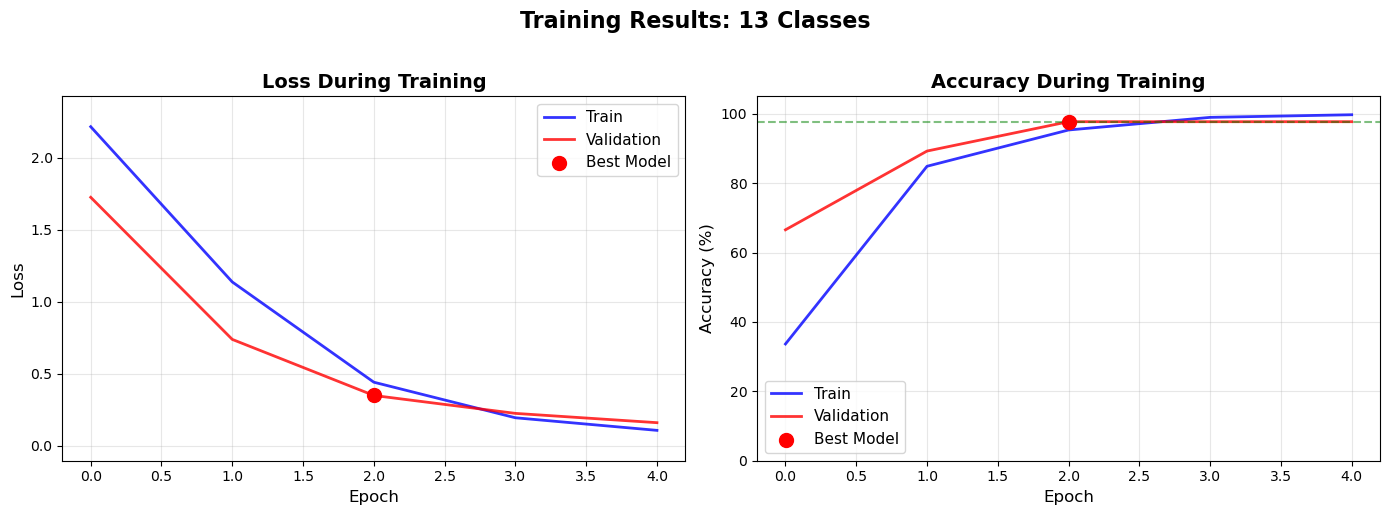

✓ Графики сохранены: training_results\simple_training_plots.png

ПРОВЕРКА ПЕРЕОБУЧЕНИЯ
  Разница Train/Val Accuracy: 2.00%
  ХОРОШЕЕ ОБОБЩЕНИЕ
  Модель хорошо обобщает

БЫСТРАЯ ПРОВЕРКА МОДЕЛИ
Обученная модель найдена: best_model

ТЕСТОВЫЕ ПРЕДСКАЗАНИЯ:
  Загрузка модели...

  1. 'How to activate my card?'
     Класс: 3
     Уверенность: 64.3%
     СРЕДНЯЯ УВЕРЕННОСТЬ

  2. 'I need to transfer money'
     Класс: 11
     Уверенность: 47.5%
     НИЗКАЯ УВЕРЕННОСТЬ

  3. 'What's my balance?'
     Класс: 3
     Уверенность: 41.9%
     НИЗКАЯ УВЕРЕННОСТЬ

  4. 'My card was stolen'
     Класс: 3
     Уверенность: 47.8%
     НИЗКАЯ УВЕРЕННОСТЬ

  5. 'Where is the nearest ATM?'
     Класс: 1
     Уверенность: 56.8%
     НИЗКАЯ УВЕРЕННОСТЬ

  6. 'I want to open a new account'
     Класс: 8
     Уверенность: 28.3%
     НИЗКАЯ УВЕРЕННОСТЬ

  Тестовые предсказания завершены успешно

ИТОГИ И РЕКОМЕНДАЦИИ

ОЦЕНКА МОДЕЛИ:
  Final Val Accuracy: 97.7%
ОТЛИЧНО! Можно использовать в продакшене

СОХРАНЕНН

In [15]:
# АНАЛИЗ РЕЗУЛЬТАТОВ ОБУЧЕНИЯ

print(f"\n{'='*60}")
print("ПРОСТОЙ АНАЛИЗ РЕЗУЛЬТАТОВ ОБУЧЕНИЯ")
print(f"{'='*60}")

import json
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# 1. ПРОВЕРКА ФАЙЛОВ
print("\nПРОВЕРКА ФАЙЛОВ:")

# Ищем последнюю папку с результатами
import glob
result_dirs = glob.glob('./training_results*')
# Фильтруем, чтобы получить только папки (не файлы)
result_dirs = [d for d in result_dirs if Path(d).is_dir()]

if not result_dirs:
    print("ВНИМАНИЕ: Папки с результатами не найдены!")
    print("Пожалуйста, сначала запустите обучение (ячейку с train_model_with_validation)")
    print("Затем вернитесь к этому анализу.")
    exit()

# Берем последнюю папку (самую новую) по времени модификации
result_dirs.sort(key=lambda x: Path(x).stat().st_mtime, reverse=True)
results_dir = Path(result_dirs[0])

print(f"✓ Используется папка: {results_dir.name}")
print(f"  Полный путь: {results_dir}")

# 2. ЗАГРУЗКА ДАННЫХ
print("\nЗАГРУЗКА ДАННЫХ:")

# История обучения
history_file = results_dir / 'training_history.json'
if history_file.exists():
    try:
        with open(history_file, 'r', encoding='utf-8') as f:
            history = json.load(f)
        print(f"✓ История обучения: {len(history['train_loss'])} эпох")
        
        # Проверяем структуру данных
        expected_keys = ['train_loss', 'train_accuracy', 'val_loss', 'val_accuracy']
        missing_keys = [key for key in expected_keys if key not in history]
        if missing_keys:
            print(f"ВНИМАНИЕ: В истории отсутствуют ключи: {missing_keys}")
            
    except Exception as e:
        print(f"✗ Ошибка при загрузке истории: {e}")
        exit()
else:
    print("✗ Файл истории обучения не найден!")
    print(f"  Ожидаемый путь: {history_file}")
    print("\nВОЗМОЖНЫЕ ПРИЧИНЫ:")
    print("1. Обучение еще не завершено")
    print("2. Обучение завершилось с ошибкой")
    print("3. Файл был удален или перемещен")
    exit()

# Лучшие метрики
metrics_file = results_dir / 'best_metrics.json'
if metrics_file.exists():
    try:
        with open(metrics_file, 'r', encoding='utf-8') as f:
            best_metrics = json.load(f)
        print(f"✓ Лучшие метрики загружены")
        print(f"  Лучшая эпоха: {best_metrics.get('epoch', 'N/A')}")
        print(f"  Лучшая Val Accuracy: {best_metrics.get('val_accuracy', 0)*100:.2f}%")
    except Exception as e:
        print(f"✗ Ошибка при загрузке лучших метрик: {e}")
        best_metrics = {}
else:
    best_metrics = {}
    print("ℹЛучшие метрики не найдены (используются последние значения)")

# Сводка обучения
summary_file = results_dir / 'training_summary.json'
if summary_file.exists():
    try:
        with open(summary_file, 'r', encoding='utf-8') as f:
            training_summary = json.load(f)
        print(f"✓ Сводка обучения загружена")
    except Exception as e:
        print(f"✗ Ошибка при загрузке сводки: {e}")
        training_summary = {}
else:
    training_summary = {}

# 3. ОСНОВНЫЕ ЦИФРЫ
print(f"\n{'='*40}")
print("ОСНОВНЫЕ РЕЗУЛЬТАТЫ")
print(f"{'='*40}")

epochs = len(history['train_loss'])

# Получаем последние значения с проверкой на пустоту
try:
    last_train_loss = history['train_loss'][-1] if history['train_loss'] else 0
    last_val_loss = history['val_loss'][-1] if history['val_loss'] else 0
    last_train_acc = history['train_accuracy'][-1] * 100 if history['train_accuracy'] else 0
    last_val_acc = history['val_accuracy'][-1] * 100 if history['val_accuracy'] else 0
except IndexError as e:
    print(f"✗ Ошибка: некорректные данные в истории: {e}")
    exit()

print(f"\nФИНАЛЬНЫЕ МЕТРИКИ (эпоха {epochs}):")
print(f"  Train Loss:     {last_train_loss:.4f}")
print(f"  Val Loss:       {last_val_loss:.4f}")
print(f"  Train Accuracy: {last_train_acc:.2f}%")
print(f"  Val Accuracy:   {last_val_acc:.2f}%")

if best_metrics and 'val_accuracy' in best_metrics:
    best_val_acc = best_metrics['val_accuracy'] * 100
    best_epoch = best_metrics.get('epoch', 'N/A')
    print(f"\nЛУЧШИЙ РЕЗУЛЬТАТ (эпоха {best_epoch}):")
    print(f"  Лучшая Val Accuracy: {best_val_acc:.2f}%")
    
    # Сравниваем с финальной
    if last_val_acc < best_val_acc - 0.1:
        print(f"  Финальная accuracy хуже лучшей на {best_val_acc - last_val_acc:.2f}%")
        print(f"  Рекомендация: использовать модель из папки 'best_model/'")

# 4. ПРОСТЫЕ ГРАФИКИ
print(f"\n{'='*40}")
print("ГРАФИКИ ОБУЧЕНИЯ")
print(f"{'='*40}")

# Создаем графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# График потерь
if history['train_loss'] and history['val_loss']:
    ax1.plot(history['train_loss'], 'b-', label='Train', linewidth=2, alpha=0.8)
    ax1.plot(history['val_loss'], 'r-', label='Validation', linewidth=2, alpha=0.8)
    
    # Добавляем маркер для лучшей эпохи
    if best_metrics and 'epoch' in best_metrics:
        best_epoch_idx = best_metrics['epoch'] - 1  # Индексация с 0
        if best_epoch_idx < len(history['val_loss']):
            ax1.scatter(best_epoch_idx, history['val_loss'][best_epoch_idx], 
                       color='red', s=100, zorder=5, label='Best Model')
    
    ax1.set_title('Loss During Training', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Loss', fontsize=12)
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    # Автоматическая настройка пределов
    all_losses = history['train_loss'] + history['val_loss']
    if all_losses:
        max_loss = max(all_losses)
        min_loss = min(all_losses)
        margin = (max_loss - min_loss) * 0.1
        ax1.set_ylim([min_loss - margin, max_loss + margin])
else:
    ax1.text(0.5, 0.5, 'No Loss Data', ha='center', va='center', transform=ax1.transAxes)
    ax1.set_title('Loss (No Data)')

# График точности
if history['train_accuracy'] and history['val_accuracy']:
    train_acc_percent = [acc*100 for acc in history['train_accuracy']]
    val_acc_percent = [acc*100 for acc in history['val_accuracy']]
    
    ax2.plot(train_acc_percent, 'b-', label='Train', linewidth=2, alpha=0.8)
    ax2.plot(val_acc_percent, 'r-', label='Validation', linewidth=2, alpha=0.8)
    
    # Добавляем маркер для лучшей эпохи
    if best_metrics and 'epoch' in best_metrics:
        best_epoch_idx = best_metrics['epoch'] - 1  # Индексация с 0
        if best_epoch_idx < len(val_acc_percent):
            ax2.scatter(best_epoch_idx, val_acc_percent[best_epoch_idx], 
                       color='red', s=100, zorder=5, label='Best Model')
    
    ax2.set_title('Accuracy During Training', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Accuracy (%)', fontsize=12)
    ax2.legend(fontsize=11)
    ax2.grid(True, alpha=0.3)
    
    # Устанавливаем пределы от 0 до 100%
    ax2.set_ylim([0, 105])
    
    # Горизонтальная линия на уровне лучшей точности
    if best_metrics and 'val_accuracy' in best_metrics:
        best_acc_line = best_metrics['val_accuracy'] * 100
        ax2.axhline(y=best_acc_line, color='green', linestyle='--', alpha=0.5, 
                   label=f'Best: {best_acc_line:.1f}%')
else:
    ax2.text(0.5, 0.5, 'No Accuracy Data', ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Accuracy (No Data)')

# Добавляем общий заголовок
model_name = training_summary.get('num_labels', 'Unknown')
plt.suptitle(f'Training Results: {model_name} Classes', fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()

# Сохраняем график
plot_path = results_dir / 'simple_training_plots.png'
plt.savefig(plot_path, dpi=150, bbox_inches='tight')
plt.show()

print(f"✓ Графики сохранены: {plot_path}")

# 5. ПРОВЕРКА ПЕРЕОБУЧЕНИЯ
print(f"\n{'='*40}")
print("ПРОВЕРКА ПЕРЕОБУЧЕНИЯ")
print(f"{'='*40}")

if last_train_acc > 0 and last_val_acc > 0:
    accuracy_gap = last_train_acc - last_val_acc
    
    print(f"  Разница Train/Val Accuracy: {accuracy_gap:.2f}%")
    
    if accuracy_gap > 15:
        print("  ВОЗМОЖНОЕ ПЕРЕОБУЧЕНИЕ")
        print("  Рекомендация: добавить Dropout, увеличить данные, использовать регуляризацию")
    elif accuracy_gap > 10:
        print("  СРЕДНИЙ РАЗРЫВ")
        print("  Рекомендация: можно попробовать регуляризацию или аугментацию данных")
    else:
        print("  ХОРОШЕЕ ОБОБЩЕНИЕ")
        print("  Модель хорошо обобщает")
else:
    print("  Недостаточно данных для анализа переобучения")

# 6. БЫСТРАЯ ПРОВЕРКА МОДЕЛИ
print(f"\n{'='*40}")
print("БЫСТРАЯ ПРОВЕРКА МОДЕЛИ")
print(f"{'='*40}")

# Проверяем наличие модели
model_path = results_dir / 'best_model'
if not model_path.exists():
    model_path = results_dir / 'final_model'

if model_path.exists():
    print(f"Обученная модель найдена: {model_path.name}")
    
    # Простые тестовые примеры
    test_texts = [
        "How to activate my card?",
        "I need to transfer money",
        "What's my balance?",
        "My card was stolen",
        "Where is the nearest ATM?",
        "I want to open a new account"
    ]
    
    print(f"\nТЕСТОВЫЕ ПРЕДСКАЗАНИЯ:")
    
    try:
        # Импортируем библиотеки
        from transformers import AlbertForSequenceClassification, AlbertTokenizer
        import torch
        
        # Загружаем модель
        print("  Загрузка модели...")
        model = AlbertForSequenceClassification.from_pretrained(model_path)
        tokenizer = AlbertTokenizer.from_pretrained(model_path)
        
        # Функция для предсказания
        def quick_predict(text, model, tokenizer):
            model.eval()
            encoding = tokenizer(text, return_tensors='pt', truncation=True, max_length=128, padding=True)
            
            with torch.no_grad():
                outputs = model(**encoding)
                probs = torch.nn.functional.softmax(outputs.logits, dim=1)
                class_id = torch.argmax(probs, dim=1).item()
                confidence = probs[0][class_id].item()
            
            return class_id, confidence
        
        # Делаем предсказания
        for i, text in enumerate(test_texts, 1):
            try:
                class_id, confidence = quick_predict(text, model, tokenizer)
                print(f"\n  {i}. '{text}'")
                print(f"     Класс: {class_id}")
                print(f"     Уверенность: {confidence:.1%}")
                
                if confidence > 0.8:
                    print(f"     ВЫСОКАЯ УВЕРЕННОСТЬ")
                elif confidence > 0.6:
                    print(f"     СРЕДНЯЯ УВЕРЕННОСТЬ")
                else:
                    print(f"     НИЗКАЯ УВЕРЕННОСТЬ")
                    
            except Exception as e:
                print(f"\n  {i}. Ошибка при предсказании: {e}")
        
        print("\n  Тестовые предсказания завершены успешно")
        
    except Exception as e:
        print(f"✗ Ошибка при загрузке модели: {e}")
        print(f"  Убедитесь, что в папке {model_path} есть файлы:")
        print(f"  - config.json")
        print(f"  - pytorch_model.bin")
        print(f"  - tokenizer_config.json")
else:
    print("✗ Модель не найдена")
    print(f"  Проверьте папки: {results_dir}/best_model/ или {results_dir}/final_model/")

# 7. ИТОГИ
print(f"\n{'='*40}")
print("ИТОГИ И РЕКОМЕНДАЦИИ")
print(f"{'='*40}")

print(f"\nОЦЕНКА МОДЕЛИ:")
print(f"  Final Val Accuracy: {last_val_acc:.1f}%")

if last_val_acc >= 90:
    print("ОТЛИЧНО! Можно использовать в продакшене")
elif last_val_acc >= 80:
    print("ХОРОШО! Подходит для большинства задач")
elif last_val_acc >= 70:
    print("НОРМАЛЬНО! Можно улучшить")
elif last_val_acc >= 50:
    print("ПЛОХО! Нужно дообучать")
else:
    print("ОЧЕНЬ ПЛОХО! Требуется серьезная доработка")

print(f"\nСОХРАНЕННЫЕ ДАННЫЕ:")
print(f"  Основная папка: {results_dir}")
print(f"  Лучшая модель: {results_dir}/best_model/")
print(f"  Финальная модель: {results_dir}/final_model/")
print(f"  Чекпоинты: {results_dir}/checkpoints/")
print(f"  Графики: {results_dir}/simple_training_plots.png")

print(f"\nЧТО ДЕЛАТЬ ДАЛЬШЕ:")
print(f"1. Использовать лучшую модель:")
print(f"   model = AlbertForSequenceClassification.from_pretrained('{results_dir}/best_model/')")
print(f"2. Протестировать на новых данных")
print(f"3. Экспортировать модель для продакшена")
print(f"4. Создать простой API для предсказаний")

print(f"\n{'='*60}")
print("АНАЛИЗ ЗАВЕРШЕН!")
print(f"{'='*60}")


ТЕСТИРОВАНИЕ МОДЕЛИ НА ТЕСТОВЫХ ДАННЫХ



ЗАПУСК ТЕСТИРОВАНИЯ МОДЕЛИ


Библиотеки загружены

ЗАПУСК ПОЛНОГО ТЕСТИРОВАНИЯ МОДЕЛИ
1. Загрузка тестовых данных...
Файл найден: banking_77_test.parquet
Загружено: 520 строк, 2 колонок

Определены колонки:
Текст: 'text'
Метки: 'label'

В тестовых данных найдено 13 уникальных меток
Примеры меток из тестовых данных:
  1. 'exchange rate'
  2. 'card not working'
  3. 'cancel transfer'
  4. 'edit personal details'
  5. 'visa or mastercard'
  6. 'atm support'
  7. 'declined cash withdrawal'
  8. 'terminate account'
  9. 'card swallowed'
  10. 'change pin'

ЗАГРУЗКА МАППИНГА ИЗ ФАЙЛА label_mapping.json...
Файл маппинга найден: d:\Vika\part_2\hwfinal\hw_final\label_mapping.json
Маппинг загружен:
   Количество классов: 13
   Диапазон ID: 0 - 12

ЗАГРУЖЕННЫЙ МАППИНГ:
    0: 'apple pay or google pay'
    1: 'atm support'
    2: 'cancel transfer'
    3: 'card not working'
    4: 'card swallowed'
    5: 'change pin'
    6: 'country support'
    7: 'declin

Обработка батчей:   0%|          | 0/17 [00:00<?, ?it/s]


Предсказания готовы:
   Обработано: 520 примеров

РАСЧЕТ МЕТРИК КАЧЕСТВА

ОСНОВНЫЕ МЕТРИКИ:
   Точность (Accuracy): 0.9558 (95.58%)
   Precision (micro): 0.9558
   Recall (micro): 0.9558
   F1-score (micro): 0.9558

   Precision (macro): 0.9617
   Recall (macro): 0.9558
   F1-score (macro): 0.9550

Confusion Matrix:
   Размер: 13x13

ДЕТАЛЬНЫЙ ОТЧЕТ ПО КЛАССАМ:
                          precision    recall  f1-score   support

 apple pay or google pay      1.000     1.000     1.000        40
             atm support      0.974     0.950     0.962        40
         cancel transfer      0.975     0.975     0.975        40
        card not working      0.889     1.000     0.941        40
          card swallowed      1.000     0.700     0.824        40
              change pin      1.000     0.975     0.987        40
         country support      0.952     1.000     0.976        40
declined cash withdrawal      0.784     1.000     0.879        40
   edit personal details      1.000     

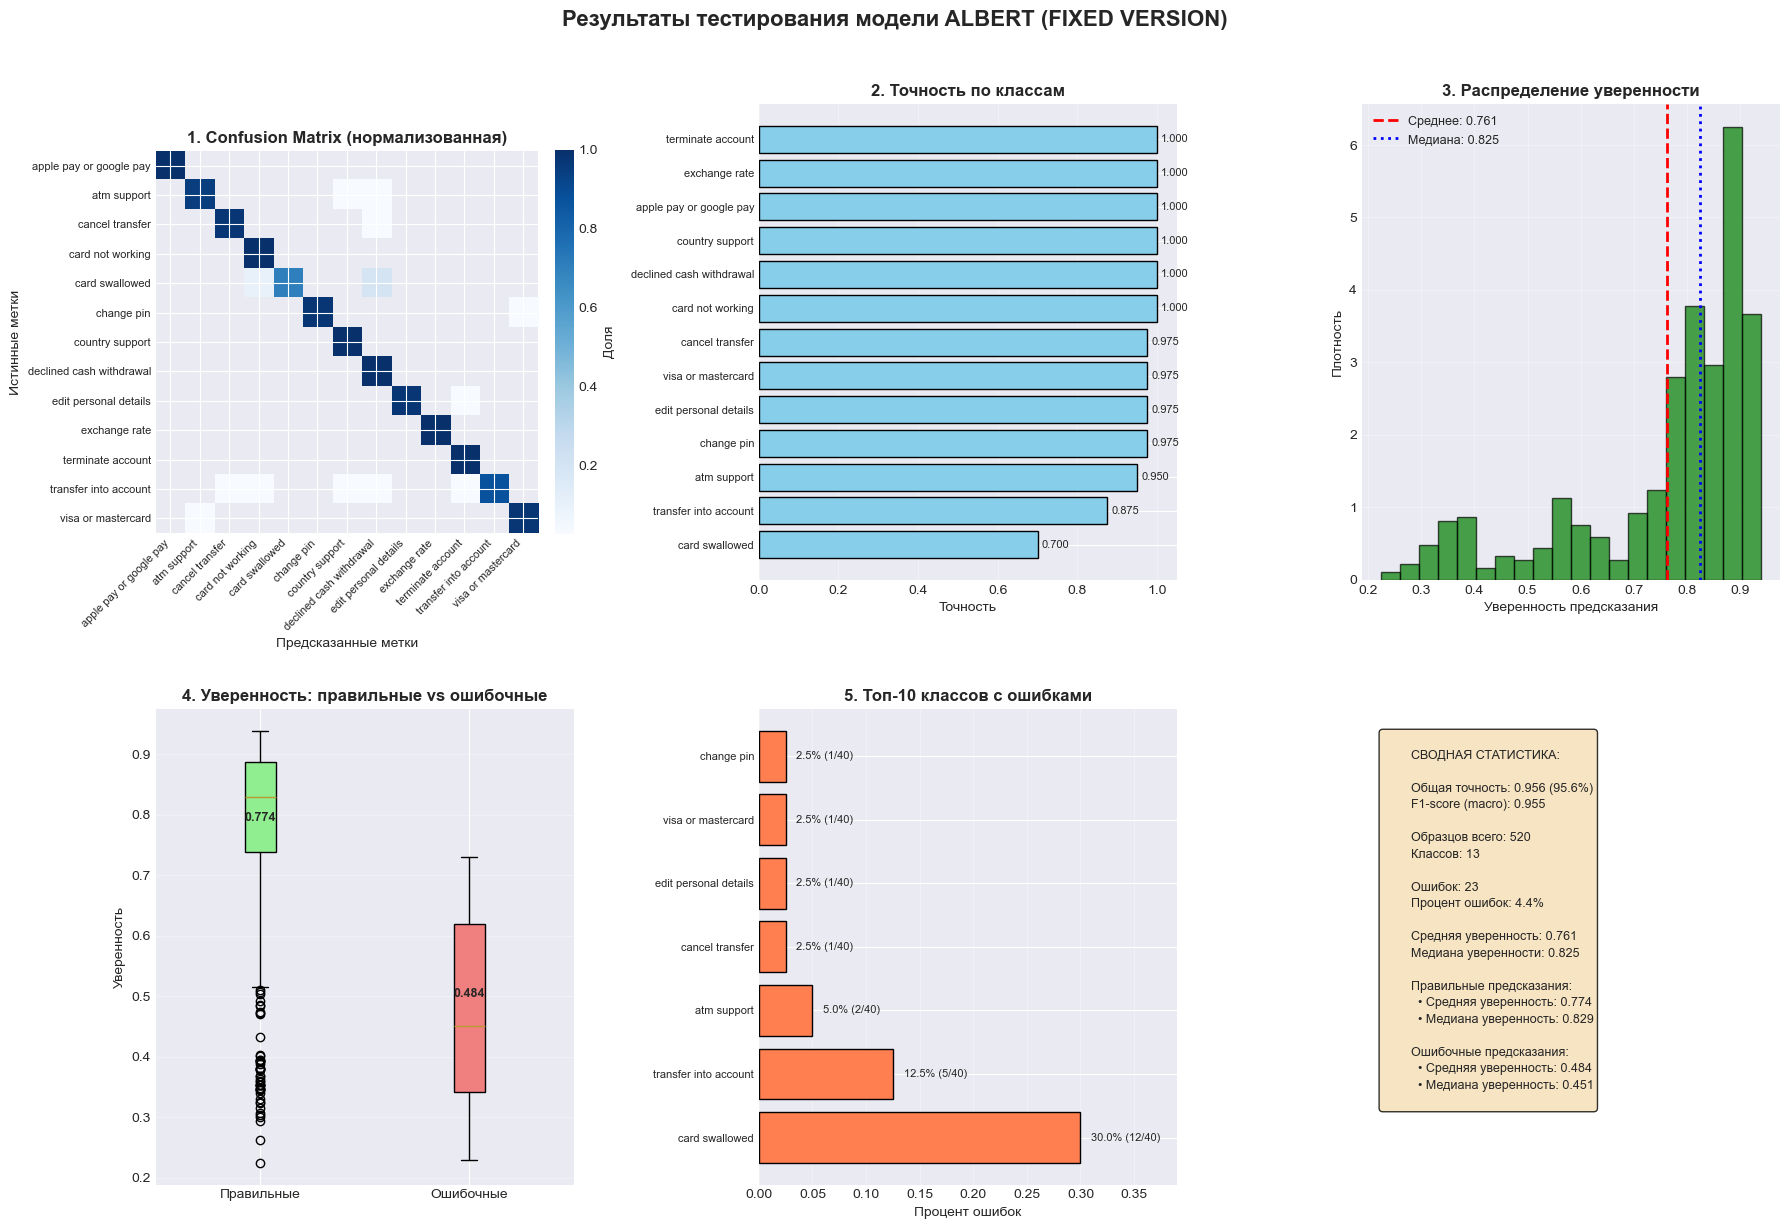

Графики сохранены: d:\Vika\part_2\hwfinal\hw_final\test_results_visualization_fixed.png


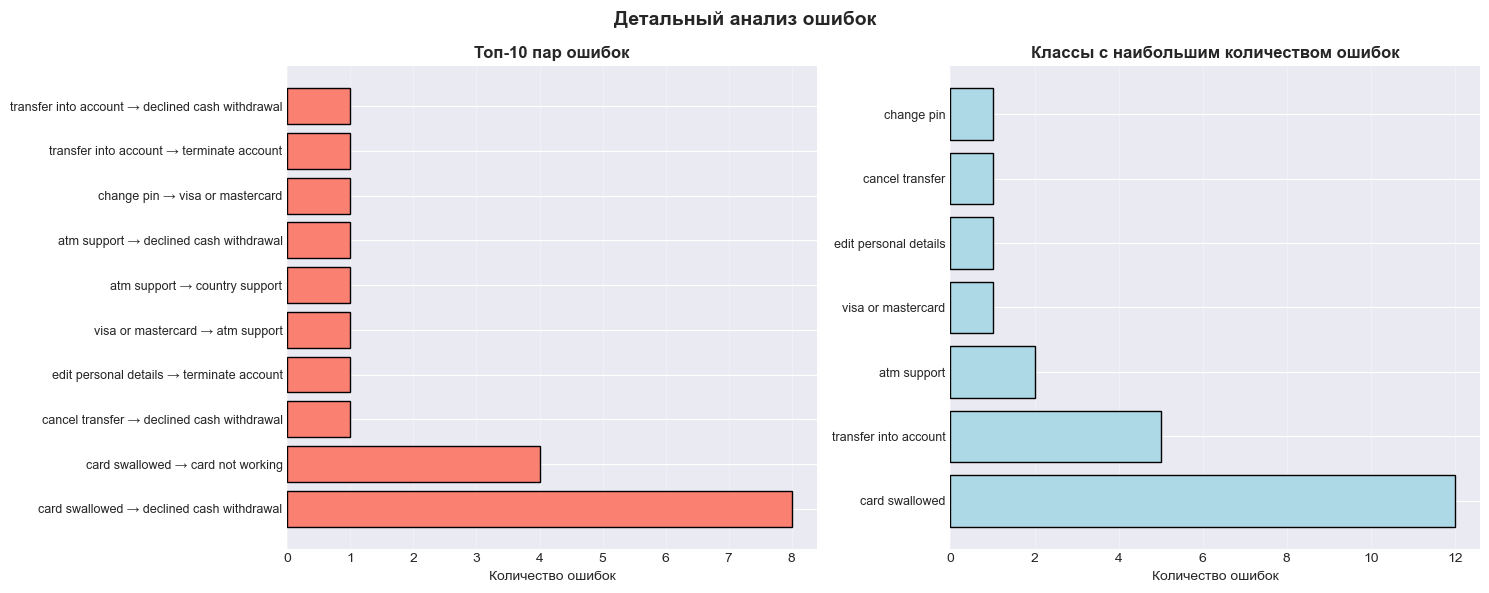

Детальный анализ ошибок сохранен: d:\Vika\part_2\hwfinal\hw_final\error_analysis_detailed.png
Примеры ошибок сохранены: d:\Vika\part_2\hwfinal\hw_final\error_examples.csv

ЭКСПОРТ РЕЗУЛЬТАТОВ ТЕСТИРОВАНИЯ
Метрики сохранены: d:\Vika\part_2\hwfinal\hw_final\test_results_fixed\metrics_20251219_170147.json
Предсказания сохранены: d:\Vika\part_2\hwfinal\hw_final\test_results_fixed\predictions_20251219_170147.csv

ИТОГОВЫЕ РЕЗУЛЬТАТЫ

ОСНОВНЫЕ МЕТРИКИ:
   Точность: 95.58%
   F1-score (macro): 0.9550

ОТЛИЧНЫЙ РЕЗУЛЬТАТ! Модель готова к продакшену.

Все результаты сохранены в: d:\Vika\part_2\hwfinal\hw_final\test_results_fixed

ТЕСТИРОВАНИЕ ВЫПОЛНЕНО УСПЕШНО!
ТЕСТИРОВАНИЕ ПОЛНОСТЬЮ ЗАВЕРШЕНО!


In [17]:
# КОД ДЛЯ ЗАГРУЗКИ ТЕСТОВЫХ ДАННЫХ

print(f"\n{'='*70}")
print("ТЕСТИРОВАНИЕ МОДЕЛИ НА ТЕСТОВЫХ ДАННЫХ")
print(f"{'='*70}")

import pandas as pd
import json
from pathlib import Path
import re
import sys

def load_test_data_fixed():
    """Загрузка тестовых данных с использованием FIXED маппинга меток"""
    print("1. Загрузка тестовых данных...")
    
    try:
        # Проверяем существование файла
        test_file = project_path / 'banking_77_test.parquet'
        
        if not test_file.exists():
            print(f"Файл {test_file.name} не найден!")
            print("Убедитесь, что файл находится в той же папке")
            return None
        
        print(f"Файл найден: {test_file.name}")
        
        # Загружаем данные
        test_df = pd.read_parquet(test_file)
        print(f"Загружено: {len(test_df)} строк, {len(test_df.columns)} колонок")
        
        # Определяем колонки
        text_column = 'text'
        label_column = 'label'
        
        # Проверяем стандартные имена
        if 'text' not in test_df.columns or 'label' not in test_df.columns:
            print("Стандартные колонки 'text' или 'label' не найдены")
            print("Доступные колонки:", list(test_df.columns))
            
            # Автоматический поиск
            for col in test_df.columns:
                col_lower = col.lower()
                if 'text' in col_lower or 'utterance' in col_lower:
                    text_column = col
                elif 'label' in col_lower or 'category' in col_lower or 'intent' in col_lower:
                    label_column = col
        
        print(f"\nОпределены колонки:")
        print(f"Текст: '{text_column}'")
        print(f"Метки: '{label_column}'")
        
        # Очистка данных
        test_df['text_cleaned'] = test_df[text_column].astype(str).str.strip()
        test_df['label_original'] = test_df[label_column].astype(str).str.strip()
        
        print(f"\nВ тестовых данных найдено {test_df['label_original'].nunique()} уникальных меток")
        print(f"Примеры меток из тестовых данных:")
        for i, label in enumerate(test_df['label_original'].unique()[:10], 1):
            print(f"  {i}. '{label}'")
        
        
        # Загрузка маппинга из файла
        
        print(f"\nЗАГРУЗКА МАППИНГА ИЗ ФАЙЛА label_mapping.json...")
        
        mapping_file_path = project_path / 'label_mapping.json'
        
        if not mapping_file_path.exists():
            # Ищем в других местах
            import glob
            possible_paths = [
                project_path / 'label_mapping.json',
                Path('./label_mapping.json'),
                Path('./training_results/label_mapping.json'),
                Path('./training_results_1/label_mapping.json')
            ]
            
            # Добавляем все найденные папки training_results
            result_dirs = glob.glob('./training_results*')
            for dir_path in result_dirs:
                possible_paths.append(Path(dir_path) / 'label_mapping.json')
            
            for path in possible_paths:
                if path.exists():
                    mapping_file_path = path
                    break
        
        if not mapping_file_path.exists():
            print(f"Файл маппинга не найден: {mapping_file_path}")
            print("Убедитесь, что файл label_mapping.json существует")
            return None
        
        print(f"Файл маппинга найден: {mapping_file_path}")
        
        # Загружаем маппинг
        with open(mapping_file_path, 'r', encoding='utf-8') as f:
            mapping_data = json.load(f)
        
        label2id_local = mapping_data['label2id']
        
        # Конвертируем id2label: строковые ключи -> целые числа
        id2label_local = {}
        for key_str, value in mapping_data['id2label'].items():
            try:
                key_int = int(key_str)
                id2label_local[key_int] = value
            except ValueError:
                print(f"Ошибка конвертации ключа '{key_str}' в int")
                continue
        
        print(f"Маппинг загружен:")
        print(f"   Количество классов: {len(label2id_local)}")
        print(f"   Диапазон ID: {min(id2label_local.keys())} - {max(id2label_local.keys())}")
        
        print(f"\nЗАГРУЖЕННЫЙ МАППИНГ:")
        for label_id in sorted(id2label_local.keys()):
            label_name = id2label_local[label_id]
            print(f"   {label_id:2d}: '{label_name}'")
        
        
        # Нормализация для сравнения
        
        print(f"\nНОРМАЛИЗАЦИЯ ИМЕН КЛАССОВ ДЛЯ СРАВНЕНИЯ...")
        
        def normalize_label(label):
            """Нормализация имени класса для сравнения"""
            if not isinstance(label, str):
                label = str(label)
            
            # Приводим к нижнему регистру, убираем пробелы
            normalized = label.strip().lower()
            
            # Заменяем множественные пробелы на один
            normalized = re.sub(r'\s+', ' ', normalized)
            
            return normalized
        
        # Создаем нормализованную версию label2id
        normalized_label2id = {}
        for original_label, label_id in label2id_local.items():
            normalized_label = normalize_label(original_label)
            normalized_label2id[normalized_label] = label_id
            print(f"   Маппинг: '{original_label}' -> '{normalized_label}' -> {label_id}")
        
        # Нормализуем метки в тестовых данных
        test_df['label_normalized'] = test_df['label_original'].apply(normalize_label)
        
        
        # Применяем маппинг с нормализацией
        
        print(f"\nПРИМЕНЕНИЕ МАППИНГА К ТЕСТОВЫМ ДАННЫМ...")
        
        # Применяем маппинг через нормализованные имена
        test_df['label_id'] = test_df['label_normalized'].map(normalized_label2id)
        
        # Разделяем на известные и неизвестные метки
        known_mask = test_df['label_id'].notna()
        test_df_known = test_df[known_mask].copy()
        test_df_unknown = test_df[~known_mask]
        
        print(f"\nРЕЗУЛЬТАТЫ МАППИНГА:")
        print(f"   Всего примеров в файле: {len(test_df)}")
        print(f"   Примеров с известными метками: {len(test_df_known)}")
        print(f"   Примеров с неизвестными метками: {len(test_df_unknown)}")
        
        if len(test_df_unknown) > 0:
            print(f"\nНЕИЗВЕСТНЫЕ МЕТКИ (первые 10):")
            unknown_labels = test_df_unknown['label_original'].unique()[:10]
            for i, label in enumerate(unknown_labels, 1):
                print(f"   {i}. '{label}' -> нормализовано: '{normalize_label(label)}'")
            
            # Проверяем, может быть проблема в нормализации
            print(f"\nПРОВЕРКА ПРОБЛЕМНЫХ МЕТОК:")
            for label in unknown_labels[:5]:
                normalized = normalize_label(label)
                if normalized in normalized_label2id:
                    print(f"   '{label}' -> '{normalized}' НАЙДЕН в маппинге!")
                else:
                    print(f"   '{label}' -> '{normalized}' не найден")
        
        if len(test_df_known) == 0:
            print(f"\nКРИТИЧЕСКАЯ ОШИБКА: Нет примеров с известными метками!")
            print("Проверьте соответствие имен классов в тестовых данных и маппинге")
            return None
        
        
        # Проверка и статистика
        
        print(f"\nСТАТИСТИКА ПО ИЗВЕСТНЫМ МЕТКАМ:")
        
        label_counts = test_df_known['label_id'].value_counts().sort_index()
        
        for label_id in sorted(label_counts.index):
            count = label_counts[label_id]
            label_name = id2label_local.get(label_id, f'class_{label_id}')
            percentage = count / len(test_df_known) * 100
            
            print(f"   {label_id:2d} ({label_name:30s}): {count:4d} примеров ({percentage:.1f}%)")
        
        # Проверка диапазона
        min_id = test_df_known['label_id'].min()
        max_id = test_df_known['label_id'].max()
        
        print(f"\nПРОВЕРКА ДИАПАЗОНА МЕТОК:")
        print(f"   Минимальный ID: {min_id}")
        print(f"   Максимальный ID: {max_id}")
        print(f"   Ожидаемый диапазон: 0-{len(label2id_local)-1}")
        
        if min_id < 0 or max_id >= len(label2id_local):
            print(f"   ВНИМАНИЕ: Метки вне ожидаемого диапазона!")
        
        
        # Сохраняем результаты
        
        test_data_info = {
            'df': test_df_known,
            'text_column': text_column,
            'label_column': label_column,
            'label2id': label2id_local,      # Оригинальный маппинг
            'id2label': id2label_local,      # Оригинальный маппинг
            'normalized_label2id': normalized_label2id,  # Нормализованный маппинг
            'num_original_examples': len(test_df),
            'num_known_examples': len(test_df_known),
            'num_unknown_examples': len(test_df_unknown),
            'mapping_file': str(mapping_file_path)
        }
        
        # Сохраняем информацию о маппинге для отладки
        mapping_info_file = project_path / 'mapping_debug_info.json'
        debug_info = {
            'test_labels_sample': test_df['label_original'].unique()[:20].tolist(),
            'mapping_keys_sample': list(label2id_local.keys())[:20],
            'normalized_mapping_keys': list(normalized_label2id.keys()),
            'matched_count': len(test_df_known),
            'unmatched_count': len(test_df_unknown),
            'unmatched_examples': test_df_unknown['label_original'].unique()[:20].tolist() if len(test_df_unknown) > 0 else []
        }
        
        with open(mapping_info_file, 'w', encoding='utf-8') as f:
            json.dump(debug_info, f, indent=2, ensure_ascii=False)
        
        print(f"\nОтладочная информация сохранена в: {mapping_info_file}")
        
        return test_data_info
        
    except Exception as e:
        print(f"Ошибка загрузки тестовых данных: {e}")
        import traceback
        traceback.print_exc()
        return None

def load_trained_model_fixed(model_path=None):
    """Загрузка обученной модели"""
    print("\n2. Загрузка обученной модели...")
    
    try:
        from transformers import AlbertForSequenceClassification, AlbertTokenizer
        
        # Автоматический поиск последней модели
        if model_path is None:
            import glob
            result_dirs = glob.glob('./training_results*')
            result_dirs = [d for d in result_dirs if Path(d).is_dir()]
            
            if result_dirs:
                # Сортируем по времени модификации
                result_dirs.sort(key=lambda x: Path(x).stat().st_mtime, reverse=True)
                latest_dir = Path(result_dirs[0])
                
                # Проверяем сначала best_model, затем final_model
                if (latest_dir / 'best_model').exists():
                    model_path = latest_dir / 'best_model'
                elif (latest_dir / 'final_model').exists():
                    model_path = latest_dir / 'final_model'
                else:
                    model_path = latest_dir
            else:
                print("Папки с результатами не найдены!")
                return None, None
        
        model_dir = Path(model_path)
        
        if not model_dir.exists():
            print(f"Директория модели не найдена: {model_dir}")
            return None, None
        
        print(f"Загружаю модель из: {model_dir}")
        
        # Загружаем модель и токенизатор
        model = AlbertForSequenceClassification.from_pretrained(model_dir)
        tokenizer = AlbertTokenizer.from_pretrained(model_dir)
        
        print(f"Модель загружена:")
        print(f"   Количество классов: {model.config.num_labels}")
        print(f"   Архитектура: {model.__class__.__name__}")
        
        return model, tokenizer
        
    except Exception as e:
        print(f"Ошибка загрузки модели: {e}")
        import traceback
        traceback.print_exc()
        return None, None

def create_test_dataset_fixed(test_data_info, tokenizer, max_length=128):
    """Создание тестового датасета"""
    print("\n3. Подготовка тестового датасета...")
    
    try:
        from torch.utils.data import Dataset, DataLoader
        import torch
        
        test_df = test_data_info['df']
        
        class TestDataset(Dataset):
            def __init__(self, dataframe, tokenizer, max_length):
                self.dataframe = dataframe
                self.tokenizer = tokenizer
                self.max_length = max_length
                self.texts = dataframe['text_cleaned'].tolist()
                self.labels = dataframe['label_id'].tolist()
                self.original_labels = dataframe['label_original'].tolist()
            
            def __len__(self):
                return len(self.dataframe)
            
            def __getitem__(self, idx):
                text = str(self.texts[idx])
                label = self.labels[idx]
                original_label = self.original_labels[idx]
                
                # Токенизация
                encoding = self.tokenizer(
                    text,
                    truncation=True,
                    padding='max_length',
                    max_length=self.max_length,
                    return_tensors='pt'
                )
                
                item = {
                    'input_ids': encoding['input_ids'].flatten(),
                    'attention_mask': encoding['attention_mask'].flatten(),
                    'labels': torch.tensor(label, dtype=torch.long),
                    'original_label': original_label,
                    'text': text
                }
                
                return item
        
        # Создаем датасет
        test_dataset = TestDataset(test_df, tokenizer, max_length)
        
        print(f"Тестовый датасет создан:")
        print(f"   Примеров: {len(test_dataset)}")
        print(f"   Макс. длина: {max_length}")
        
        # Пример данных
        if len(test_dataset) > 0:
            sample = test_dataset[0]
            print(f"\nПример данных:")
            print(f"   Текст: '{sample['text'][:80]}...'")
            print(f"   Label ID: {sample['labels'].item()}")
            print(f"   Original Label: '{sample['original_label']}'")
        
        return test_dataset
        
    except Exception as e:
        print(f"Ошибка создания датасета: {e}")
        return None

def test_model_on_dataset_fixed(model, test_dataset, batch_size=32):
    """Тестирование модели на датасете"""
    print(f"\n{'='*70}")
    print("ТЕСТИРОВАНИЕ МОДЕЛИ")
    print(f"{'='*70}")
    
    from torch.utils.data import DataLoader
    import torch
    import numpy as np
    from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
    from tqdm.auto import tqdm
    
    try:
        # Создаем DataLoader
        test_loader = DataLoader(
            test_dataset,
            batch_size=batch_size,
            shuffle=False,
            num_workers=2 if torch.cuda.is_available() else 0
        )
        
        print(f"Параметры тестирования:")
        print(f"   Batch size: {batch_size}")
        print(f"   Количество батчей: {len(test_loader)}")
        print(f"   Устройство: {'GPU' if torch.cuda.is_available() else 'CPU'}")
        
        # Перемещаем модель на устройство
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model.to(device)
        model.eval()
        
        # Сбор предсказаний
        all_predictions = []
        all_labels = []
        all_texts = []
        all_original_labels = []
        all_probabilities = []
        
        print("\nДелаю предсказания...")
        
        with torch.no_grad():
            for batch in tqdm(test_loader, desc="Обработка батчей"):
                # Перемещаем данные на устройство
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)
                
                # Получаем предсказания
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                
                probabilities = torch.nn.functional.softmax(outputs.logits, dim=1)
                predictions = torch.argmax(outputs.logits, dim=1)
                
                # Сохраняем результаты
                all_predictions.extend(predictions.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                all_texts.extend(batch['text'])
                all_original_labels.extend(batch['original_label'])
                all_probabilities.extend(probabilities.cpu().numpy())
        
        # Конвертируем в numpy массивы
        all_predictions = np.array(all_predictions)
        all_labels = np.array(all_labels)
        all_probabilities = np.array(all_probabilities)
        
        print(f"\nПредсказания готовы:")
        print(f"   Обработано: {len(all_predictions)} примеров")
        
        return {
            'predictions': all_predictions,
            'true_labels': all_labels,
            'texts': all_texts,
            'original_labels': all_original_labels,
            'probabilities': all_probabilities,
            'test_loader': test_loader
        }
        
    except Exception as e:
        print(f"Ошибка тестирования: {e}")
        import traceback
        traceback.print_exc()
        return None

def calculate_metrics_fixed(test_results, label2id=None, id2label=None):
    """Расчет метрик качества"""
    print(f"\n{'='*70}")
    print("РАСЧЕТ МЕТРИК КАЧЕСТВА")
    print(f"{'='*70}")
    
    try:
        from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                                   f1_score, confusion_matrix, classification_report)
        import numpy as np
        
        y_true = test_results['true_labels']
        y_pred = test_results['predictions']
        
        print(f"\nОСНОВНЫЕ МЕТРИКИ:")
        
        # Точность
        accuracy = accuracy_score(y_true, y_pred)
        print(f"   Точность (Accuracy): {accuracy:.4f} ({accuracy*100:.2f}%)")
        
        # Precision, Recall, F1
        precision_micro = precision_score(y_true, y_pred, average='micro', zero_division=0)
        recall_micro = recall_score(y_true, y_pred, average='micro', zero_division=0)
        f1_micro = f1_score(y_true, y_pred, average='micro', zero_division=0)
        
        print(f"   Precision (micro): {precision_micro:.4f}")
        print(f"   Recall (micro): {recall_micro:.4f}")
        print(f"   F1-score (micro): {f1_micro:.4f}")
        
        # Macro average
        precision_macro = precision_score(y_true, y_pred, average='macro', zero_division=0)
        recall_macro = recall_score(y_true, y_pred, average='macro', zero_division=0)
        f1_macro = f1_score(y_true, y_pred, average='macro', zero_division=0)
        
        print(f"\n   Precision (macro): {precision_macro:.4f}")
        print(f"   Recall (macro): {recall_macro:.4f}")
        print(f"   F1-score (macro): {f1_macro:.4f}")
        
        # Confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        print(f"\nConfusion Matrix:")
        print(f"   Размер: {cm.shape[0]}x{cm.shape[1]}")
        
        # Classification report
        print(f"\nДЕТАЛЬНЫЙ ОТЧЕТ ПО КЛАССАМ:")
        
        # Создаем имена классов
        if id2label is not None:
            target_names = [id2label.get(i, f'Class_{i}') for i in sorted(np.unique(y_true))]
        else:
            target_names = [f'Class_{i}' for i in sorted(np.unique(y_true))]
        
        report = classification_report(y_true, y_pred, target_names=target_names, digits=3)
        print(report)
        
        # Сохраняем отчет в файл
        report_file = project_path / 'test_classification_report_fixed.txt'
        with open(report_file, 'w', encoding='utf-8') as f:
            f.write("Отчет по классификации на тестовых данных (FIXED VERSION)\n")
            f.write("\n\n")
            f.write(f"Точность (Accuracy): {accuracy:.4f}\n")
            f.write(f"Precision (macro): {precision_macro:.4f}\n")
            f.write(f"Recall (macro): {recall_macro:.4f}\n")
            f.write(f"F1-score (macro): {f1_macro:.4f}\n\n")
            f.write(report)
        
        print(f"Отчет сохранен в: {report_file}")
        
        metrics = {
            'accuracy': accuracy,
            'precision_micro': precision_micro,
            'recall_micro': recall_micro,
            'f1_micro': f1_micro,
            'precision_macro': precision_macro,
            'recall_macro': recall_macro,
            'f1_macro': f1_macro,
            'confusion_matrix': cm,
            'classification_report': report
        }
        
        return metrics
        
    except Exception as e:
        print(f"Ошибка расчета метрик: {e}")
        import traceback
        traceback.print_exc()
        return None

def visualize_results_fixed(test_results, metrics, id2label=None):
    """Визуализация результатов тестирования с улучшенными графиками"""
    print(f"\n{'='*70}")
    print("ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
    print(f"{'='*70}")
    
    try:
        import matplotlib.pyplot as plt
        import seaborn as sns
        import numpy as np
        import pandas as pd
        from matplotlib import cm
        
        y_true = test_results['true_labels']
        y_pred = test_results['predictions']
        probabilities = test_results['probabilities']
        texts = test_results['texts']
        
        # Настройка стиля графиков
        plt.style.use('seaborn-v0_8-darkgrid')
        sns.set_palette("husl")
        
        # Создаем фигуру с 5 подграфиками
        fig = plt.figure(figsize=(18, 12))
        
        # 1. Confusion Matrix Heatmap (нормализованная)
        ax1 = plt.subplot(2, 3, 1)
        cm = metrics['confusion_matrix']
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        # Маскируем нули для лучшей визуализации
        cm_masked = np.ma.masked_where(cm_normalized == 0, cm_normalized)
        
        im = ax1.imshow(cm_masked, cmap='Blues', interpolation='nearest')
        plt.colorbar(im, ax=ax1, label='Доля', fraction=0.046, pad=0.04)
        
        # Настройка подписей
        if id2label and len(id2label) <= 20:
            class_labels = [id2label.get(i, f'C{i}') for i in range(len(id2label))]
            ax1.set_xticks(range(len(class_labels)))
            ax1.set_yticks(range(len(class_labels)))
            ax1.set_xticklabels(class_labels, rotation=45, ha='right', fontsize=8)
            ax1.set_yticklabels(class_labels, fontsize=8)
        
        ax1.set_xlabel('Предсказанные метки', fontsize=10)
        ax1.set_ylabel('Истинные метки', fontsize=10)
        ax1.set_title('1. Confusion Matrix (нормализованная)', fontsize=12, fontweight='bold')
        
        # 2. Точность по классам (bar chart)
        ax2 = plt.subplot(2, 3, 2)
        
        # Вычисляем точность для каждого класса
        unique_classes = np.unique(y_true)
        class_accuracies = []
        class_names = []
        
        for cls in unique_classes:
            mask = y_true == cls
            if np.sum(mask) > 0:
                acc = np.mean(y_pred[mask] == y_true[mask])
                class_accuracies.append(acc)
                if id2label:
                    class_names.append(id2label.get(cls, f'Class_{cls}'))
                else:
                    class_names.append(f'C{cls}')
        
        # Сортируем по точности
        sorted_indices = np.argsort(class_accuracies)
        sorted_accuracies = [class_accuracies[i] for i in sorted_indices]
        sorted_names = [class_names[i] for i in sorted_indices]
        
        # Создаем бар-чарт
        bars = ax2.barh(range(len(sorted_accuracies)), sorted_accuracies, color='skyblue', edgecolor='black')
        
        # Добавляем значения на барчарт
        for i, (bar, acc) in enumerate(zip(bars, sorted_accuracies)):
            ax2.text(acc + 0.01, bar.get_y() + bar.get_height()/2, 
                    f'{acc:.3f}', va='center', fontsize=8)
        
        ax2.set_yticks(range(len(sorted_names)))
        ax2.set_yticklabels(sorted_names, fontsize=8)
        ax2.set_xlabel('Точность', fontsize=10)
        ax2.set_xlim([0, 1.05])
        ax2.set_title('2. Точность по классам', fontsize=12, fontweight='bold')
        ax2.grid(True, axis='x', alpha=0.3)
        
        # 3. Распределение уверенности предсказаний
        ax3 = plt.subplot(2, 3, 3)
        
        # Берем максимальную вероятность (уверенность) для каждого предсказания
        confidences = np.max(probabilities, axis=1)
        
        # Создаем гистограмму
        n_bins = 20
        ax3.hist(confidences, bins=n_bins, alpha=0.7, color='green', 
                edgecolor='black', density=True)
        ax3.axvline(x=np.mean(confidences), color='red', linestyle='--', 
                   linewidth=2, label=f'Среднее: {np.mean(confidences):.3f}')
        ax3.axvline(x=np.median(confidences), color='blue', linestyle=':', 
                   linewidth=2, label=f'Медиана: {np.median(confidences):.3f}')
        
        ax3.set_xlabel('Уверенность предсказания', fontsize=10)
        ax3.set_ylabel('Плотность', fontsize=10)
        ax3.set_title('3. Распределение уверенности', fontsize=12, fontweight='bold')
        ax3.legend(fontsize=9)
        ax3.grid(True, alpha=0.3)
        
        # 4. Уверенность: правильные vs ошибочные
        ax4 = plt.subplot(2, 3, 4)
        
        # Разделяем уверенность на правильные и ошибочные предсказания
        correct_mask = y_true == y_pred
        correct_conf = confidences[correct_mask]
        incorrect_conf = confidences[~correct_mask]
        
        # Создаем boxplot
        box_data = [correct_conf, incorrect_conf] if len(incorrect_conf) > 0 else [correct_conf]
        box_labels = ['Правильные', 'Ошибочные'] if len(incorrect_conf) > 0 else ['Правильные']
        
        bp = ax4.boxplot(box_data, labels=box_labels, patch_artist=True)
        
        # Настройка цветов
        colors = ['lightgreen', 'lightcoral']
        for patch, color in zip(bp['boxes'], colors[:len(box_data)]):
            patch.set_facecolor(color)
        
        # Добавляем средние значения
        for i, data in enumerate(box_data):
            mean_val = np.mean(data)
            ax4.text(i + 1, mean_val + 0.01, f'{mean_val:.3f}', 
                    ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        ax4.set_ylabel('Уверенность', fontsize=10)
        ax4.set_title('4. Уверенность: правильные vs ошибочные', fontsize=12, fontweight='bold')
        ax4.grid(True, axis='y', alpha=0.3)
        
        # 5. Топ-10 классов с наибольшей ошибкой
        ax5 = plt.subplot(2, 3, 5)
        
        # Вычисляем количество ошибок по классам
        error_counts = {}
        total_counts = {}
        
        for true, pred in zip(y_true, y_pred):
            if true not in total_counts:
                total_counts[true] = 0
            total_counts[true] += 1
            
            if true != pred:
                if true not in error_counts:
                    error_counts[true] = 0
                error_counts[true] += 1
        
        # Вычисляем процент ошибок
        error_rates = {}
        for cls in error_counts:
            if cls in total_counts and total_counts[cls] > 0:
                error_rates[cls] = error_counts[cls] / total_counts[cls]
        
        # Сортируем по проценту ошибок и берем топ-10
        sorted_errors = sorted(error_rates.items(), key=lambda x: x[1], reverse=True)[:10]
        
        if sorted_errors:
            classes, rates = zip(*sorted_errors)
            
            # Преобразуем имена классов
            if id2label:
                class_labels = [id2label.get(cls, f'Class_{cls}') for cls in classes]
            else:
                class_labels = [f'C{cls}' for cls in classes]
            
            # Создаем бар-чарт
            bars = ax5.barh(range(len(rates)), rates, color='coral', edgecolor='black')
            
            # Добавляем значения
            for i, (bar, rate, cls) in enumerate(zip(bars, rates, classes)):
                count = error_counts.get(cls, 0)
                total = total_counts.get(cls, 0)
                ax5.text(rate + 0.01, bar.get_y() + bar.get_height()/2, 
                        f'{rate:.1%} ({count}/{total})', va='center', fontsize=8)
            
            ax5.set_yticks(range(len(class_labels)))
            ax5.set_yticklabels(class_labels, fontsize=8)
            ax5.set_xlabel('Процент ошибок', fontsize=10)
            ax5.set_xlim([0, min(1.0, max(rates) * 1.3)])
            ax5.set_title('5. Топ-10 классов с ошибками', fontsize=12, fontweight='bold')
            ax5.grid(True, axis='x', alpha=0.3)
        else:
            ax5.text(0.5, 0.5, 'Нет ошибок', ha='center', va='center', 
                    fontsize=14, transform=ax5.transAxes)
            ax5.set_title('5. Топ-10 классов с ошибками', fontsize=12, fontweight='bold')
        
        # 6. Сводная статистика (текстовый блок)
        ax6 = plt.subplot(2, 3, 6)
        ax6.axis('off')  # Отключаем оси
        
        # Вычисляем дополнительные метрики
        accuracy = metrics['accuracy']
        f1_macro = metrics['f1_macro']
        total_samples = len(y_true)
        num_classes = len(np.unique(y_true))
        
        # Количество ошибок
        num_errors = np.sum(y_true != y_pred)
        error_rate = num_errors / total_samples
        
        # Средняя уверенность
        mean_confidence = np.mean(confidences)
        median_confidence = np.median(confidences)
        
        # Создаем текстовый отчет
        report_text = f"""
        СВОДНАЯ СТАТИСТИКА:
        
        Общая точность: {accuracy:.3f} ({accuracy*100:.1f}%)
        F1-score (macro): {f1_macro:.3f}
        
        Образцов всего: {total_samples}
        Классов: {num_classes}
        
        Ошибок: {num_errors}
        Процент ошибок: {error_rate:.1%}
        
        Средняя уверенность: {mean_confidence:.3f}
        Медиана уверенности: {median_confidence:.3f}
        
        Правильные предсказания:
          • Средняя уверенность: {np.mean(correct_conf):.3f}
          • Медиана уверенность: {np.median(correct_conf):.3f}
        """
        
        if len(incorrect_conf) > 0:
            report_text += f"""
        Ошибочные предсказания:
          • Средняя уверенность: {np.mean(incorrect_conf):.3f}
          • Медиана уверенность: {np.median(incorrect_conf):.3f}
            """
        
        ax6.text(0.05, 0.95, report_text, transform=ax6.transAxes,
                fontsize=9, va='top', linespacing=1.5,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        plt.suptitle('Результаты тестирования модели ALBERT (FIXED VERSION)', 
                    fontsize=16, fontweight='bold', y=1.02)
        plt.tight_layout()
        
        # Сохраняем график
        plot_path = project_path / 'test_results_visualization_fixed.png'
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"Графики сохранены: {plot_path}")
        
        # Создаем дополнительный график с детализацией ошибок
        create_detailed_error_analysis(test_results, id2label)
        
        return plot_path
        
    except Exception as e:
        print(f"Ошибка визуализации: {e}")
        import traceback
        traceback.print_exc()
        return None

def create_detailed_error_analysis(test_results, id2label=None):
    """Создание детального анализа ошибок"""
    try:
        import matplotlib.pyplot as plt
        import seaborn as sns
        import numpy as np
        import pandas as pd
        from collections import Counter
        
        y_true = test_results['true_labels']
        y_pred = test_results['predictions']
        texts = test_results['texts']
        
        # Создаем DataFrame для анализа
        df_errors = pd.DataFrame({
            'text': texts,
            'true_label': y_true,
            'pred_label': y_pred,
            'is_correct': y_true == y_pred
        })
        
        # Добавляем названия классов
        if id2label:
            df_errors['true_class'] = df_errors['true_label'].apply(
                lambda x: id2label.get(x, f'Class_{x}')
            )
            df_errors['pred_class'] = df_errors['pred_label'].apply(
                lambda x: id2label.get(x, f'Class_{x}')
            )
        else:
            df_errors['true_class'] = df_errors['true_label'].apply(lambda x: f'C{x}')
            df_errors['pred_class'] = df_errors['pred_label'].apply(lambda x: f'C{x}')
        
        # Фильтруем только ошибки
        df_wrong = df_errors[~df_errors['is_correct']].copy()
        
        if len(df_wrong) == 0:
            print("Нет ошибок для анализа!")
            return
        
        # Создаем матрицу ошибок (confusion matrix для ошибок)
        error_pairs = list(zip(df_wrong['true_class'], df_wrong['pred_class']))
        error_counter = Counter(error_pairs)
        
        # Создаем heatmap ошибок
        if len(error_counter) > 0:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
            
            # 1. Наиболее частые пары ошибок
            most_common = error_counter.most_common(10)
            if most_common:
                pairs, counts = zip(*most_common)
                true_classes, pred_classes = zip(*pairs)
                
                y_pos = range(len(pairs))
                ax1.barh(y_pos, counts, color='salmon', edgecolor='black')
                ax1.set_yticks(y_pos)
                
                # Создаем метки
                labels = [f'{true} → {pred}' for true, pred in pairs]
                ax1.set_yticklabels(labels, fontsize=9)
                ax1.set_xlabel('Количество ошибок', fontsize=10)
                ax1.set_title('Топ-10 пар ошибок', fontsize=12, fontweight='bold')
                ax1.grid(True, axis='x', alpha=0.3)
            
            # 2. Классы с наибольшим количеством ошибок
            class_errors = df_wrong['true_class'].value_counts().head(10)
            if len(class_errors) > 0:
                ax2.barh(range(len(class_errors)), class_errors.values, 
                        color='lightblue', edgecolor='black')
                ax2.set_yticks(range(len(class_errors)))
                ax2.set_yticklabels(class_errors.index, fontsize=9)
                ax2.set_xlabel('Количество ошибок', fontsize=10)
                ax2.set_title('Классы с наибольшим количеством ошибок', 
                            fontsize=12, fontweight='bold')
                ax2.grid(True, axis='x', alpha=0.3)
            
            plt.suptitle('Детальный анализ ошибок', fontsize=14, fontweight='bold')
            plt.tight_layout()
            
            error_plot_path = project_path / 'error_analysis_detailed.png'
            plt.savefig(error_plot_path, dpi=300, bbox_inches='tight')
            plt.show()
            
            print(f"Детальный анализ ошибок сохранен: {error_plot_path}")
            
            # Сохраняем примеры ошибок в CSV
            error_examples_path = project_path / 'error_examples.csv'
            df_wrong.to_csv(error_examples_path, index=False, encoding='utf-8')
            print(f"Примеры ошибок сохранены: {error_examples_path}")
    
    except Exception as e:
        print(f"Не удалось создать детальный анализ ошибок: {e}")

def run_complete_test_pipeline_fixed():
    """Запуск полного пайплайна тестирования"""
    print(f"\n{'='*70}")
    print("ЗАПУСК ПОЛНОГО ТЕСТИРОВАНИЯ МОДЕЛИ")
    print(f"{'='*70}")
    
    try:
        # Шаг 1: Загрузка тестовых данных С ФИКСИРОВАННЫМ МАППИНГОМ
        test_data_info = load_test_data_fixed()
        if test_data_info is None:
            print("Не удалось загрузить тестовые данные")
            return None
        
        print(f"\nТЕСТОВЫЕ ДАННЫЕ УСПЕШНО ЗАГРУЖЕНЫ!")
        print(f"   Использовано примеров: {len(test_data_info['df'])} из {test_data_info['num_original_examples']}")
        print(f"   Маппинг из файла: {test_data_info['mapping_file']}")
        
        # Шаг 2: Загрузка обученной модели
        model, tokenizer = load_trained_model_fixed()
        if model is None or tokenizer is None:
            print("Не удалось загрузить модель")
            return None
        
        # Шаг 3: Подготовка датасета
        test_dataset = create_test_dataset_fixed(test_data_info, tokenizer)
        if test_dataset is None:
            print("Не удалось создать тестовый датасет")
            return None
        
        # Шаг 4: Тестирование модели
        test_results = test_model_on_dataset_fixed(model, test_dataset)
        if test_results is None:
            print("Не удалось протестировать модель")
            return None
        
        # Шаг 5: Расчет метрик
        metrics = calculate_metrics_fixed(test_results, test_data_info['label2id'], test_data_info['id2label'])
        if metrics is None:
            print("Не удалось рассчитать метрики")
            return None
        
        # Шаг 6: Визуализация результатов
        plot_path = visualize_results_fixed(test_results, metrics, test_data_info['id2label'])
        
        # Шаг 7: Экспорт результатов
        print(f"\n{'='*70}")
        print("ЭКСПОРТ РЕЗУЛЬТАТОВ ТЕСТИРОВАНИЯ")
        print(f"{'='*70}")
        
        import numpy as np
        from datetime import datetime
        
        # Создаем директорию для результатов
        results_dir = project_path / 'test_results_fixed'
        results_dir.mkdir(exist_ok=True)
        
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        
        # Сохраняем метрики
        metrics_dict = {
            'accuracy': float(metrics['accuracy']),
            'precision_macro': float(metrics['precision_macro']),
            'recall_macro': float(metrics['recall_macro']),
            'f1_macro': float(metrics['f1_macro']),
            'timestamp': timestamp,
            'model_name': 'ALBERT-base-v2',
            'num_classes': len(test_data_info['label2id']),
            'num_samples': len(test_results['true_labels']),
            'num_errors': int(np.sum(test_results['true_labels'] != test_results['predictions']))
        }
        
        metrics_file = results_dir / f'metrics_{timestamp}.json'
        with open(metrics_file, 'w', encoding='utf-8') as f:
            json.dump(metrics_dict, f, indent=2, ensure_ascii=False)
        
        print(f"Метрики сохранены: {metrics_file}")
        
        # Сохраняем предсказания
        import pandas as pd
        predictions_df = pd.DataFrame({
            'text': test_results['texts'],
            'true_label_id': test_results['true_labels'],
            'pred_label_id': test_results['predictions'],
            'is_correct': test_results['true_labels'] == test_results['predictions'],
            'confidence': np.max(test_results['probabilities'], axis=1)
        })
        
        # Добавляем названия классов
        if test_data_info['id2label'] is not None:
            predictions_df['true_label_name'] = predictions_df['true_label_id'].apply(
                lambda x: test_data_info['id2label'].get(x, f'Class_{x}')
            )
            predictions_df['pred_label_name'] = predictions_df['pred_label_id'].apply(
                lambda x: test_data_info['id2label'].get(x, f'Class_{x}')
            )
        
        predictions_file = results_dir / f'predictions_{timestamp}.csv'
        predictions_df.to_csv(predictions_file, index=False, encoding='utf-8')
        
        print(f"Предсказания сохранены: {predictions_file}")
        
        # Финальный отчет
        print(f"\n{'='*70}")
        print("ИТОГОВЫЕ РЕЗУЛЬТАТЫ")
        print(f"{'='*70}")
        
        accuracy = metrics['accuracy']
        print(f"\nОСНОВНЫЕ МЕТРИКИ:")
        print(f"   Точность: {accuracy*100:.2f}%")
        print(f"   F1-score (macro): {metrics['f1_macro']:.4f}")
        
        if accuracy >= 0.90:
            print(f"\nОТЛИЧНЫЙ РЕЗУЛЬТАТ! Модель готова к продакшену.")
        elif accuracy >= 0.80:
            print(f"\nХОРОШИЙ РЕЗУЛЬТАТ! Модель можно использовать.")
        elif accuracy >= 0.70:
            print(f"\nУДОВЛЕТВОРИТЕЛЬНЫЙ РЕЗУЛЬТАТ. Можно улучшить.")
        else:
            print(f"\nНИЗКАЯ ТОЧНОСТЬ. Требуется дообучение.")
        
        print(f"\nВсе результаты сохранены в: {results_dir}")
        print(f"{'='*70}")
        
        return {
            'test_results': test_results,
            'metrics': metrics,
            'model': model,
            'tokenizer': tokenizer,
            'test_data_info': test_data_info,
            'results_dir': results_dir
        }
        
    except Exception as e:
        print(f"Ошибка при выполнении тестирования: {e}")
        import traceback
        traceback.print_exc()
        return None


# ЗАПУСК ТЕСТИРОВАНИЯ МОДЕЛИ

print("\n\n")
print("ЗАПУСК ТЕСТИРОВАНИЯ МОДЕЛИ")
print("\n")

# Проверяем наличие необходимых библиотек
try:
    import pandas as pd
    import torch
    print("Библиотеки загружены")
except ImportError as e:
    print(f"Ошибка импорта библиотек: {e}")
    print("Установите необходимые библиотеки:")
    print("pip install pandas torch transformers scikit-learn matplotlib seaborn tqdm")

# Запускаем тестирование
test_results = run_complete_test_pipeline_fixed()

if test_results is not None:
    print("\nТЕСТИРОВАНИЕ ВЫПОЛНЕНО УСПЕШНО!")
    print(f"{'='*70}")
    print("ТЕСТИРОВАНИЕ ПОЛНОСТЬЮ ЗАВЕРШЕНО!")
    print(f"{'='*70}")
else:
    print("\nТЕСТИРОВАНИЕ НЕ УДАЛОСЬ")